<div>
  <h1>Nama: DIO IRSAPUTRA SIREGAR</h1>
  <h1>NIM : 1301213012</h1>
</div>

# Import Package

In [1]:
#Import Package
import numpy as np
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt
!pip install PyPortfolioOpt
from scipy.optimize import minimize
import yfinance as yf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
!pip install pyswarm
from pyswarm import pso


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=d1c6b19b863f4b3e82b58259f3bc80d2b51d35a8e28228ae16cf5b5442753ce1
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


# Mengumpulkan Dataset

##Dataset Saham

In [2]:
import yfinance as yf

# Daftar ticker saham
tickers = [
    'ACES.JK', 'ADRO.JK', 'AKRA.JK', "AMRT.JK", "ANTM.JK", "ARTO.JK", "ASII.JK",
    'BBCA.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK', 'BRPT.JK', 'CPIN.JK', 'GOTO.JK',
    'ICBP.JK', 'INCO.JK', 'INDF.JK', 'INKP.JK', 'KLBF.JK', 'MAPI.JK', 'MBMA.JK',
    'MDKA.JK', 'MEDC.JK', 'PGAS.JK', 'PGEO.JK', 'PTBA.JK', 'SMGR.JK', 'TLKM.JK',
    'UNTR.JK', 'UNVR.JK',
]


# Mengunduh harga penutupan saham disesuaikan (Close)
data = yf.download(tickers, start='2014-11-04', end='2024-11-04', rounding=True, interval="1wk")['Close']

# Menyimpan ke CSV
import pandas as pd
# # Membaca file CSV
# data = pd.read_csv("harga_saham_weekly.csv", index_col=0, parse_dates=True)
# # Menampilkan 5 baris pertama
# print(data.head())
data



/tmp/ipython-input-2-1997808870.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2014-11-04', end='2024-11-04', rounding=True, interval="1wk")['Close']
[*********************100%***********************]  30 of 30 completed


Ticker      ACES.JK  ADRO.JK  AKRA.JK  AMRT.JK  ANTM.JK  ARTO.JK  ASII.JK  \
Date                                                                        
2014-11-03   576.70   423.87   614.47   471.24   633.21      NaN  4178.91   
2014-11-10   584.05   387.10   602.89   471.24   633.21      NaN  4314.20   
2014-11-17   598.74   416.13   596.45   466.75   663.68      NaN  4178.91   
2014-11-24   591.39   418.06   598.38   471.24   663.68      NaN  4284.13   
2014-12-01   580.37   433.55   582.30   457.78   653.52      NaN  4269.10   
...             ...      ...      ...      ...      ...      ...      ...   
2024-09-30   803.44  3363.27  1552.40  3108.99  1452.67   2830.0  4730.48   
2024-10-07   831.47  3416.23  1480.31  3128.73  1490.77   2860.0  4661.59   
2024-10-14   878.18  3336.79  1388.99  3316.26  1547.93   2860.0  4519.21   
2024-10-21   854.82  3230.86  1355.35  3434.69  1509.83   2860.0  4893.87   
2024-10-28   840.81  3345.61  1297.67  3197.82  1447.91   2800.0  4753.37   

Ticker       BBCA.JK  BBNI.JK  BBRI.JK  ...  MBMA.JK  MDKA.JK  MEDC.JK  \
Date                                    ...                              
2014-11-03   2077.15  2002.62  1232.82  ...      NaN      NaN   602.73   
2014-11-10   2113.95  2055.09  1282.02  ...      NaN      NaN   605.19   
2014-11-17   2179.37  2020.11  1293.59  ...      NaN      NaN   601.91   
2014-11-24   2142.57  2107.56  1334.11  ...      NaN      NaN   612.56   
2014-12-01   2183.46  2160.03  1328.32  ...      NaN      NaN   597.82   
...              ...      ...      ...  ...      ...      ...      ...   
2024-09-30  10111.88  4887.23  4445.82  ...    560.0   2680.0  1378.43   
2024-10-07  10015.35  4933.12  4482.41  ...    540.0   2540.0  1315.33   
2024-10-14  10377.35  5185.51  4546.45  ...    540.0   2520.0  1266.80   
2024-10-21  10377.35  5185.51  4363.49  ...    525.0   2450.0  1281.70   
2024-10-28  10063.61  4772.51  4299.46  ...    540.0   2350.0  1242.41   

Ticker      PGAS.JK  PGEO.JK  PTBA.JK   SMGR.JK  TLKM.JK   UNTR.JK  UNVR.JK  
Date                                                                         
2014-11-03  3362.29      NaN   732.50  11562.96  1855.25   9071.98  4341.78  
2014-11-10  3447.77      NaN   698.94  12073.09  1943.93   9240.43  4436.48  
2014-11-17  3504.76      NaN   747.09  12167.56  1961.67   8795.25  4582.18  
2014-11-24  3390.78      NaN   767.52  12091.99  2004.23   8819.32  4633.18  
2014-12-01  3419.28      NaN   780.65  12507.65  2014.88   8506.49  4614.96  
...             ...      ...      ...       ...      ...       ...      ...  
2024-09-30  1355.11  1102.64  2653.06   3891.02  2880.00  24877.22  2059.44  
2024-10-07  1373.18  1141.16  2688.55   4161.37  2940.00  23851.12  2154.35  
2024-10-14  1377.69  1102.64  2706.29   4364.12  3100.00  24991.23  2211.29  
2024-10-21  1355.11  1083.38  2555.45   4238.61  2910.00  25061.37  1993.01  
2024-10-28  1382.21  1040.04  2590.94   3678.61  2780.00  25482.18  1855.40  

[522 rows x 30 columns]

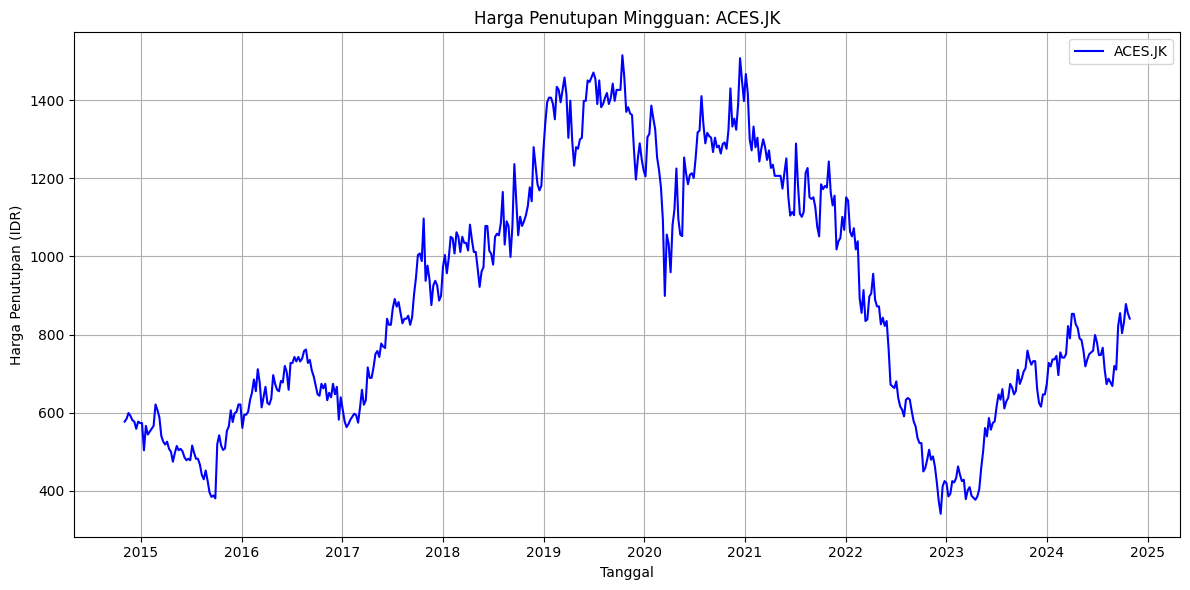

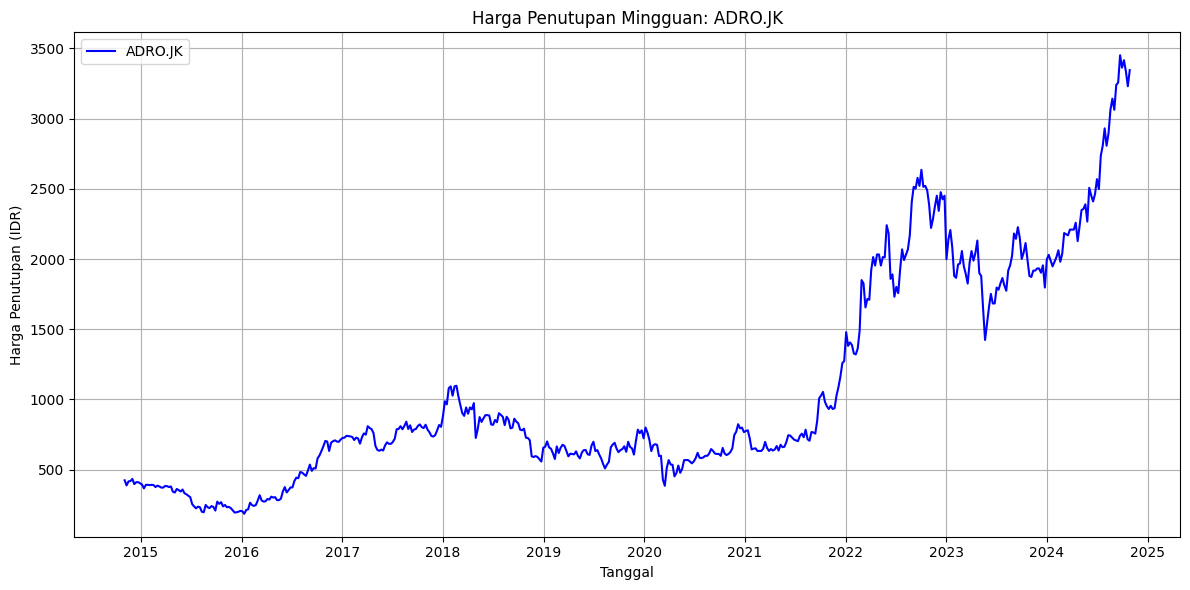

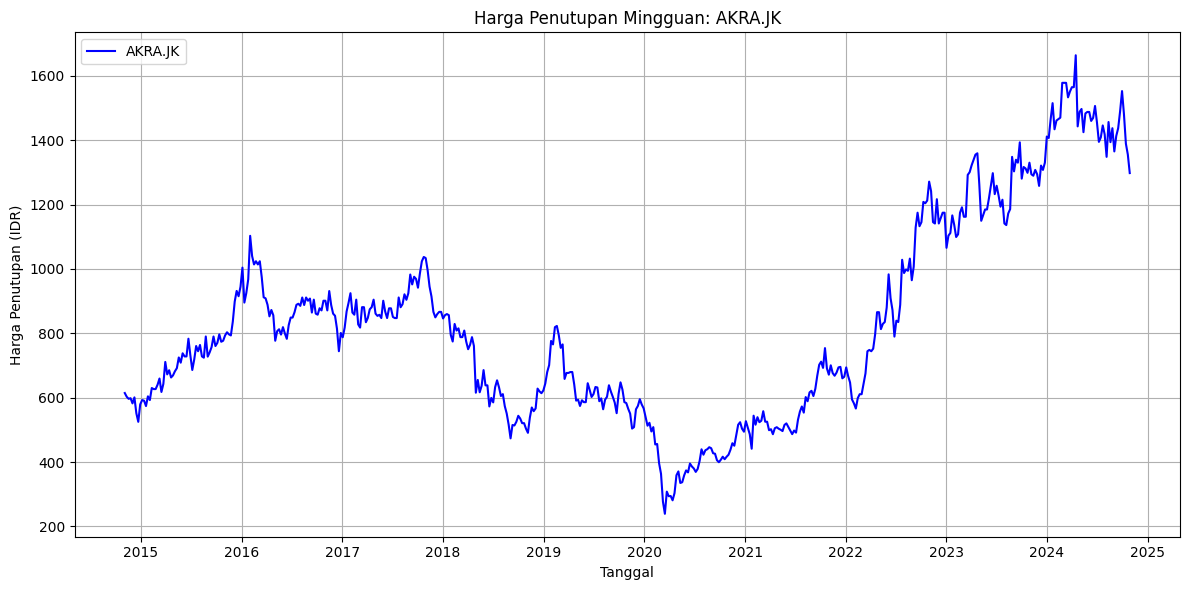

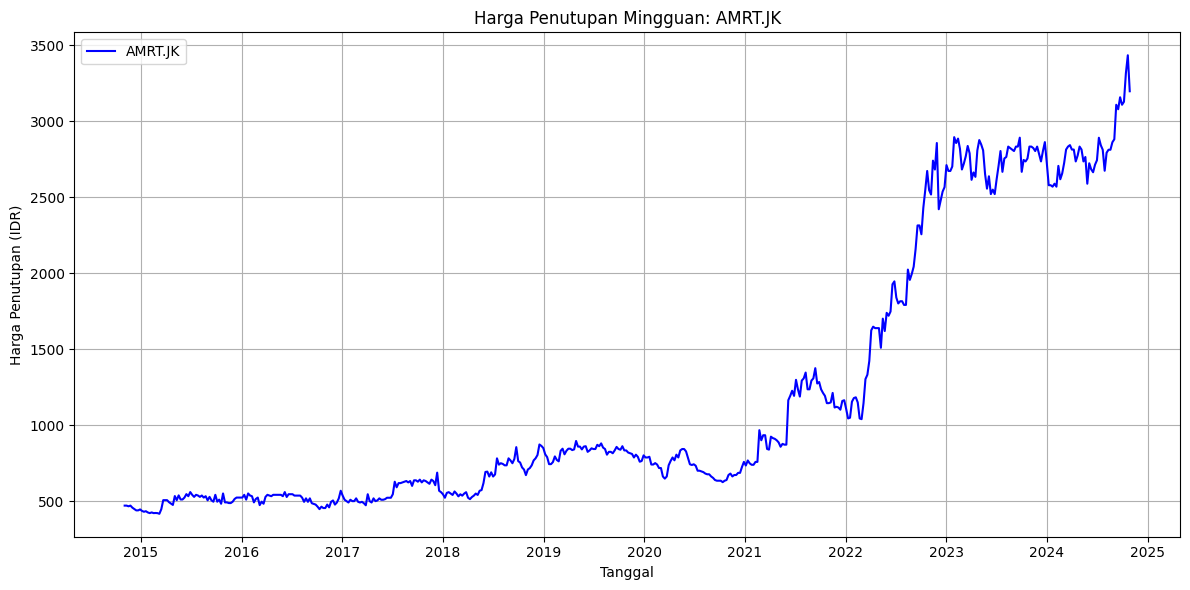

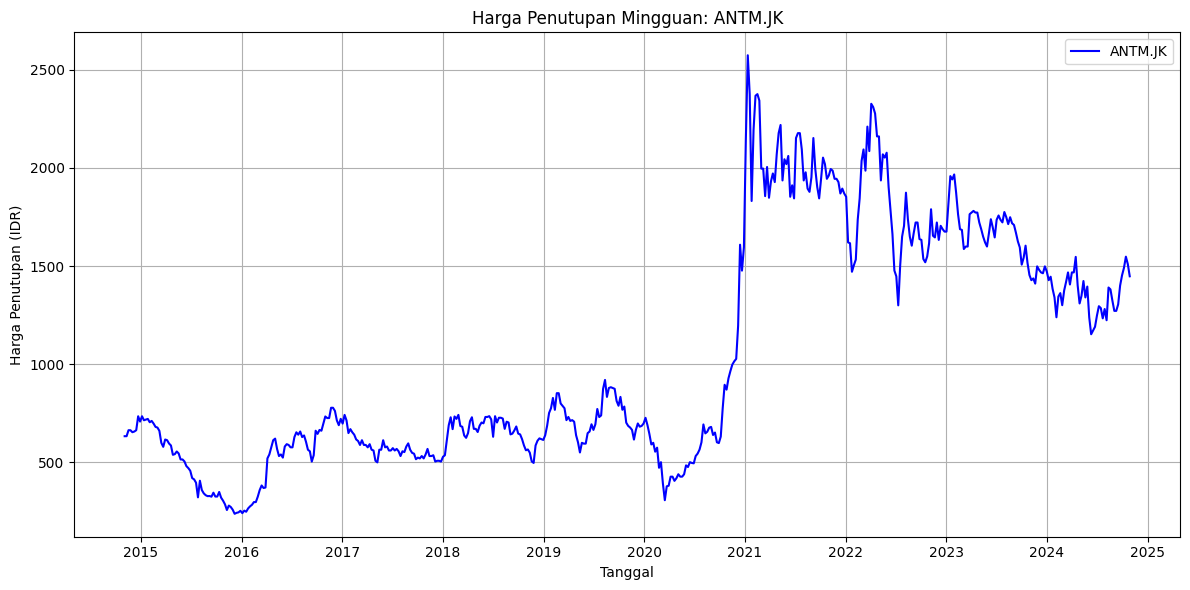

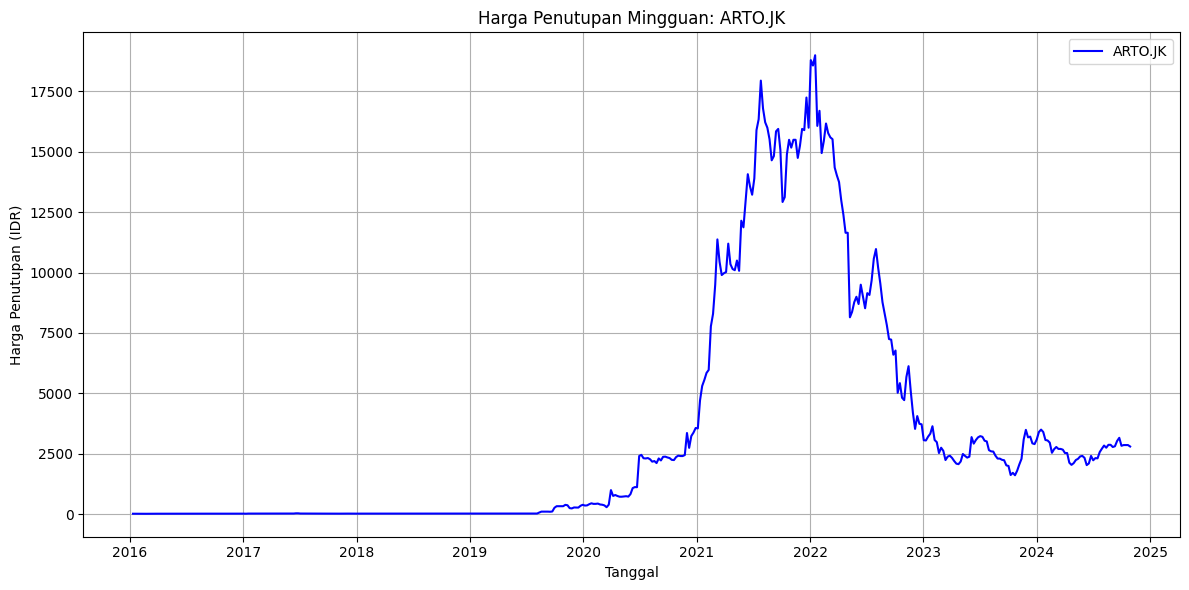

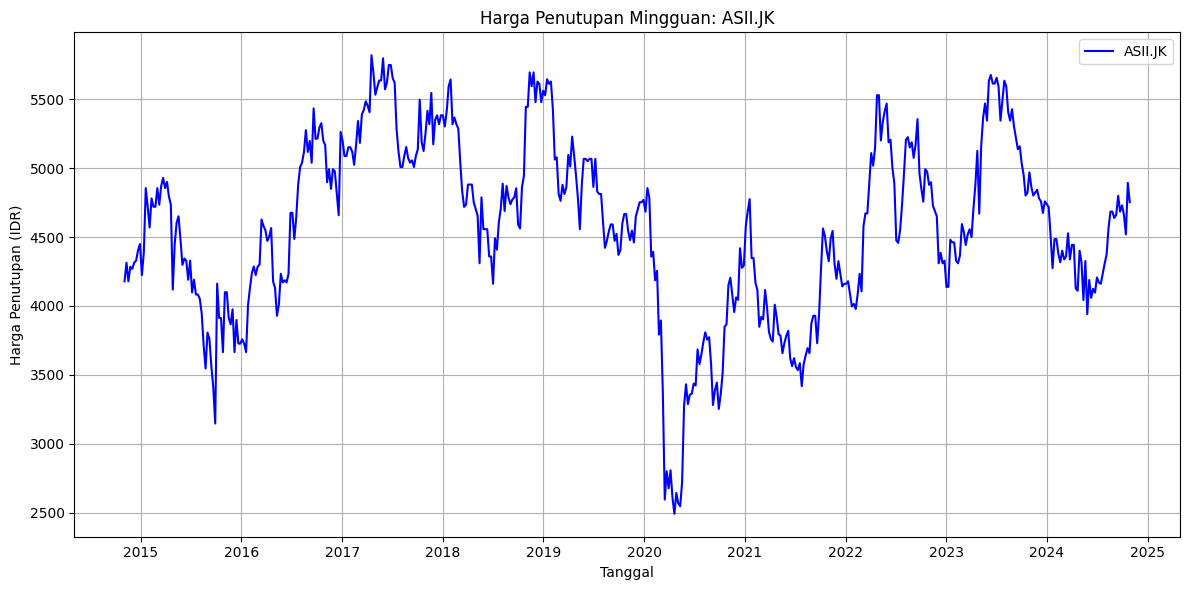

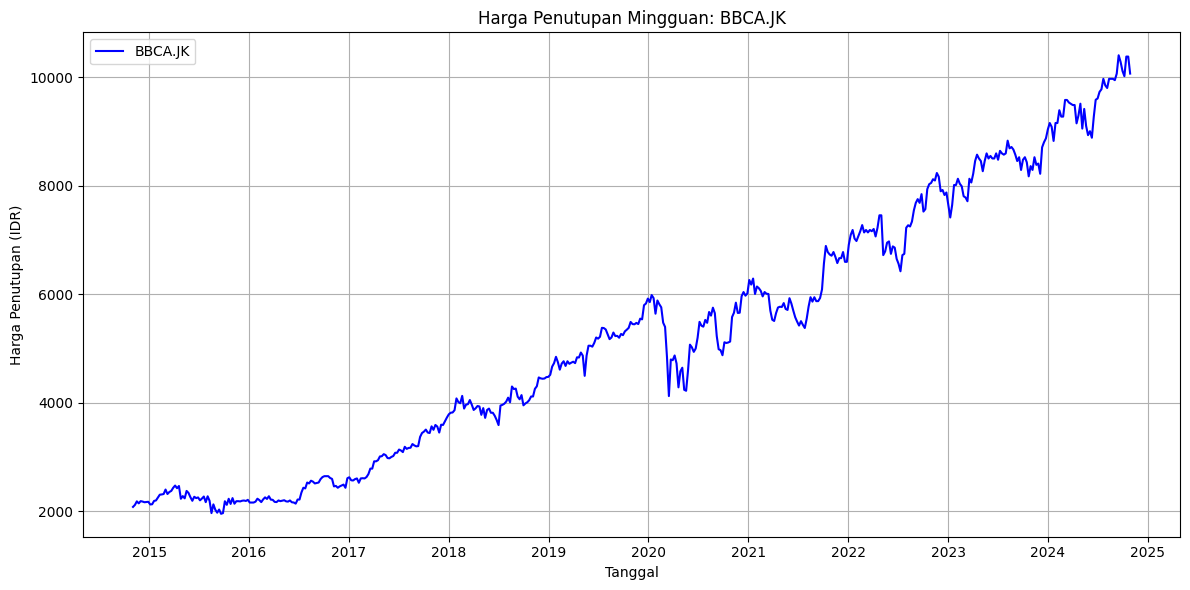

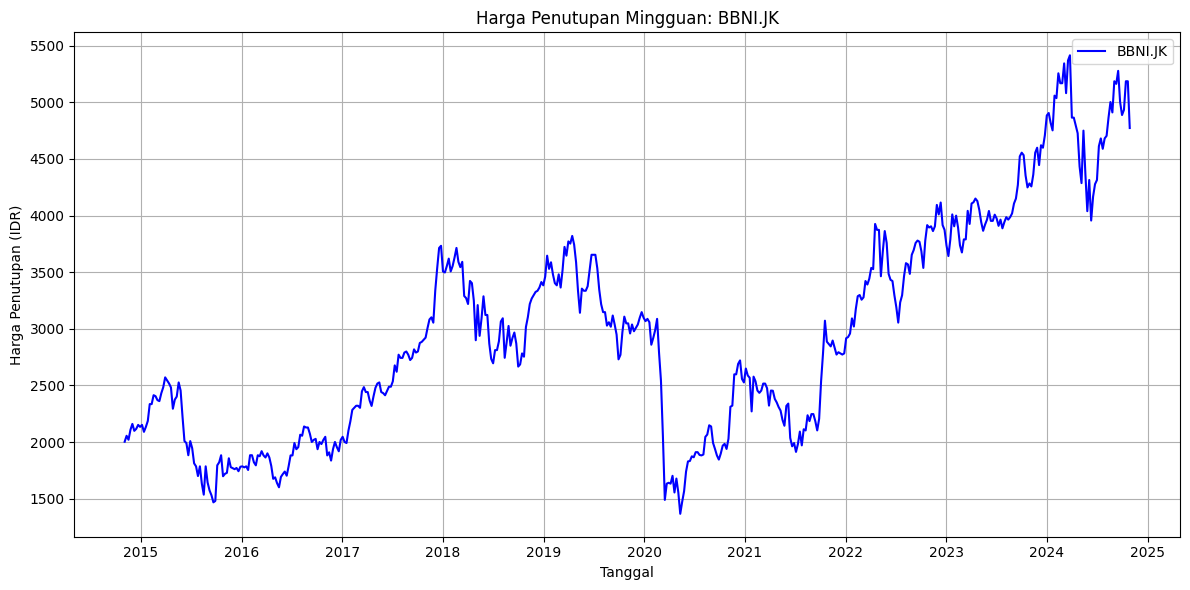

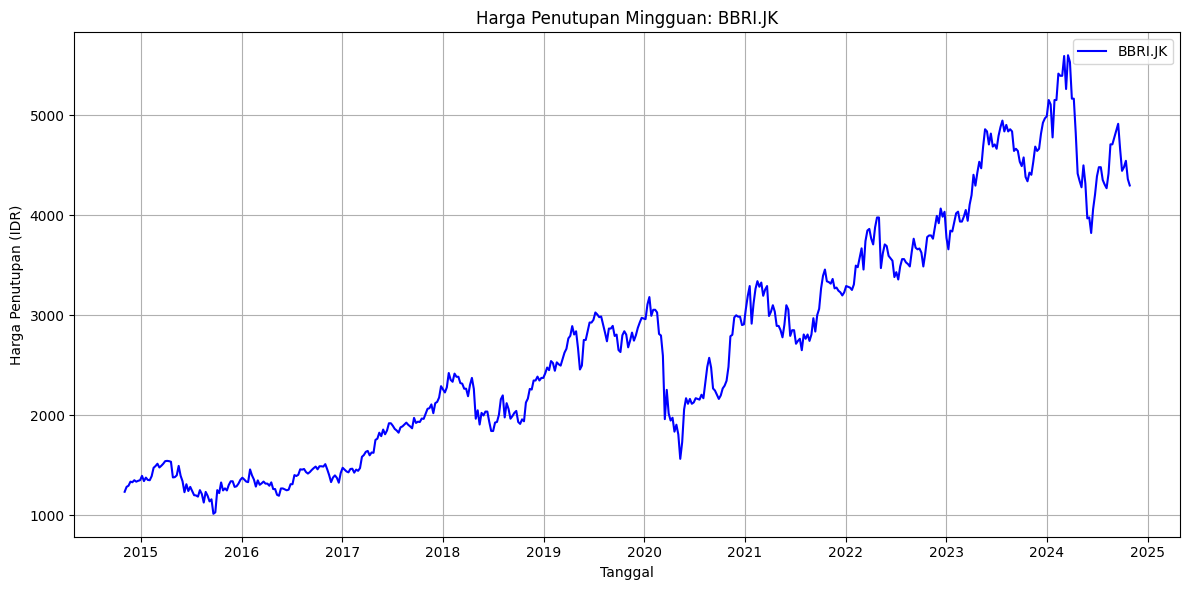

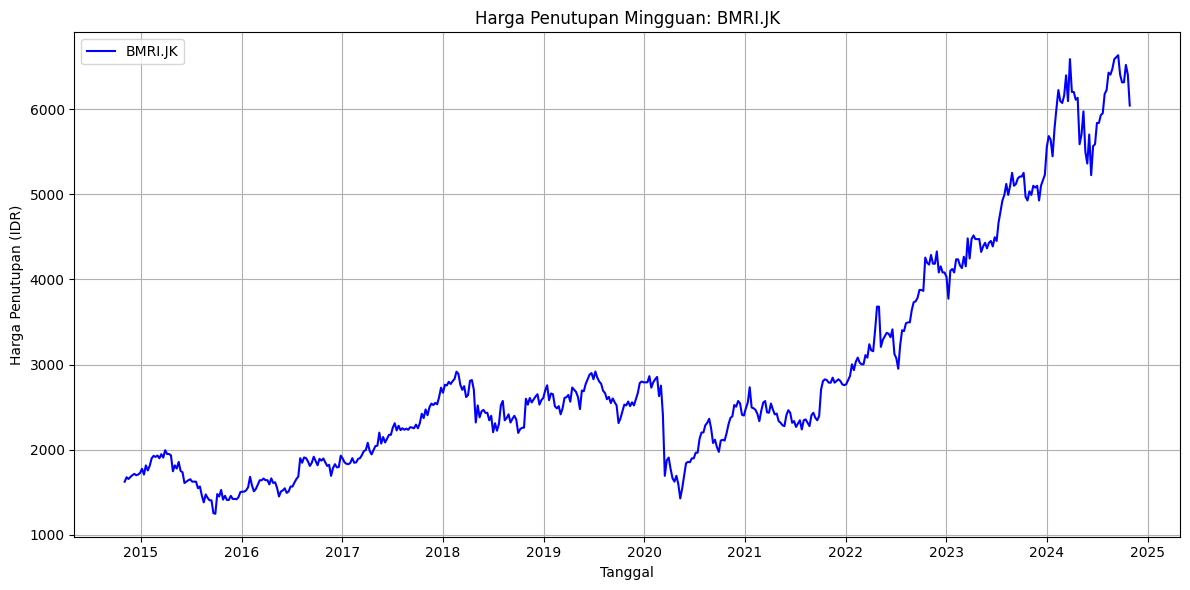

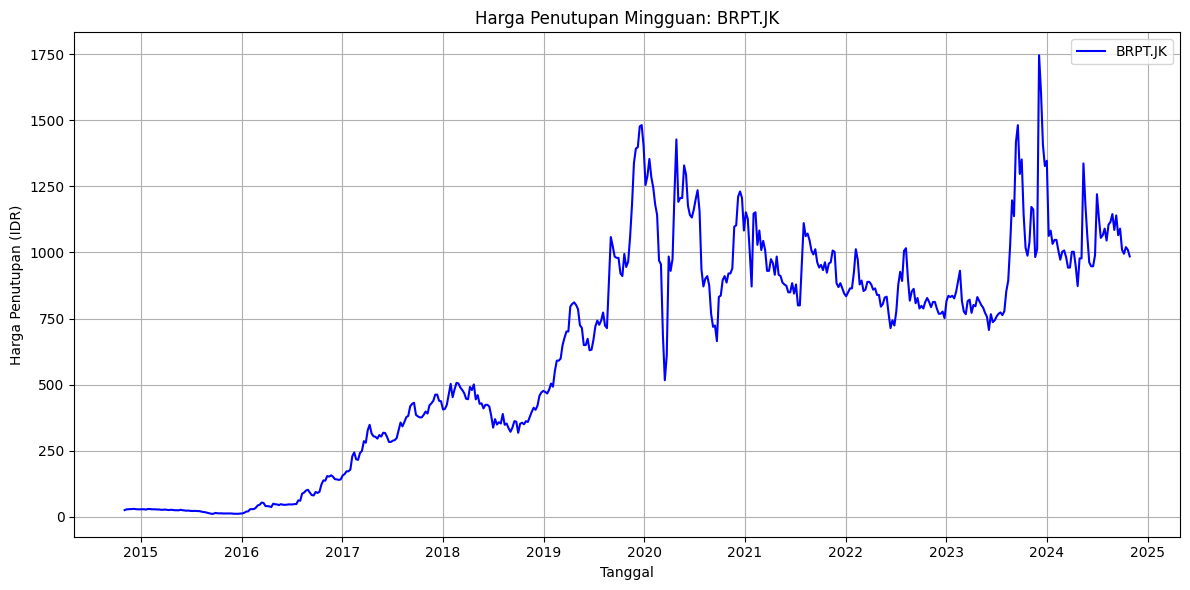

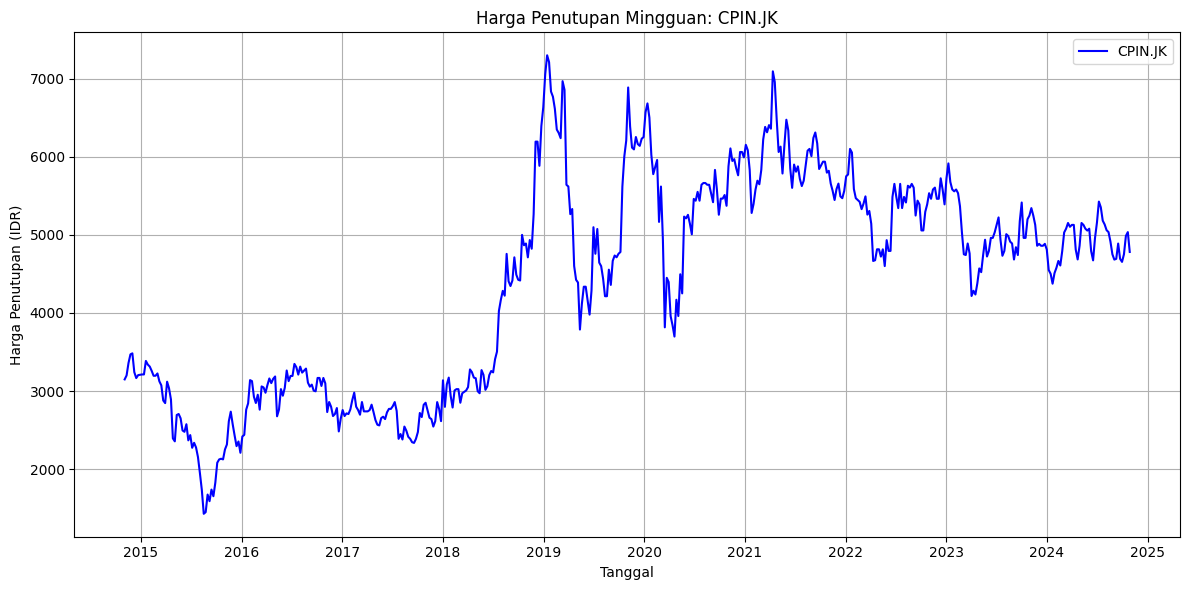

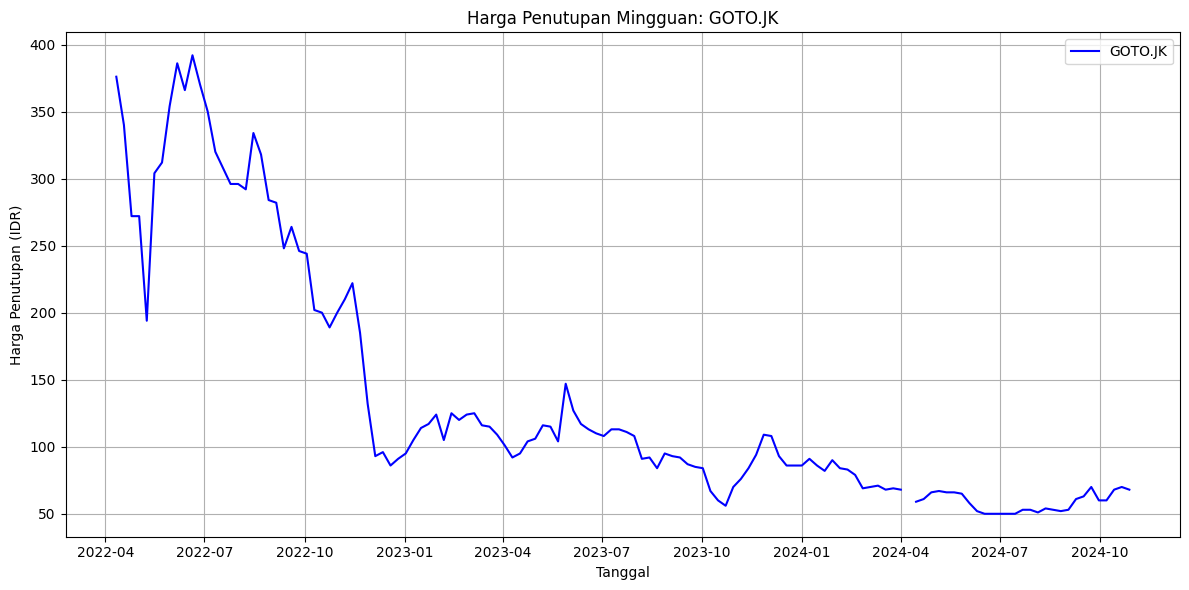

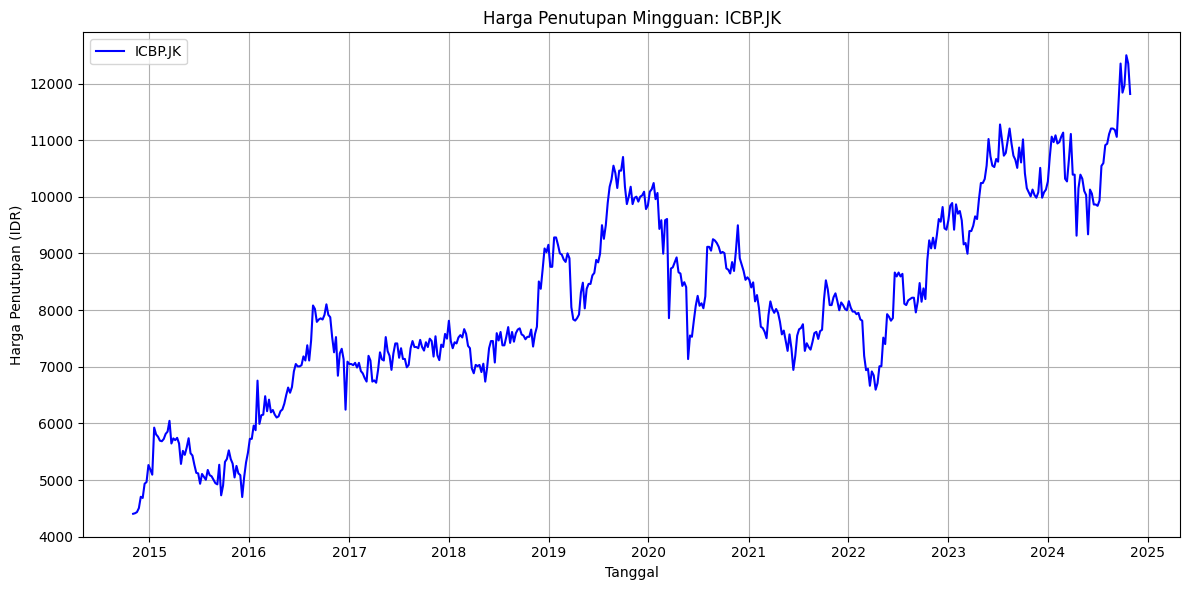

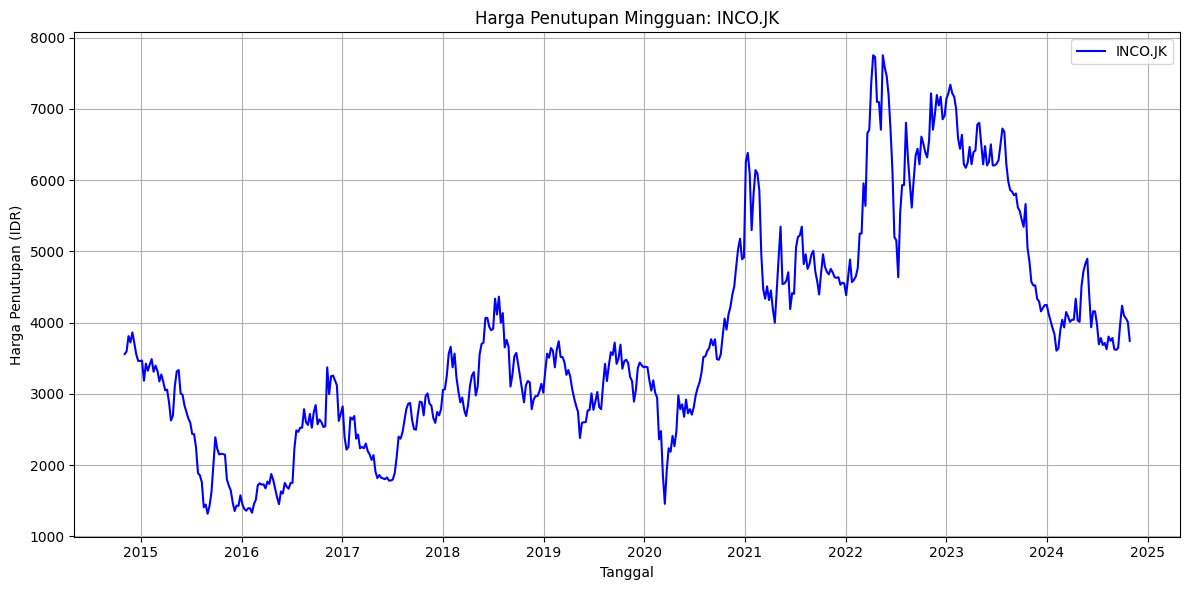

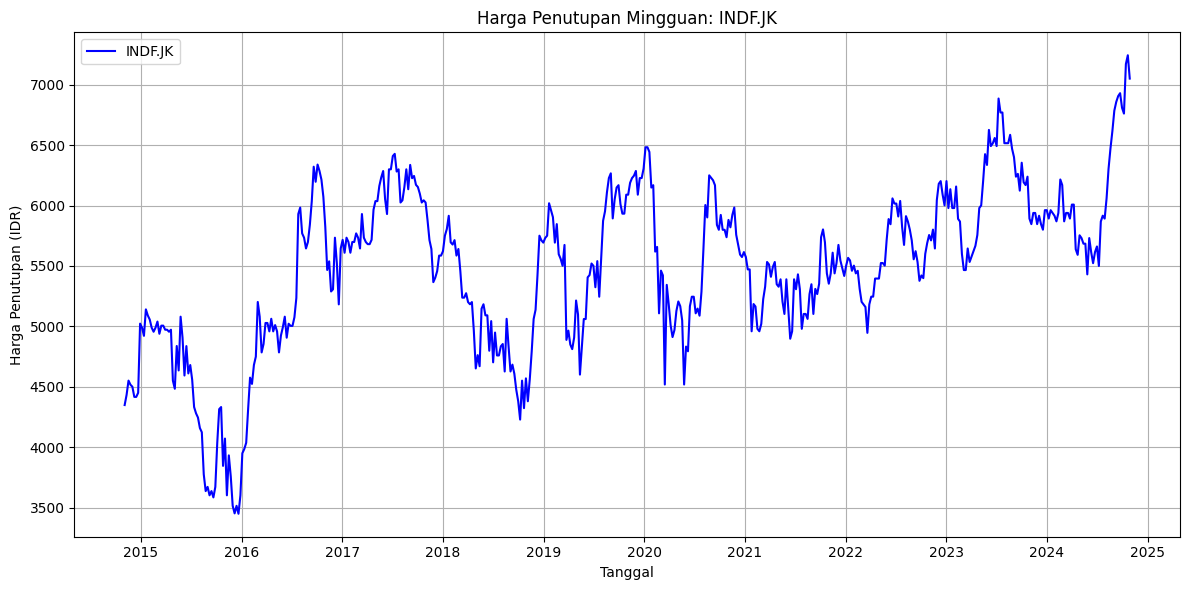

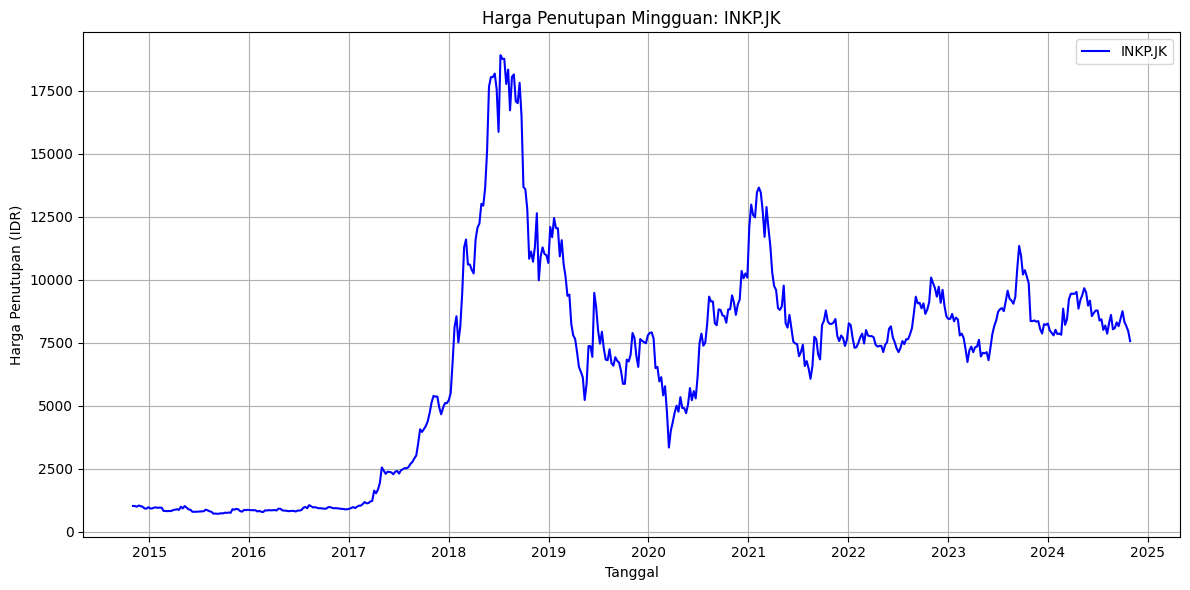

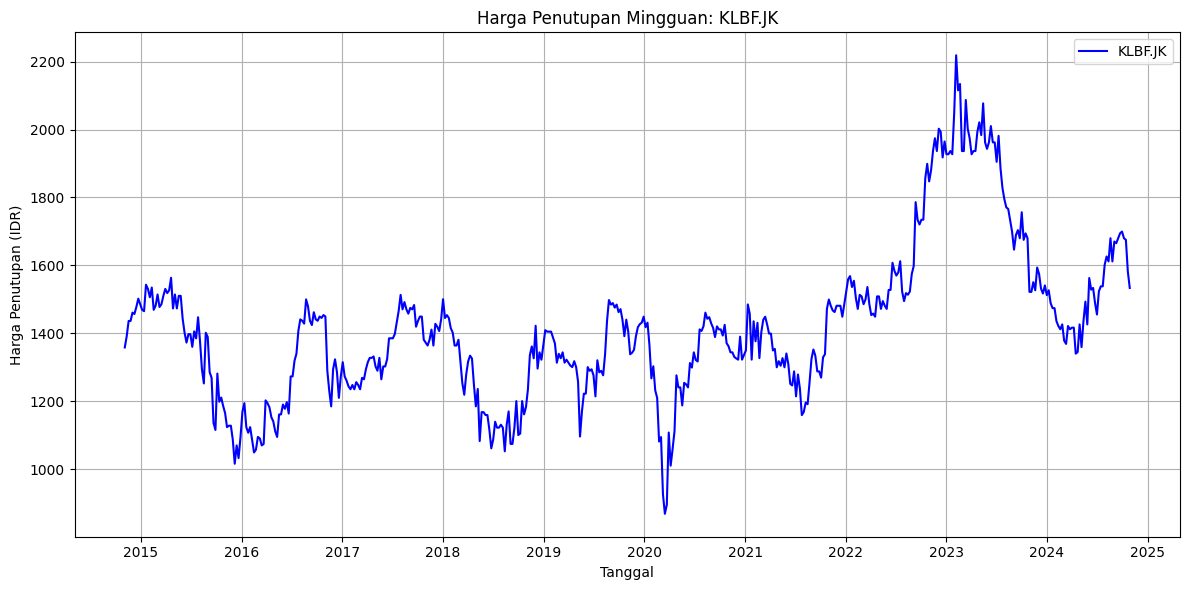

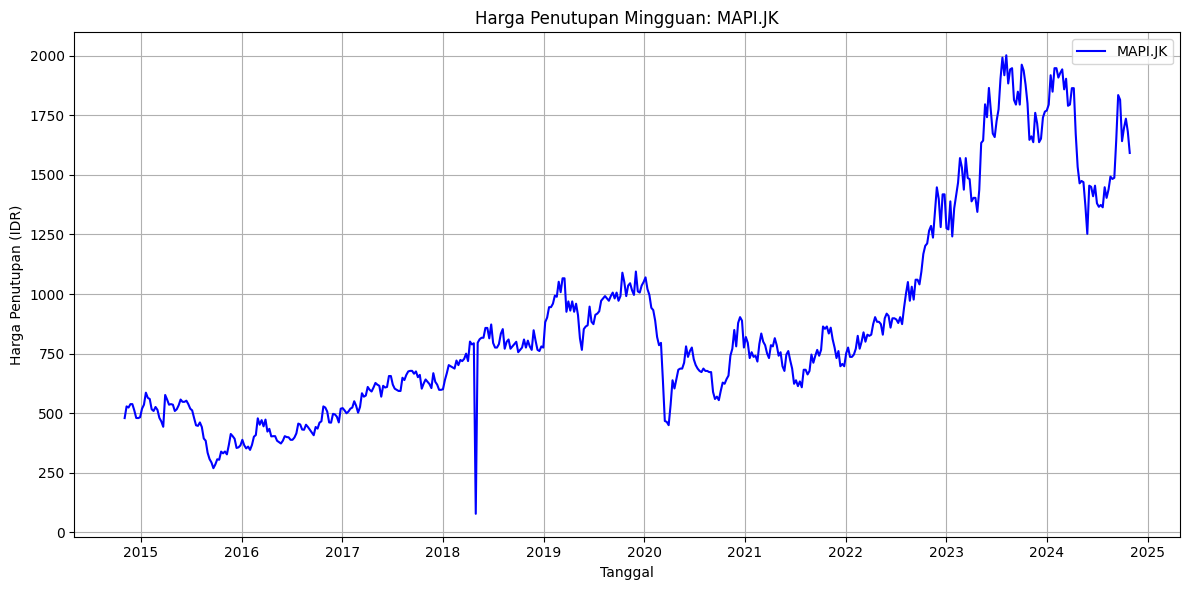

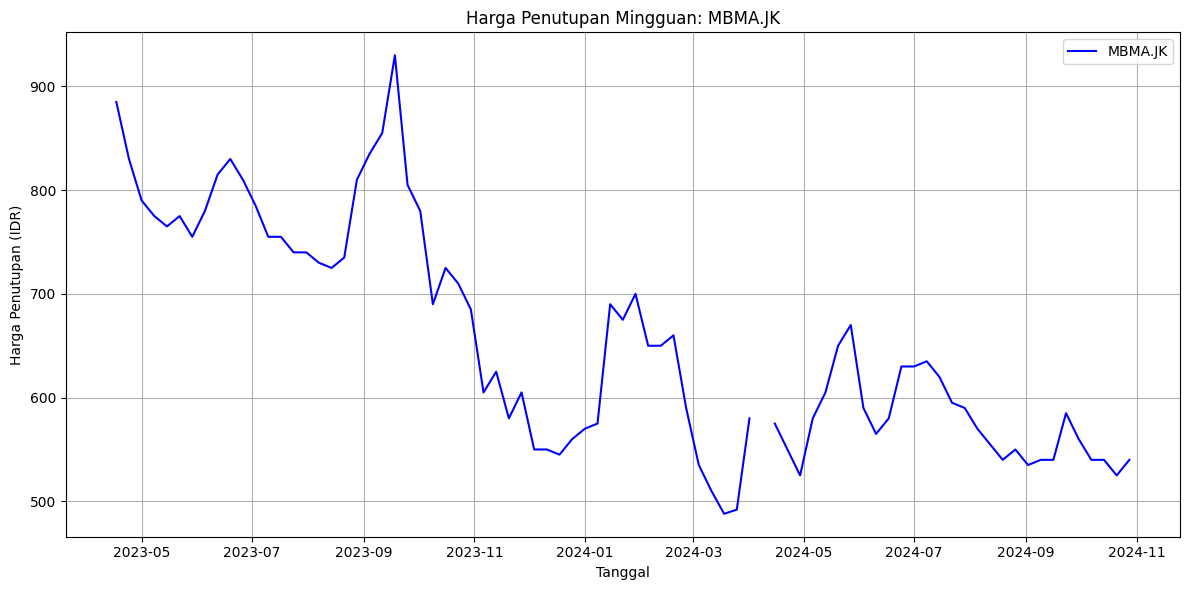

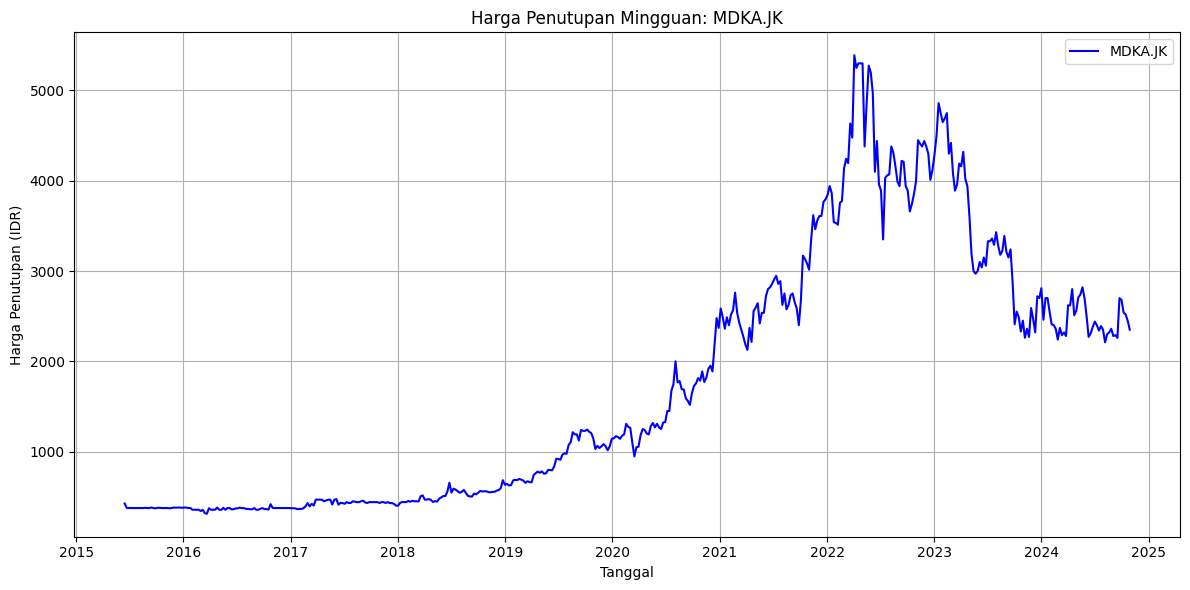

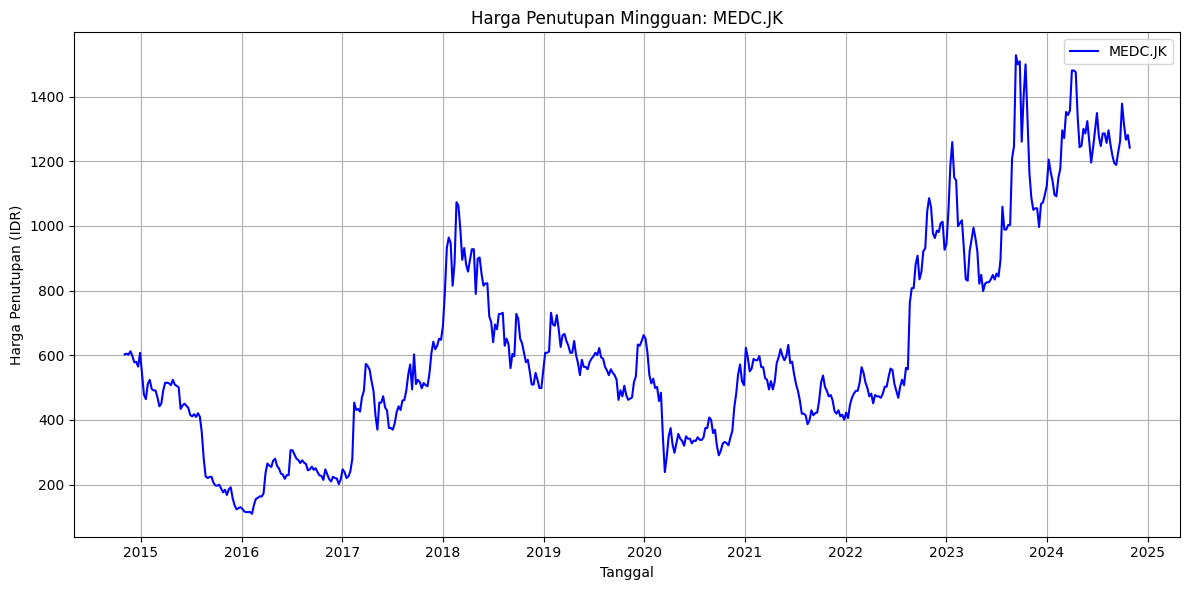

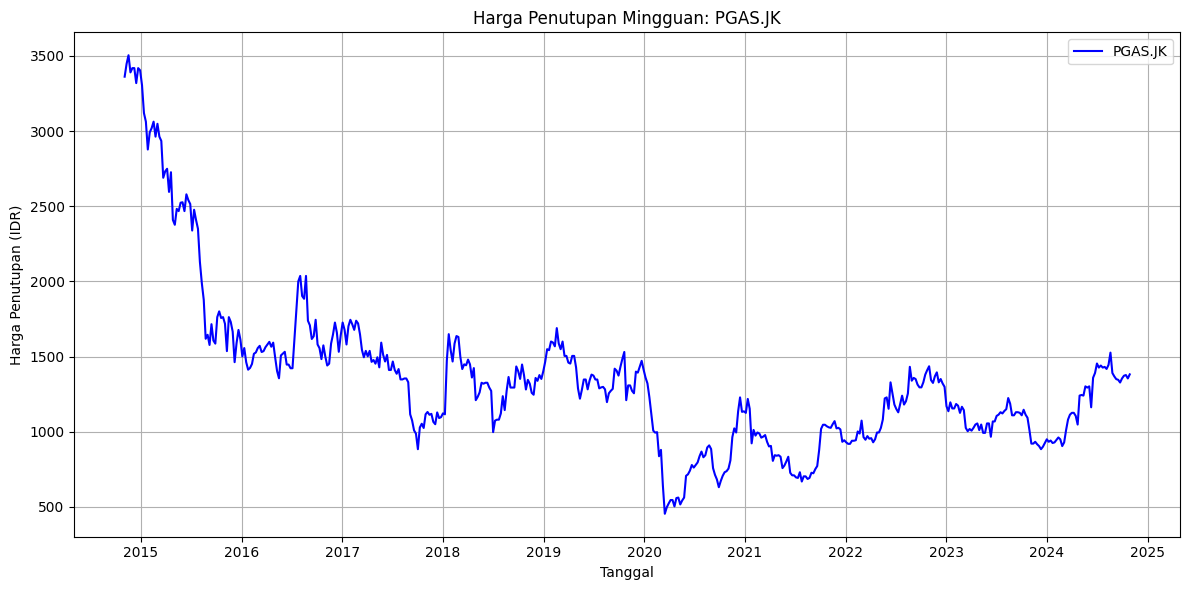

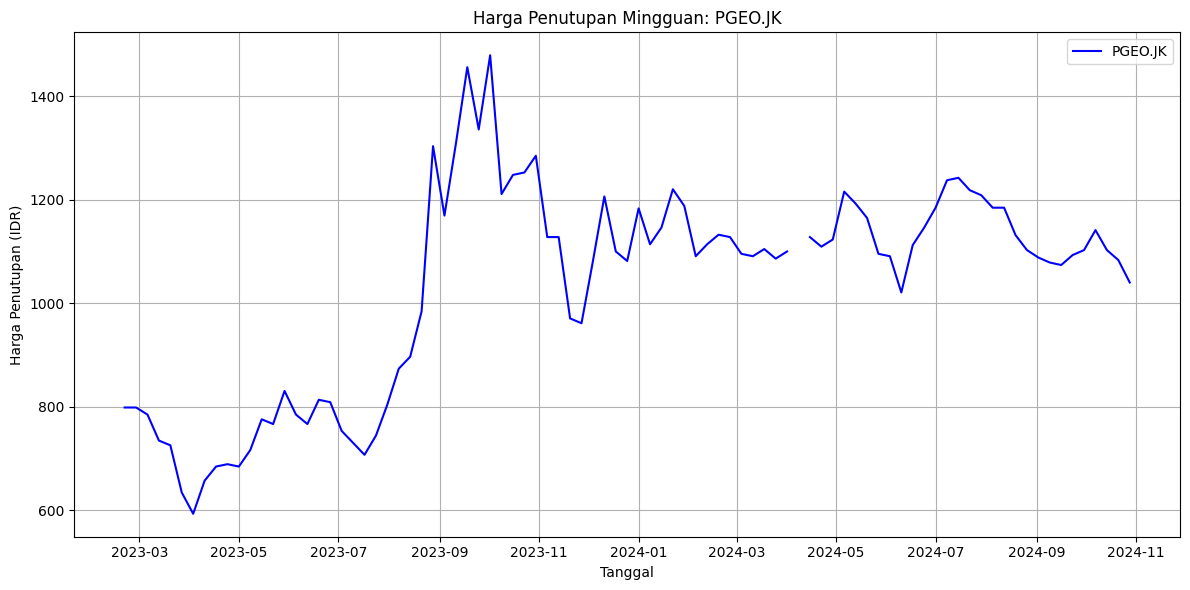

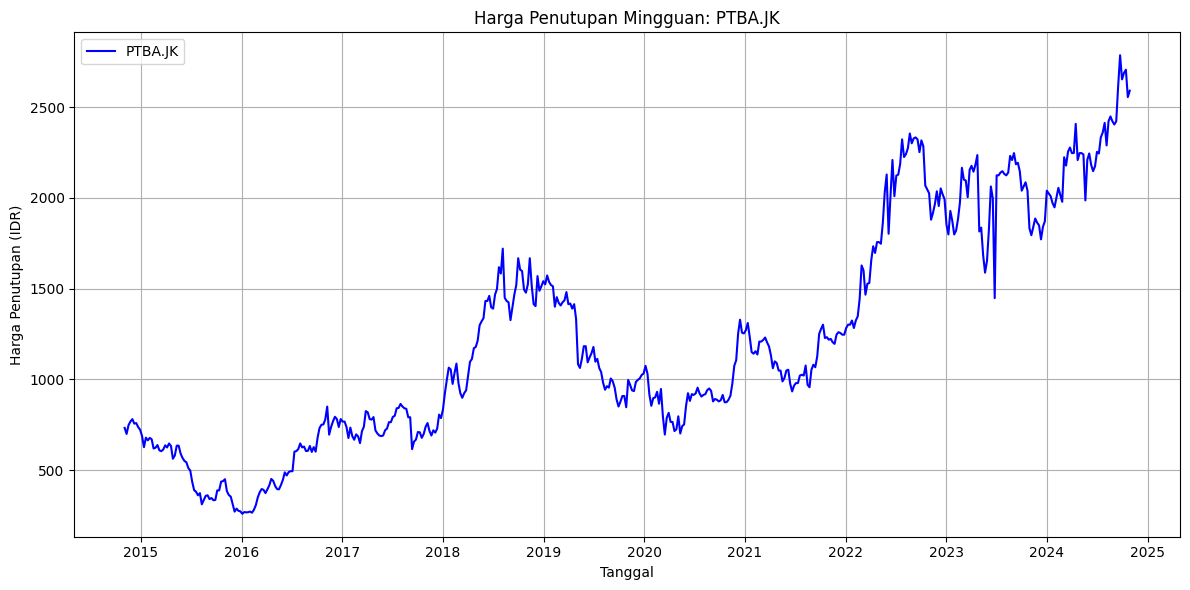

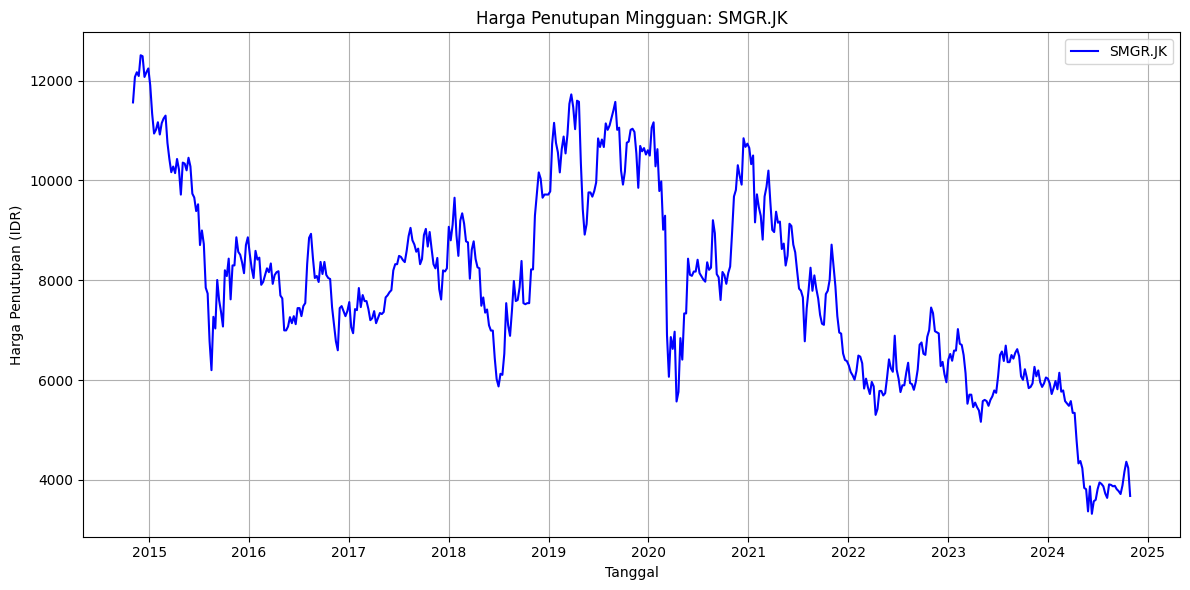

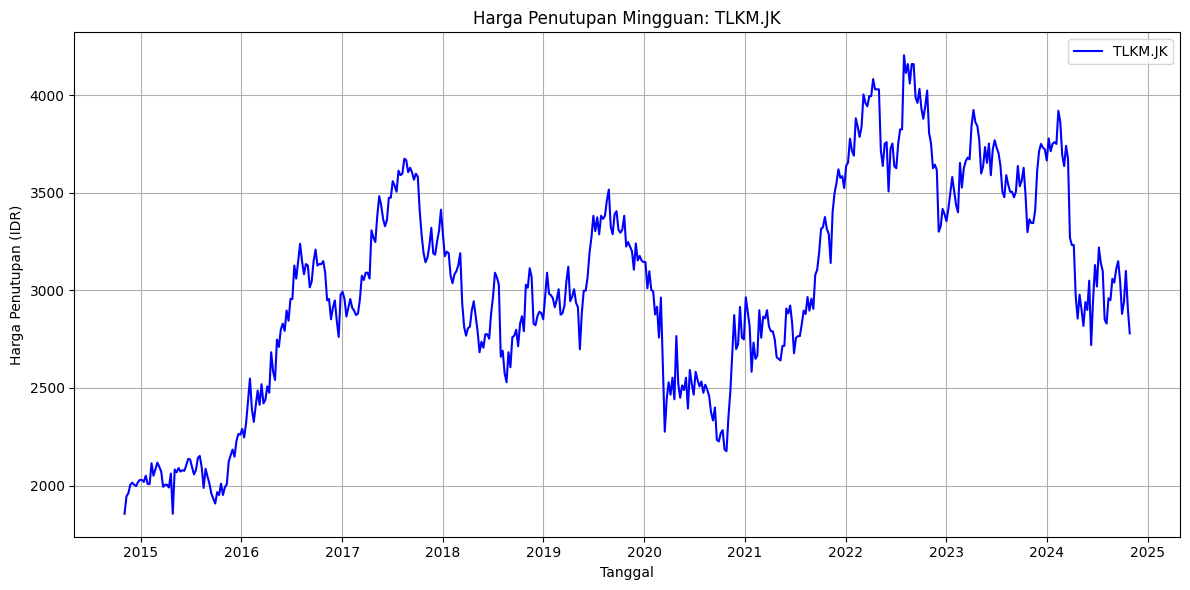

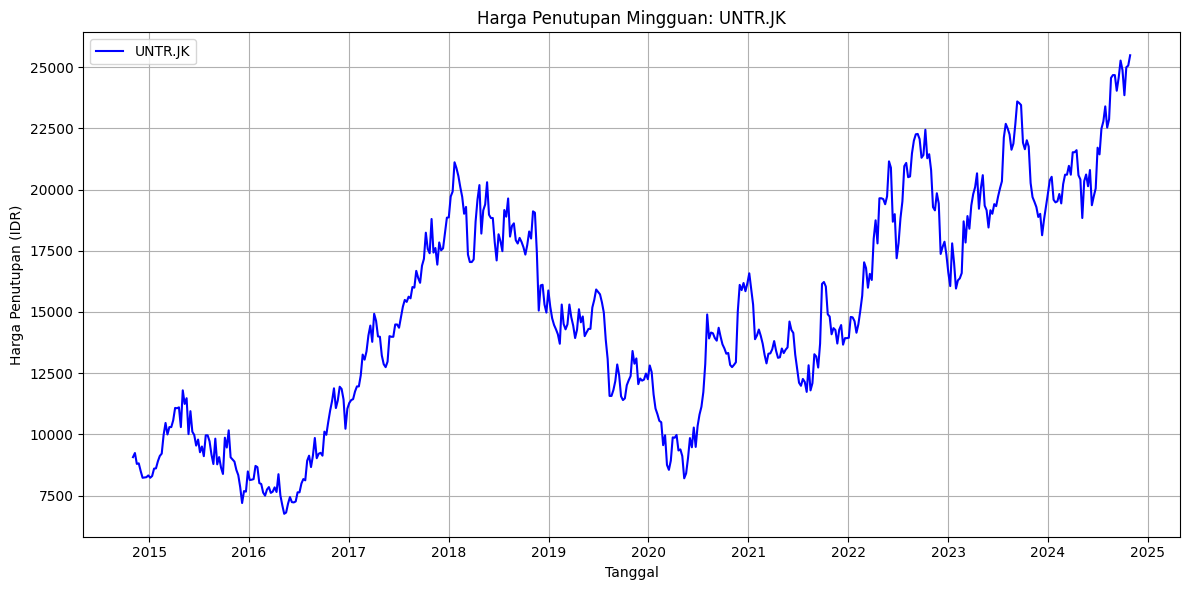

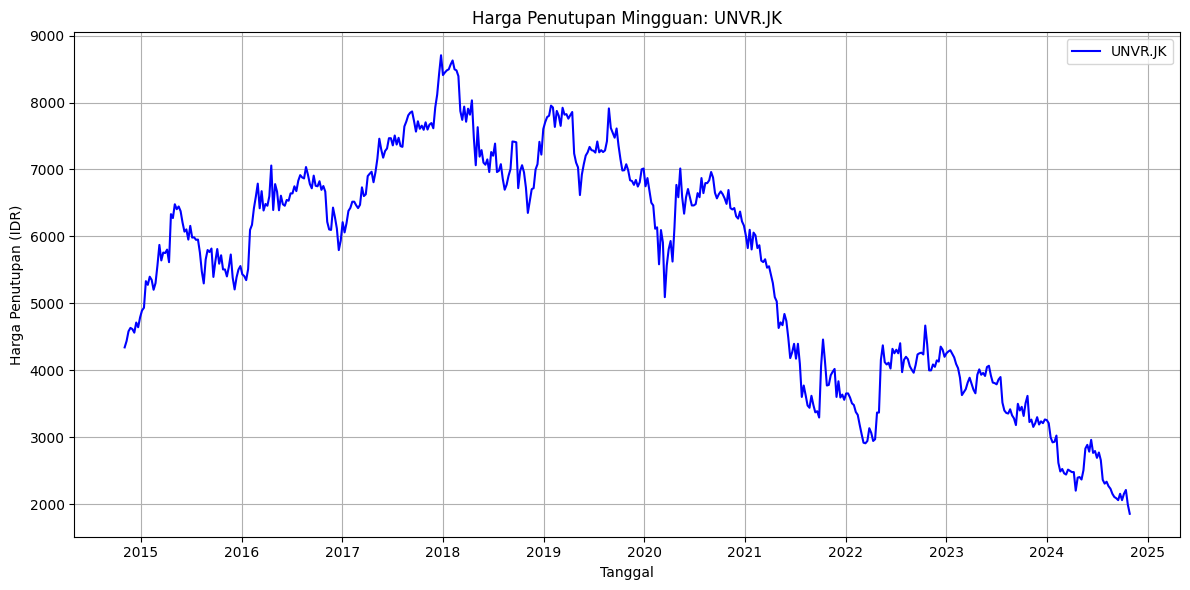

In [3]:
# Plot harga penutupan mingguan
# Tampilkan grafik satu per satu
for ticker in tickers:
    if ticker in data.columns:
        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data[ticker], label=f'{ticker}', color='blue')
        plt.title(f'Harga Penutupan Mingguan: {ticker}')
        plt.xlabel('Tanggal')
        plt.ylabel('Harga Penutupan (IDR)')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

In [4]:
# Mengatur index menjadi format tanggal
data.index = data.index.date
# Simpan daftar original ticker sebelum memproses data
original_tickers = data.columns.tolist()

# Tangani data yang hilang
print("Jumlah kolom sebelum penanganan data kosong:", len(data.columns))
data_clean = data.dropna(axis=1, thresh=len(data))
print("Jumlah kolom setelah penanganan data kosong:", len(data_clean.columns))

# Identifikasi ticker yang di-drop
remaining_tickers = data_clean.columns.tolist()
dropped_tickers = [ticker for ticker in original_tickers if ticker not in remaining_tickers]

# Tampilkan ticker yang di-drop
print("\nSaham yang di-drop karena data tidak lengkap:")
for ticker in dropped_tickers:
    print(f"- {ticker}")

# Lanjutkan dengan data yang sudah dibersihkan
data = data_clean
# Menyimpan data menjadi file CSV
csv_file_path = 'stock_data_adj_close.csv'
data.to_csv(csv_file_path)

# Menampilkan beberapa data awal
print("Data Saham (Adj Close):")
data = data.dropna(axis=1, thresh=len(data))
data = data.round(0).astype(int)
data.head()

Jumlah kolom sebelum penanganan data kosong: 30
Jumlah kolom setelah penanganan data kosong: 25

Saham yang di-drop karena data tidak lengkap:
- ARTO.JK
- GOTO.JK
- MBMA.JK
- MDKA.JK
- PGEO.JK
Data Saham (Adj Close):


Ticker      ACES.JK  ADRO.JK  AKRA.JK  AMRT.JK  ANTM.JK  ASII.JK  BBCA.JK  \
2014-11-03      577      424      614      471      633     4179     2077   
2014-11-10      584      387      603      471      633     4314     2114   
2014-11-17      599      416      596      467      664     4179     2179   
2014-11-24      591      418      598      471      664     4284     2143   
2014-12-01      580      434      582      458      654     4269     2183   

Ticker      BBNI.JK  BBRI.JK  BMRI.JK  ...  INKP.JK  KLBF.JK  MAPI.JK  \
2014-11-03     2003     1233     1624  ...     1019     1358      479   
2014-11-10     2055     1282     1675  ...     1014     1391      528   
2014-11-17     2020     1294     1655  ...      988     1436      524   
2014-11-24     2108     1334     1679  ...     1036     1436      538   
2014-12-01     2160     1328     1699  ...     1014     1461      538   

Ticker      MEDC.JK  PGAS.JK  PTBA.JK  SMGR.JK  TLKM.JK  UNTR.JK  UNVR.JK  
2014-11-03      603     3362      732    11563     1855     9072     4342  
2014-11-10      605     3448      699    12073     1944     9240     4436  
2014-11-17      602     3505      747    12168     1962     8795     4582  
2014-11-24      613     3391      768    12092     2004     8819     4633  
2014-12-01      598     3419      781    12508     2015     8506     4615  

[5 rows x 25 columns]

In [5]:
data.tail()

Ticker      ACES.JK  ADRO.JK  AKRA.JK  AMRT.JK  ANTM.JK  ASII.JK  BBCA.JK  \
2024-09-30      803     3363     1552     3109     1453     4730    10112   
2024-10-07      831     3416     1480     3129     1491     4662    10015   
2024-10-14      878     3337     1389     3316     1548     4519    10377   
2024-10-21      855     3231     1355     3435     1510     4894    10377   
2024-10-28      841     3346     1298     3198     1448     4753    10064   

Ticker      BBNI.JK  BBRI.JK  BMRI.JK  ...  INKP.JK  KLBF.JK  MAPI.JK  \
2024-09-30     4887     4446     6315  ...     8749     1700     1642   
2024-10-07     4933     4482     6315  ...     8328     1680     1696   
2024-10-14     5186     4546     6519  ...     8154     1675     1736   
2024-10-21     5186     4363     6406  ...     7956     1582     1681   
2024-10-28     4773     4299     6042  ...     7560     1534     1592   

Ticker      MEDC.JK  PGAS.JK  PTBA.JK  SMGR.JK  TLKM.JK  UNTR.JK  UNVR.JK  
2024-09-30     1378     1355     2653     3891     2880    24877     2059  
2024-10-07     1315     1373     2689     4161     2940    23851     2154  
2024-10-14     1267     1378     2706     4364     3100    24991     2211  
2024-10-21     1282     1355     2555     4239     2910    25061     1993  
2024-10-28     1242     1382     2591     3679     2780    25482     1855  

[5 rows x 25 columns]

In [6]:
data.describe()

Ticker      ACES.JK      ADRO.JK      AKRA.JK      AMRT.JK      ANTM.JK  \
count    522.000000   522.000000   522.000000   522.000000   522.000000   
mean     887.701149  1052.101533   826.212644  1188.212644  1034.919540   
std      314.200528   752.437360   310.288001   869.706730   587.346358   
min      340.000000   185.000000   239.000000   417.000000   238.000000   
25%      625.000000   587.750000   593.000000   542.000000   580.000000   
50%      830.000000   730.500000   785.500000   769.000000   720.000000   
75%     1173.750000  1728.000000   983.000000  1639.000000  1600.000000   
max     1516.000000  3452.000000  1664.000000  3435.000000  2574.000000   

Ticker      ASII.JK       BBCA.JK      BBNI.JK      BBRI.JK      BMRI.JK  ...  \
count    522.000000    522.000000   522.000000   522.000000   522.000000  ...   
mean    4576.273946   5212.492337  2959.639847  2714.442529  2886.059387  ...   
std      643.018458   2384.972388   948.882104  1161.630021  1316.220483  ...   
min     2491.000000   1950.000000  1366.000000  1012.000000  1246.000000  ...   
25%     4170.000000   2982.250000  2109.250000  1664.000000  1919.500000  ...   
50%     4608.000000   5099.000000  2870.000000  2535.500000  2496.500000  ...   
75%     5060.750000   7085.250000  3644.250000  3542.000000  3196.750000  ...   
max     5820.000000  10401.000000  5415.000000  5603.000000  6633.000000  ...   

Ticker       INKP.JK      KLBF.JK      MAPI.JK      MEDC.JK      PGAS.JK  \
count     522.000000   522.000000   522.000000   522.000000   522.000000   
mean     6568.068966  1417.670498   876.733716   614.461686  1352.881226   
std      4202.421538   223.354960   427.806174   322.063470   533.442024   
min       707.000000   869.000000    78.000000   110.000000   455.000000   
25%      2279.750000  1285.250000   570.250000   414.000000  1020.750000   
50%      7494.500000  1405.000000   770.000000   531.000000  1296.000000   
75%      8821.000000  1500.000000  1006.000000   815.000000  1505.000000   
max     18905.000000  2219.000000  2002.000000  1528.000000  3505.000000   

Ticker      PTBA.JK       SMGR.JK      TLKM.JK       UNTR.JK     UNVR.JK  
count    522.000000    522.000000   522.000000    522.000000   522.00000  
mean    1219.088123   7886.906130  3017.065134  14909.762452  5553.41954  
std      613.781057   1932.898919   547.769506   4538.392026  1711.98873  
min      259.000000   3321.000000  1855.000000   6759.000000  1855.00000  
25%      737.000000   6433.250000  2700.750000  11303.500000  4027.25000  
50%     1054.000000   7854.500000  3004.500000  14478.500000  6015.00000  
75%     1694.000000   9106.500000  3418.000000  18846.750000  6914.00000  
max     2786.000000  12508.000000  4205.000000  25482.000000  8707.00000  

[8 rows x 25 columns]

##Dataset ESG

In [7]:
# Langkah 2: Menambahkan ESG Score
esg_scores = {
    'ACES.JK': 19.65, 'ADRO.JK': 42.72, 'AKRA.JK': 23.79, "AMRT.JK": 31.93, "ANTM.JK": 42.06,
    "ASII.JK": 35.60, 'BBCA.JK': 21.51, 'BBNI.JK': 23.17, 'BBRI.JK': 17.83,
    'BMRI.JK': 27.64, 'BRPT.JK': 24.21, 'CPIN.JK': 44.48, 'ICBP.JK': 34.80,
    'INCO.JK': 29.41, 'INDF.JK': 36.06, 'INKP.JK': 26.44, 'KLBF.JK': 33.27, 'MAPI.JK': 20.31,
    'MEDC.JK': 29.08, 'PGAS.JK': 26.32,
    'PTBA.JK': 33.87, 'SMGR.JK': 23.05, 'TLKM.JK': 28.18, 'UNTR.JK': 38.81, 'UNVR.JK': 18.21,
}

# Konversi ke DataFrame
esg_df = pd.DataFrame(list(esg_scores.items()), columns=['Ticker', 'ESG_Score'])
# Mengubah data menjadi CSV
csv_file_path = 'stock_data_esg.csv'
esg_df.to_csv(csv_file_path)
esg_df


Ticker  ESG_Score
0   ACES.JK      19.65
1   ADRO.JK      42.72
2   AKRA.JK      23.79
3   AMRT.JK      31.93
4   ANTM.JK      42.06
5   ASII.JK      35.60
6   BBCA.JK      21.51
7   BBNI.JK      23.17
8   BBRI.JK      17.83
9   BMRI.JK      27.64
10  BRPT.JK      24.21
11  CPIN.JK      44.48
12  ICBP.JK      34.80
13  INCO.JK      29.41
14  INDF.JK      36.06
15  INKP.JK      26.44
16  KLBF.JK      33.27
17  MAPI.JK      20.31
18  MEDC.JK      29.08
19  PGAS.JK      26.32
20  PTBA.JK      33.87
21  SMGR.JK      23.05
22  TLKM.JK      28.18
23  UNTR.JK      38.81
24  UNVR.JK      18.21

In [8]:
# Langkah 4: Kategorikan berdasarkan ESG Score
categories = {
    '0-10': esg_df[esg_df['ESG_Score'] <= 10],
    '11-20': esg_df[(esg_df['ESG_Score'] > 10) & (esg_df['ESG_Score'] <= 20)],
    '21-30': esg_df[(esg_df['ESG_Score'] > 20) & (esg_df['ESG_Score'] <= 30)],
    '31-40': esg_df[(esg_df['ESG_Score'] > 30) & (esg_df['ESG_Score'] <= 40)],
    '>41': esg_df[esg_df['ESG_Score'] > 41],
}

# Tampilkan kategori ESG
categories

{'0-10': Empty DataFrame
 Columns: [Ticker, ESG_Score]
 Index: [],
 '11-20':      Ticker  ESG_Score
 0   ACES.JK      19.65
 8   BBRI.JK      17.83
 24  UNVR.JK      18.21,
 '21-30':      Ticker  ESG_Score
 2   AKRA.JK      23.79
 6   BBCA.JK      21.51
 7   BBNI.JK      23.17
 9   BMRI.JK      27.64
 10  BRPT.JK      24.21
 13  INCO.JK      29.41
 15  INKP.JK      26.44
 17  MAPI.JK      20.31
 18  MEDC.JK      29.08
 19  PGAS.JK      26.32
 21  SMGR.JK      23.05
 22  TLKM.JK      28.18,
 '31-40':      Ticker  ESG_Score
 3   AMRT.JK      31.93
 5   ASII.JK      35.60
 12  ICBP.JK      34.80
 14  INDF.JK      36.06
 16  KLBF.JK      33.27
 20  PTBA.JK      33.87
 23  UNTR.JK      38.81,
 '>41':      Ticker  ESG_Score
 1   ADRO.JK      42.72
 4   ANTM.JK      42.06
 11  CPIN.JK      44.48}

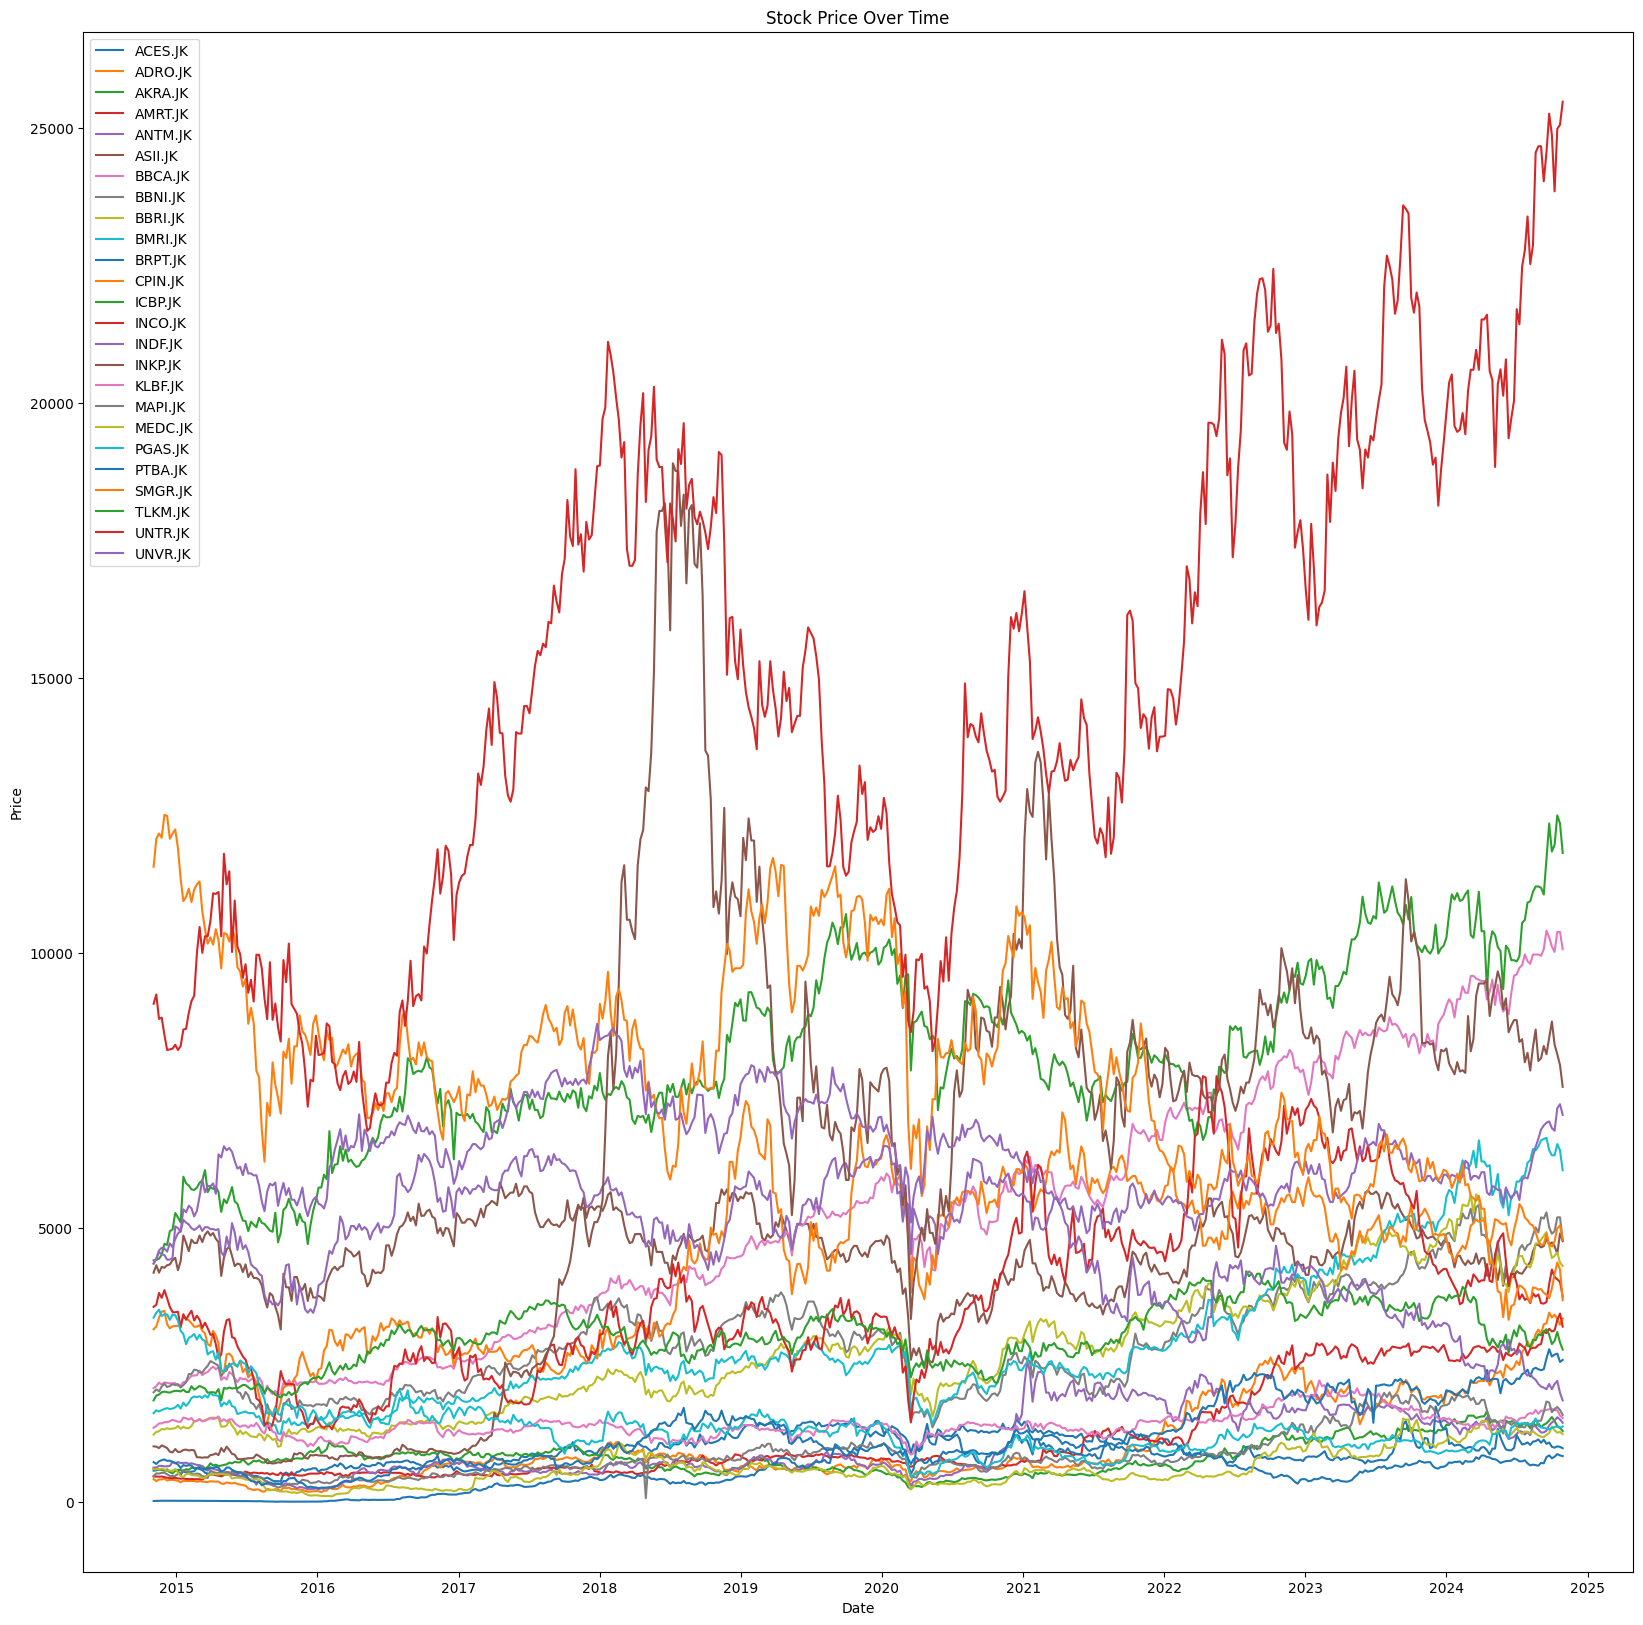

In [9]:
plt.figure(figsize = (20,20))
plt.plot(data)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price Over Time")
plt.legend(data.columns)
plt.show()

# Pra Pemrosesan Data

## Return

### 📈 Rumus Return Saham

1. **Return Sederhana**  
$$
R = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100\%
$$  
di mana:
- $R$  = Return saham
- $P_t$ = Harga saham saat ini  
- $P_{t-1}$ = Harga saham sebelumnya

---

In [10]:
#Mencari Return Stock
return_stock = data.pct_change()
return_stock

Ticker       ACES.JK   ADRO.JK   AKRA.JK   AMRT.JK   ANTM.JK   ASII.JK  \
2014-11-03       NaN       NaN       NaN       NaN       NaN       NaN   
2014-11-10  0.012132 -0.087264 -0.017915  0.000000  0.000000  0.032304   
2014-11-17  0.025685  0.074935 -0.011609 -0.008493  0.048973 -0.031293   
2014-11-24 -0.013356  0.004808  0.003356  0.008565  0.000000  0.025126   
2014-12-01 -0.018613  0.038278 -0.026756 -0.027601 -0.015060 -0.003501   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.060819 -0.025782  0.041611 -0.015516  0.037857  0.009605   
2024-10-07  0.034869  0.015760 -0.046392  0.006433  0.026153 -0.014376   
2024-10-14  0.056558 -0.023126 -0.061486  0.059764  0.038229 -0.030674   
2024-10-21 -0.026196 -0.031765 -0.024478  0.035887 -0.024548  0.082983   
2024-10-28 -0.016374  0.035593 -0.042066 -0.068996 -0.041060 -0.028811   

Ticker       BBCA.JK   BBNI.JK   BBRI.JK   BMRI.JK  ...   INKP.JK   KLBF.JK  \
2014-11-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2014-11-10  0.017814  0.025961  0.039740  0.031404  ... -0.004907  0.024300   
2014-11-17  0.030747 -0.017032  0.009360 -0.011940  ... -0.025641  0.032351   
2014-11-24 -0.016521  0.043564  0.030912  0.014502  ...  0.048583  0.000000   
2014-12-01  0.018665  0.024668 -0.004498  0.011912  ... -0.021236  0.017409   
...              ...       ...       ...       ...  ...       ...       ...   
2024-09-30 -0.016438 -0.022991 -0.046945 -0.014205  ...  0.035140  0.002950   
2024-10-07 -0.009593  0.009413  0.008097  0.000000  ... -0.048120 -0.011765   
2024-10-14  0.036146  0.051287  0.014279  0.032304  ... -0.020893 -0.002976   
2024-10-21  0.000000  0.000000 -0.040255 -0.017334  ... -0.024283 -0.055522   
2024-10-28 -0.030163 -0.079637 -0.014669 -0.056822  ... -0.049774 -0.030341   

Ticker       MAPI.JK   MEDC.JK   PGAS.JK   PTBA.JK   SMGR.JK   TLKM.JK  \
2014-11-03       NaN       NaN       NaN       NaN       NaN       NaN   
2014-11-10  0.102296  0.003317  0.025580 -0.045082  0.044106  0.047978   
2014-11-17 -0.007576 -0.004959  0.016531  0.068670  0.007869  0.009259   
2014-11-24  0.026718  0.018272 -0.032525  0.028112 -0.006246  0.021407   
2014-12-01  0.000000 -0.024470  0.008257  0.016927  0.034403  0.005489   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.095317  0.091918  0.020331 -0.047739  0.046812 -0.055738   
2024-10-07  0.032887 -0.045718  0.013284  0.013570  0.069391  0.020833   
2024-10-14  0.023585 -0.036502  0.003642  0.006322  0.048786  0.054422   
2024-10-21 -0.031682  0.011839 -0.016691 -0.055802 -0.028643 -0.061290   
2024-10-28 -0.052945 -0.031201  0.019926  0.014090 -0.132107 -0.044674   

Ticker       UNTR.JK   UNVR.JK  
2014-11-03       NaN       NaN  
2014-11-10  0.018519  0.021649  
2014-11-17 -0.048160  0.032913  
2014-11-24  0.002729  0.011131  
2014-12-01 -0.035492 -0.003885  
...              ...       ...  
2024-09-30 -0.015357 -0.044104  
2024-10-07 -0.041243  0.046139  
2024-10-14  0.047797  0.026462  
2024-10-21  0.002801 -0.098598  
2024-10-28  0.016799 -0.069242  

[522 rows x 25 columns]

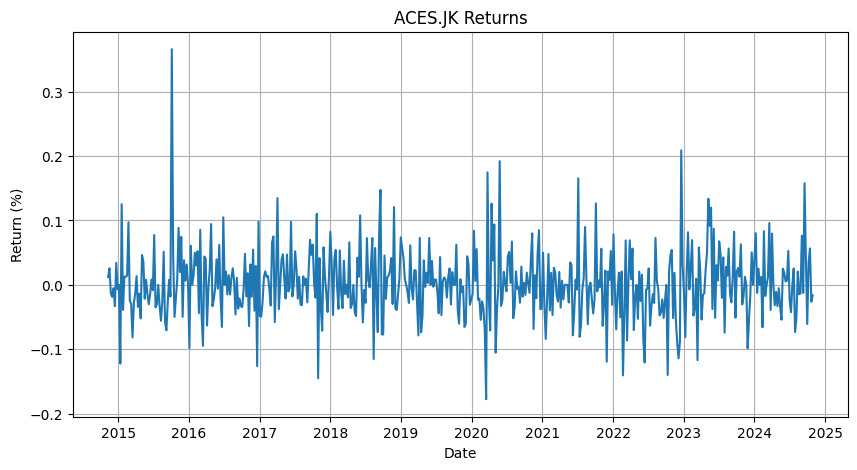

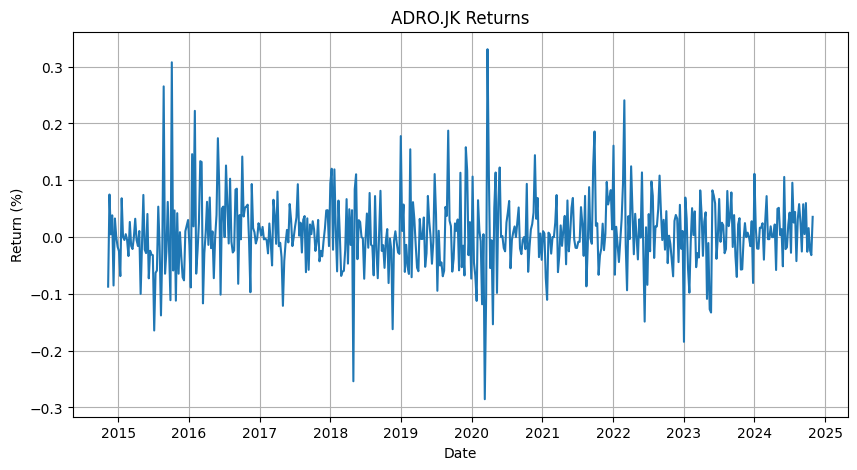

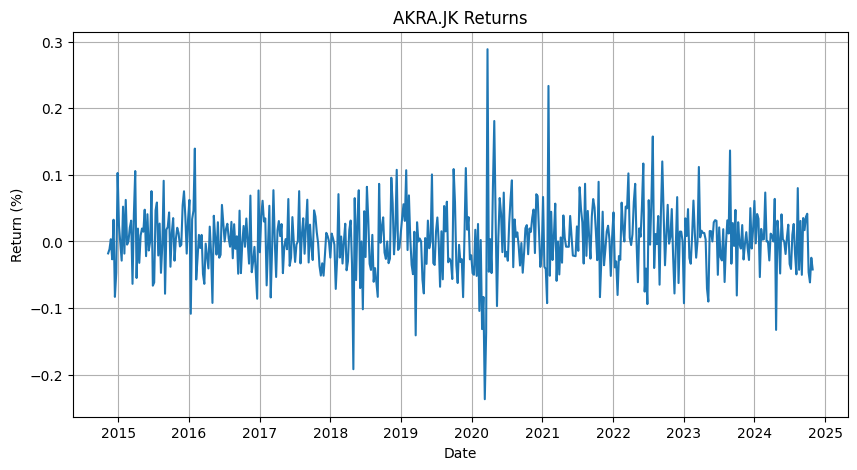

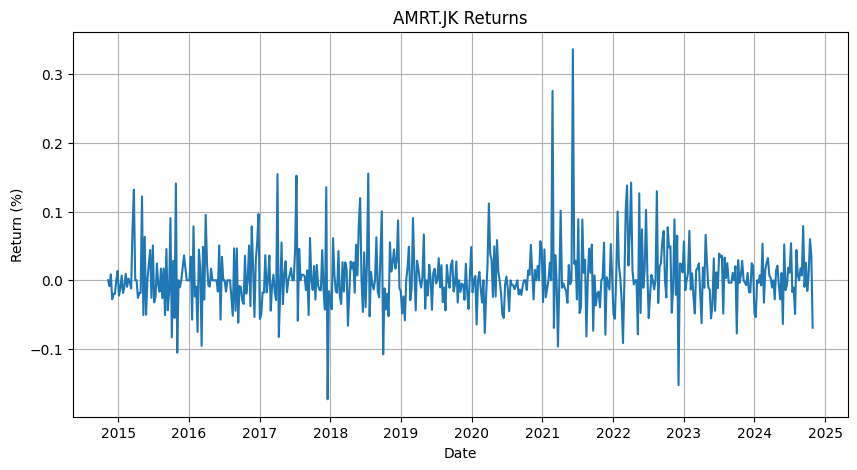

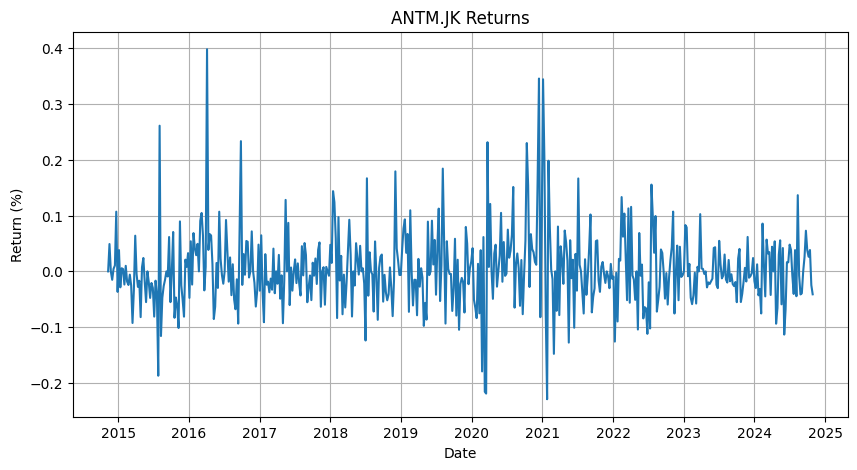

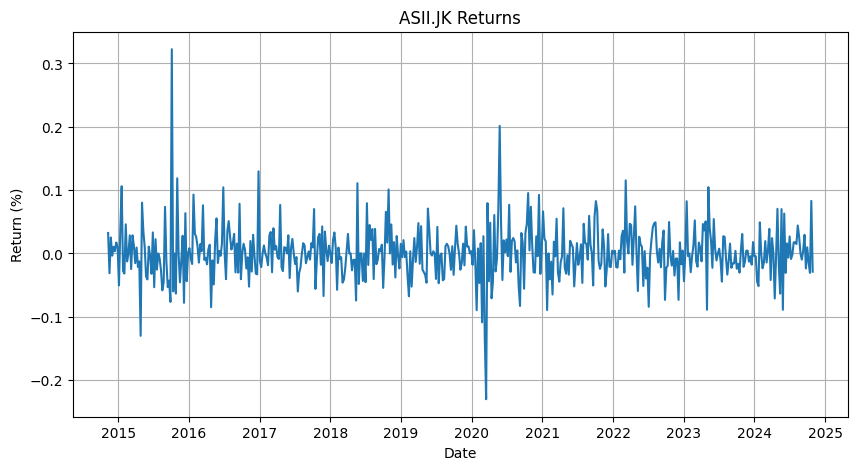

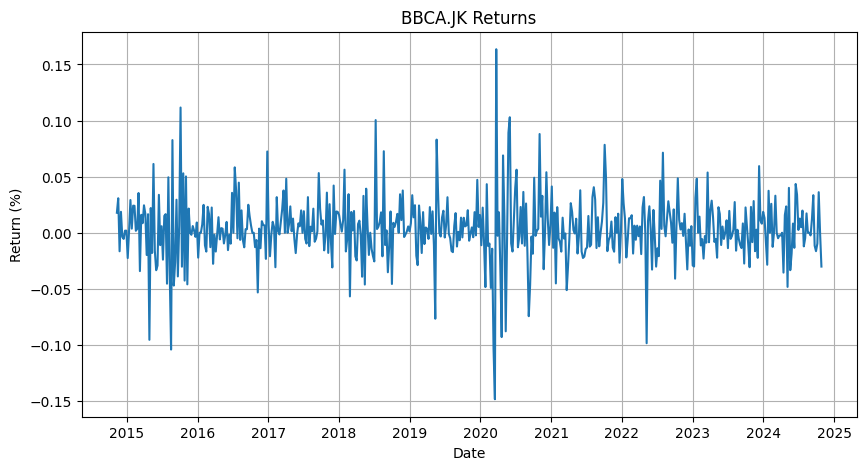

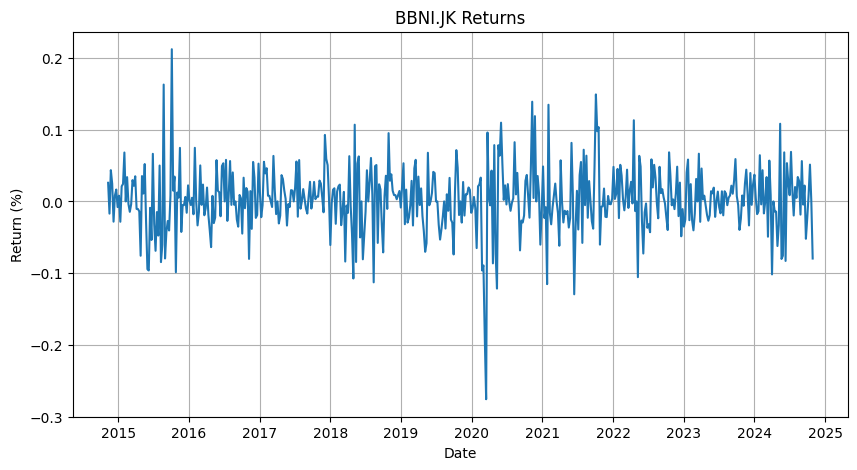

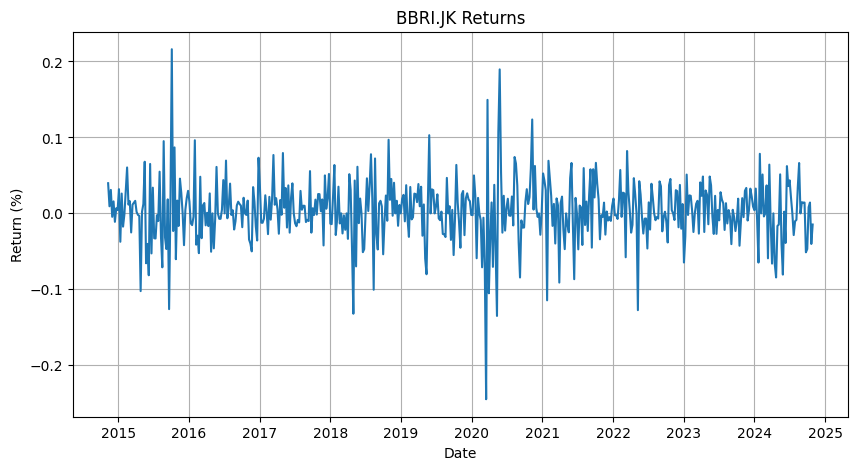

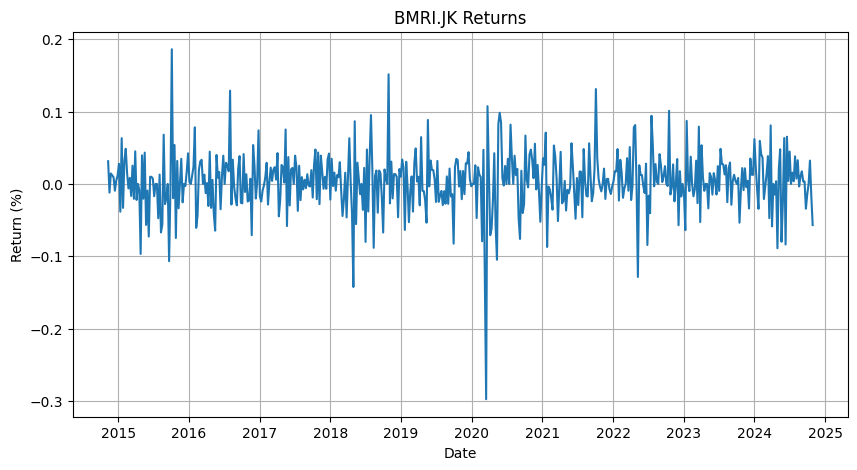

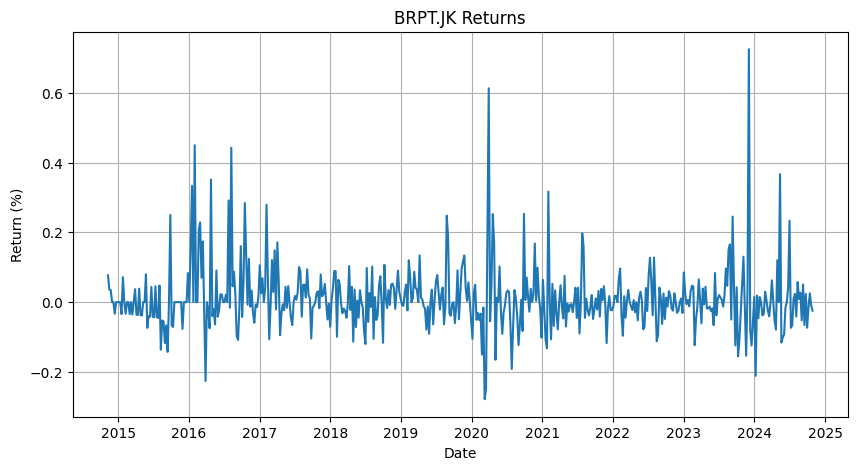

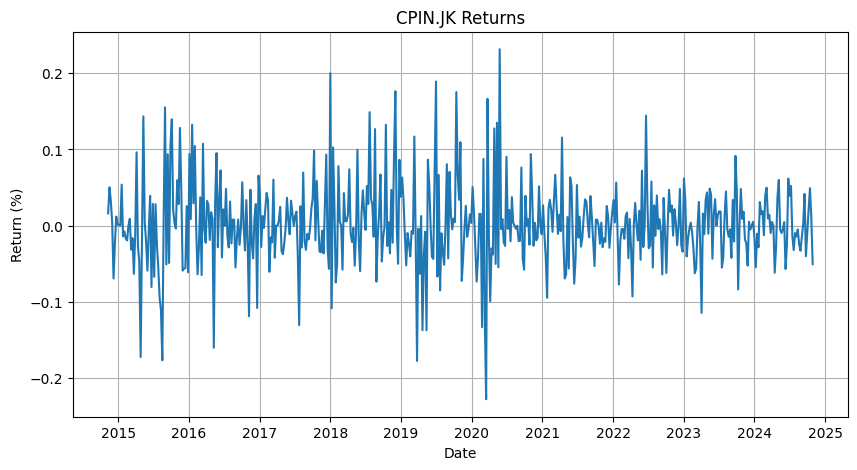

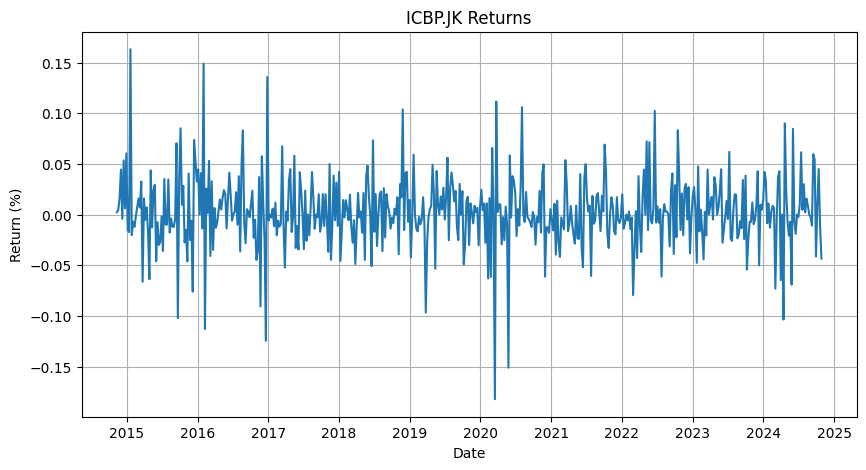

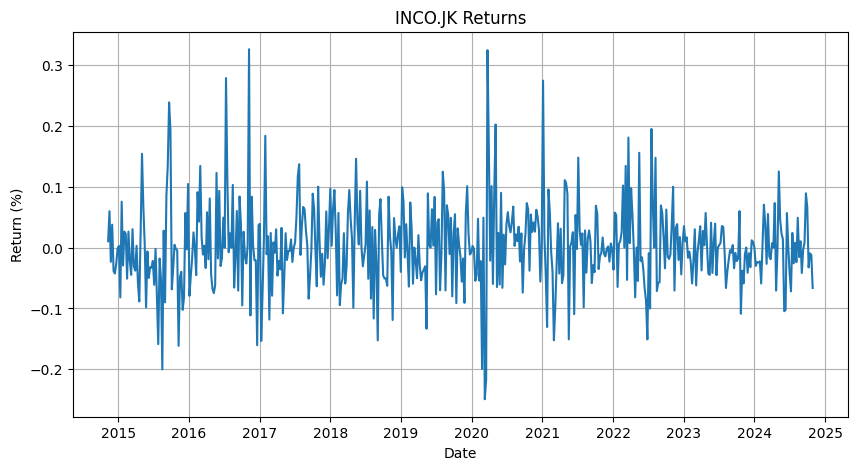

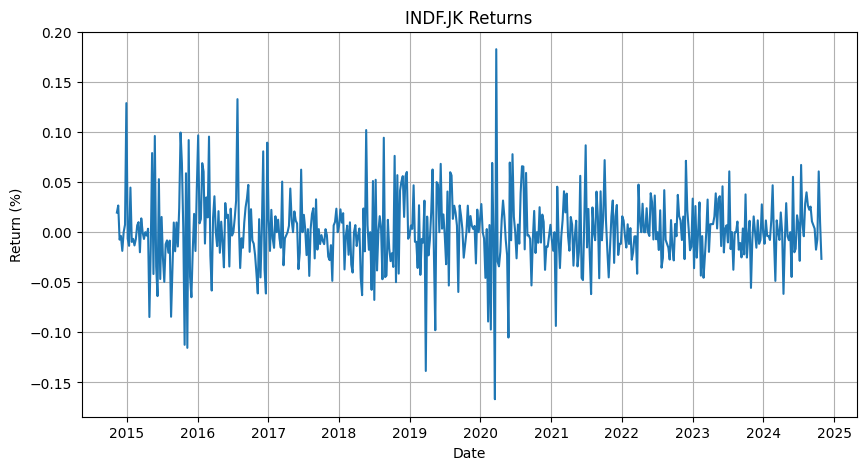

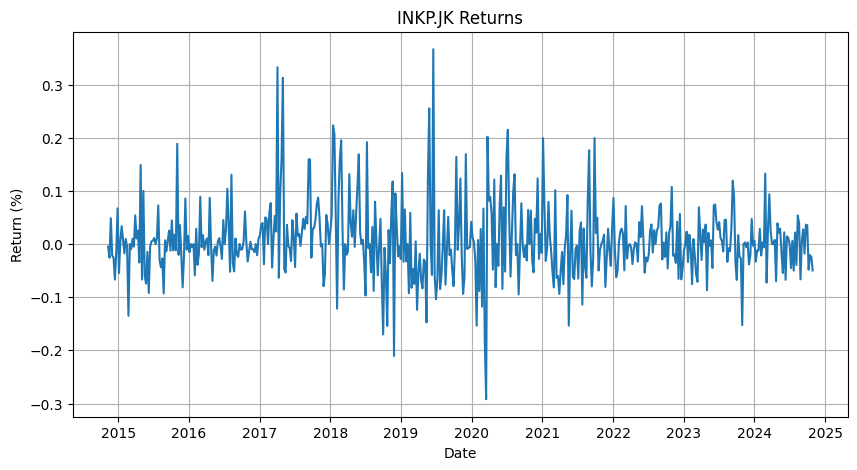

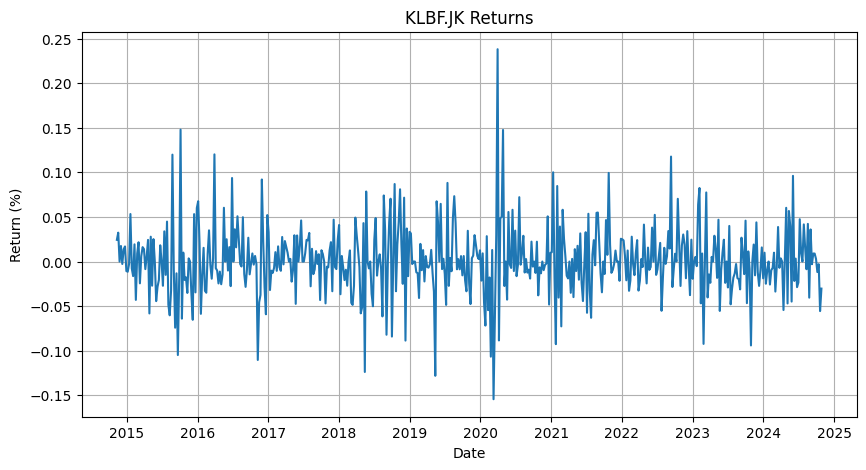

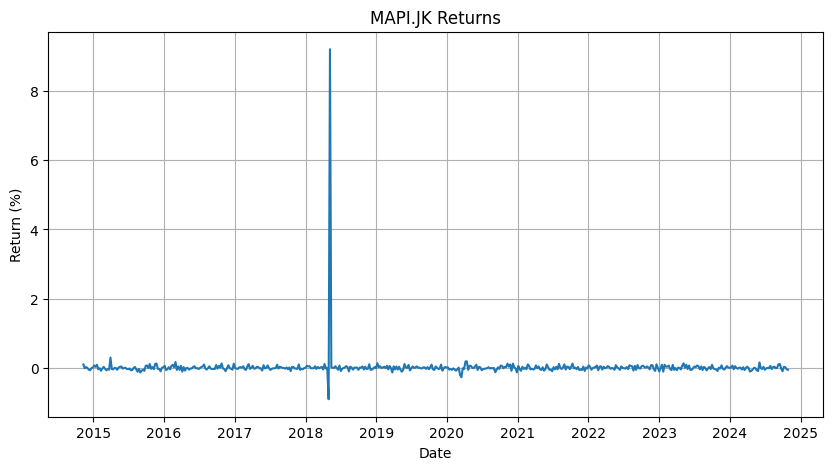

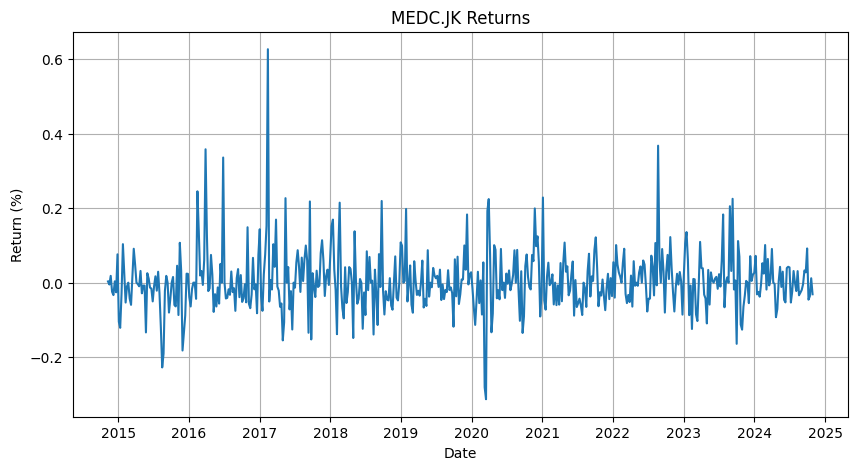

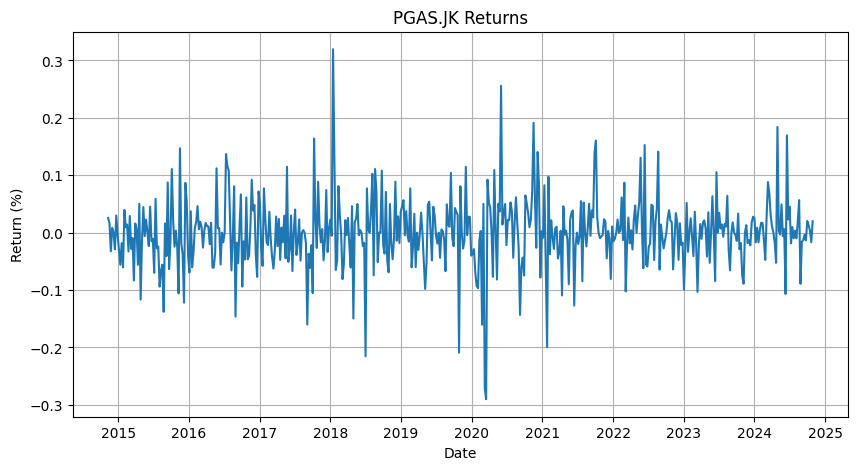

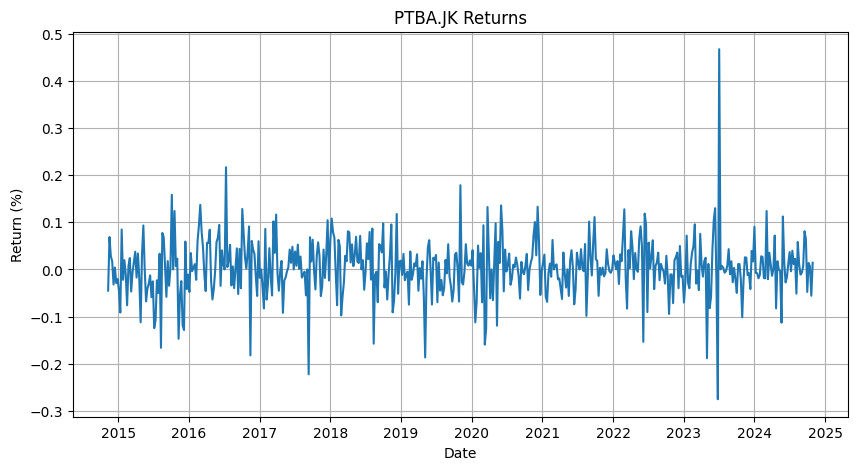

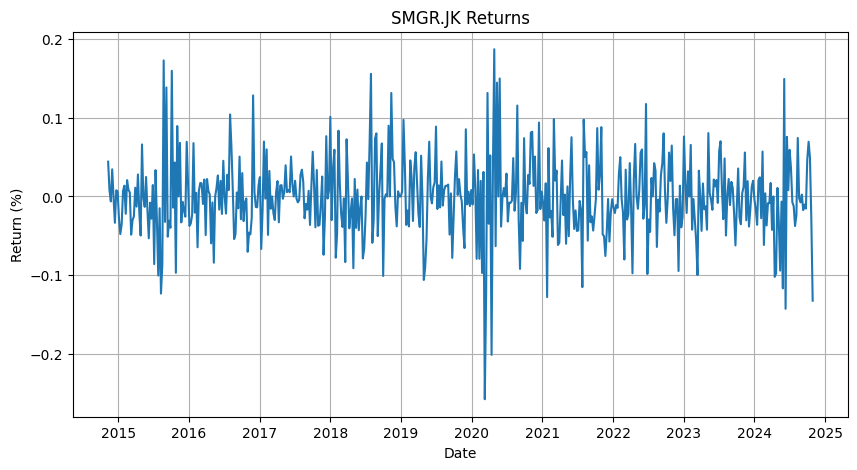

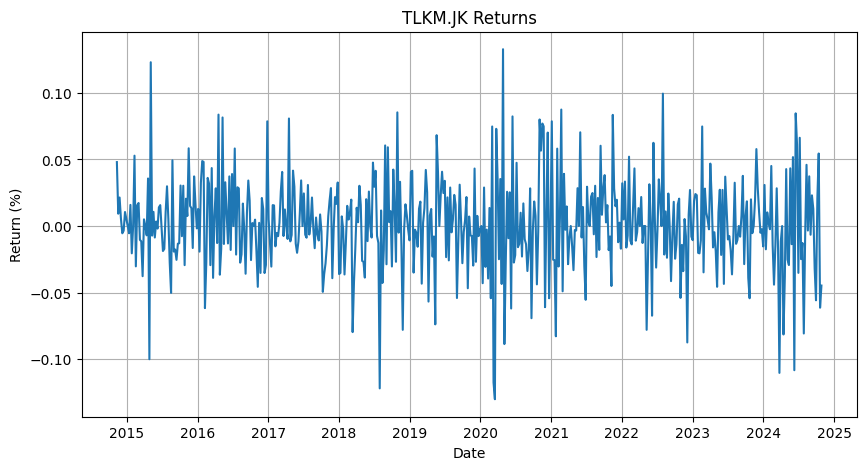

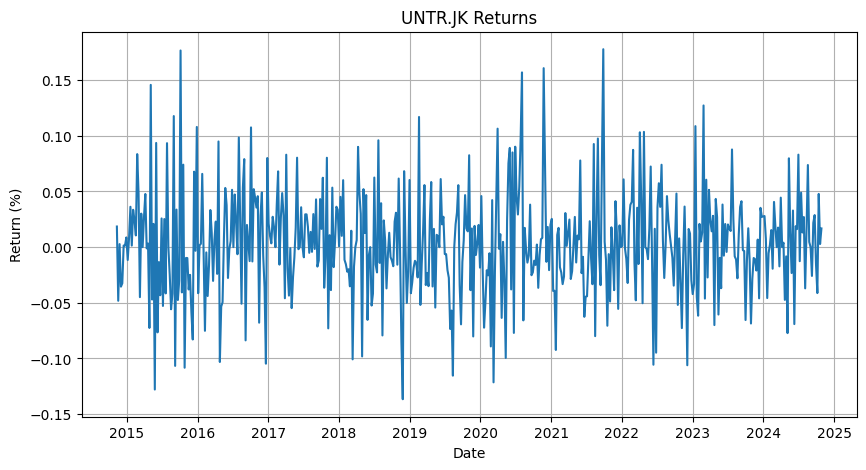

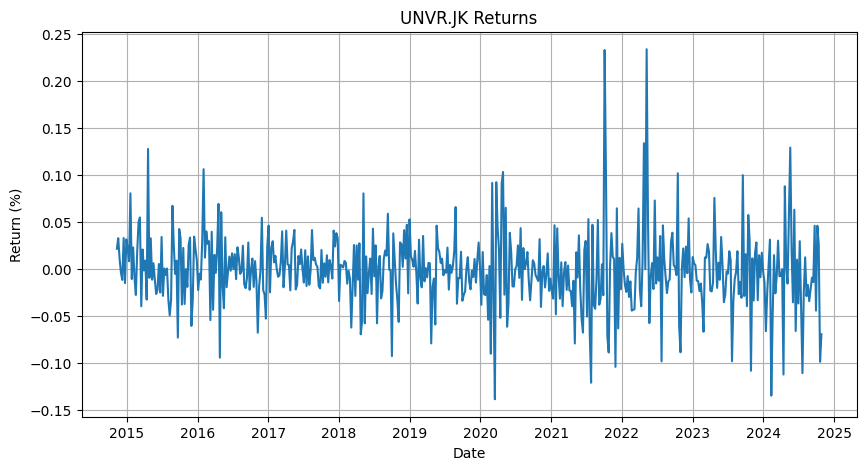

In [11]:
for stock in return_stock.columns:
    plt.figure(figsize=(10, 5))
    return_stock[stock].plot()
    plt.title(f'{stock} Returns')
    plt.xlabel('Date')
    plt.ylabel('Return (%)')
    plt.grid(True)
    plt.show()

### 📊 Expected Return Berdasarkan Rata-Rata Historis

Rumus:

$$
E(R) = \frac{1}{n} \sum_{t=1}^{n} R_t
$$

di mana:

<div style="margin-left: 30px; display: flex; flex-direction: column;">
  <p>- \( E(R) \) &nbsp;: Expected return saham</p>
  <p>- \( n \) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: Jumlah periode (hari, bulan, tahun, dll.)</p>
  <p>- \( R_t \) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: Return pada periode ke-\( t \)</p>
</div>


In [12]:
#Expected Return Mingguan
expected_returns = return_stock.mean()
ExpectedReturns = expected_returns
expected_returns

Ticker
ACES.JK    0.002148
ADRO.JK    0.006091
AKRA.JK    0.002732
AMRT.JK    0.004735
ANTM.JK    0.003837
ASII.JK    0.001137
BBCA.JK    0.003449
BBNI.JK    0.002711
BBRI.JK    0.003247
BMRI.JK    0.003377
BRPT.JK    0.010870
CPIN.JK    0.002272
ICBP.JK    0.002526
INCO.JK    0.002450
INDF.JK    0.001589
INKP.JK    0.006205
KLBF.JK    0.000988
MAPI.JK    0.019820
MEDC.JK    0.004513
PGAS.JK    0.000153
PTBA.JK    0.004263
SMGR.JK   -0.000892
TLKM.JK    0.001393
UNTR.JK    0.003105
UNVR.JK   -0.000829
dtype: float64

In [13]:
# Mengubah Return Dalam Bentuk Persen
return_stock_percent = expected_returns * 100
return_stock_percent

return_stock_percent_formatted = return_stock_percent.map("{:.2f}%".format)
return_stock_percent_formatted

Ticker
ACES.JK     0.21%
ADRO.JK     0.61%
AKRA.JK     0.27%
AMRT.JK     0.47%
ANTM.JK     0.38%
ASII.JK     0.11%
BBCA.JK     0.34%
BBNI.JK     0.27%
BBRI.JK     0.32%
BMRI.JK     0.34%
BRPT.JK     1.09%
CPIN.JK     0.23%
ICBP.JK     0.25%
INCO.JK     0.25%
INDF.JK     0.16%
INKP.JK     0.62%
KLBF.JK     0.10%
MAPI.JK     1.98%
MEDC.JK     0.45%
PGAS.JK     0.02%
PTBA.JK     0.43%
SMGR.JK    -0.09%
TLKM.JK     0.14%
UNTR.JK     0.31%
UNVR.JK    -0.08%
dtype: object

In [14]:
#Expected Return Tahunan
expected_annual_returns = expected_returns * 52  # karena ada 52 minggu dalam setahun
expected_annual_returns

Ticker
ACES.JK    0.111718
ADRO.JK    0.316716
AKRA.JK    0.142055
AMRT.JK    0.246234
ANTM.JK    0.199526
ASII.JK    0.059108
BBCA.JK    0.179333
BBNI.JK    0.140976
BBRI.JK    0.168823
BMRI.JK    0.175597
BRPT.JK    0.565235
CPIN.JK    0.118141
ICBP.JK    0.131340
INCO.JK    0.127410
INDF.JK    0.082629
INKP.JK    0.322680
KLBF.JK    0.051352
MAPI.JK    1.030661
MEDC.JK    0.234671
PGAS.JK    0.007969
PTBA.JK    0.221680
SMGR.JK   -0.046364
TLKM.JK    0.072432
UNTR.JK    0.161443
UNVR.JK   -0.043088
dtype: float64

In [15]:
# Mengubah Return Dalam Bentuk Persen
return_stock_percent = expected_annual_returns * 100
return_annual_stock_percent = return_stock_percent.map("{:.2f}%".format)
return_annual_stock_percent



Ticker
ACES.JK     11.17%
ADRO.JK     31.67%
AKRA.JK     14.21%
AMRT.JK     24.62%
ANTM.JK     19.95%
ASII.JK      5.91%
BBCA.JK     17.93%
BBNI.JK     14.10%
BBRI.JK     16.88%
BMRI.JK     17.56%
BRPT.JK     56.52%
CPIN.JK     11.81%
ICBP.JK     13.13%
INCO.JK     12.74%
INDF.JK      8.26%
INKP.JK     32.27%
KLBF.JK      5.14%
MAPI.JK    103.07%
MEDC.JK     23.47%
PGAS.JK      0.80%
PTBA.JK     22.17%
SMGR.JK     -4.64%
TLKM.JK      7.24%
UNTR.JK     16.14%
UNVR.JK     -4.31%
dtype: object

## Resiko

### 📊 Risiko Saham dengan Standar Deviasi

#### Rumus:

$$
\sigma = \sqrt{\frac{1}{n} \sum_{t=1}^{n} (R_t - \bar{R})^2}
$$

di mana:
- $σ$ = **Standar deviasi** (risiko saham)
- $R_t$ = **Return** pada periode \( t \)
- $\bar{R}$ = **Rata-rata return** saham
- $n$ = **Jumlah periode** yang digunakan dalam perhitungan


In [16]:
return_stock.dropna()

Ticker       ACES.JK   ADRO.JK   AKRA.JK   AMRT.JK   ANTM.JK   ASII.JK  \
2014-11-10  0.012132 -0.087264 -0.017915  0.000000  0.000000  0.032304   
2014-11-17  0.025685  0.074935 -0.011609 -0.008493  0.048973 -0.031293   
2014-11-24 -0.013356  0.004808  0.003356  0.008565  0.000000  0.025126   
2014-12-01 -0.018613  0.038278 -0.026756 -0.027601 -0.015060 -0.003501   
2014-12-08 -0.005172 -0.085253  0.032646 -0.019651  0.004587  0.010541   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.060819 -0.025782  0.041611 -0.015516  0.037857  0.009605   
2024-10-07  0.034869  0.015760 -0.046392  0.006433  0.026153 -0.014376   
2024-10-14  0.056558 -0.023126 -0.061486  0.059764  0.038229 -0.030674   
2024-10-21 -0.026196 -0.031765 -0.024478  0.035887 -0.024548  0.082983   
2024-10-28 -0.016374  0.035593 -0.042066 -0.068996 -0.041060 -0.028811   

Ticker       BBCA.JK   BBNI.JK   BBRI.JK   BMRI.JK  ...   INKP.JK   KLBF.JK  \
2014-11-10  0.017814  0.025961  0.039740  0.031404  ... -0.004907  0.024300   
2014-11-17  0.030747 -0.017032  0.009360 -0.011940  ... -0.025641  0.032351   
2014-11-24 -0.016521  0.043564  0.030912  0.014502  ...  0.048583  0.000000   
2014-12-01  0.018665  0.024668 -0.004498  0.011912  ... -0.021236  0.017409   
2014-12-08 -0.003665 -0.028241  0.015813  0.009417  ... -0.025641 -0.002738   
...              ...       ...       ...       ...  ...       ...       ...   
2024-09-30 -0.016438 -0.022991 -0.046945 -0.014205  ...  0.035140  0.002950   
2024-10-07 -0.009593  0.009413  0.008097  0.000000  ... -0.048120 -0.011765   
2024-10-14  0.036146  0.051287  0.014279  0.032304  ... -0.020893 -0.002976   
2024-10-21  0.000000  0.000000 -0.040255 -0.017334  ... -0.024283 -0.055522   
2024-10-28 -0.030163 -0.079637 -0.014669 -0.056822  ... -0.049774 -0.030341   

Ticker       MAPI.JK   MEDC.JK   PGAS.JK   PTBA.JK   SMGR.JK   TLKM.JK  \
2014-11-10  0.102296  0.003317  0.025580 -0.045082  0.044106  0.047978   
2014-11-17 -0.007576 -0.004959  0.016531  0.068670  0.007869  0.009259   
2014-11-24  0.026718  0.018272 -0.032525  0.028112 -0.006246  0.021407   
2014-12-01  0.000000 -0.024470  0.008257  0.016927  0.034403  0.005489   
2014-12-08 -0.048327 -0.033445  0.000000 -0.032010 -0.001519 -0.005459   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.095317  0.091918  0.020331 -0.047739  0.046812 -0.055738   
2024-10-07  0.032887 -0.045718  0.013284  0.013570  0.069391  0.020833   
2024-10-14  0.023585 -0.036502  0.003642  0.006322  0.048786  0.054422   
2024-10-21 -0.031682  0.011839 -0.016691 -0.055802 -0.028643 -0.061290   
2024-10-28 -0.052945 -0.031201  0.019926  0.014090 -0.132107 -0.044674   

Ticker       UNTR.JK   UNVR.JK  
2014-11-10  0.018519  0.021649  
2014-11-17 -0.048160  0.032913  
2014-11-24  0.002729  0.011131  
2014-12-01 -0.035492 -0.003885  
2014-12-08 -0.032448 -0.011484  
...              ...       ...  
2024-09-30 -0.015357 -0.044104  
2024-10-07 -0.041243  0.046139  
2024-10-14  0.047797  0.026462  
2024-10-21  0.002801 -0.098598  
2024-10-28  0.016799 -0.069242  

[521 rows x 25 columns]

In [17]:
varians_populasi = ((return_stock['ACES.JK'].dropna() - expected_returns['ACES.JK']) ** 2).sum() / len(return_stock)
varians_populasi

std_manual = varians_populasi ** 0.5
std_manual

np.float64(0.0539756222191449)

In [18]:
variansi_stock = return_stock.var()
variansi_stock

Ticker
ACES.JK    0.002925
ADRO.JK    0.004301
AKRA.JK    0.002608
AMRT.JK    0.002190
ANTM.JK    0.004683
ASII.JK    0.001811
BBCA.JK    0.000833
BBNI.JK    0.002060
BBRI.JK    0.001682
BMRI.JK    0.001667
BRPT.JK    0.008663
CPIN.JK    0.002962
ICBP.JK    0.001258
INCO.JK    0.004798
INDF.JK    0.001326
INKP.JK    0.004872
KLBF.JK    0.001525
MAPI.JK    0.167333
MEDC.JK    0.006600
PGAS.JK    0.003682
PTBA.JK    0.003700
SMGR.JK    0.002598
TLKM.JK    0.001231
UNTR.JK    0.002263
UNVR.JK    0.001626
dtype: float64

In [19]:
akar_varians = variansi_stock ** 0.5
akar_varians

Ticker
ACES.JK    0.054079
ADRO.JK    0.065582
AKRA.JK    0.051064
AMRT.JK    0.046802
ANTM.JK    0.068432
ASII.JK    0.042556
BBCA.JK    0.028865
BBNI.JK    0.045385
BBRI.JK    0.041009
BMRI.JK    0.040827
BRPT.JK    0.093073
CPIN.JK    0.054421
ICBP.JK    0.035463
INCO.JK    0.069268
INDF.JK    0.036414
INKP.JK    0.069799
KLBF.JK    0.039053
MAPI.JK    0.409064
MEDC.JK    0.081242
PGAS.JK    0.060683
PTBA.JK    0.060829
SMGR.JK    0.050967
TLKM.JK    0.035086
UNTR.JK    0.047568
UNVR.JK    0.040329
dtype: float64

In [20]:
#Resiko
risk_stock = return_stock.dropna().std()
risk_stock

Ticker
ACES.JK    0.054079
ADRO.JK    0.065582
AKRA.JK    0.051064
AMRT.JK    0.046802
ANTM.JK    0.068432
ASII.JK    0.042556
BBCA.JK    0.028865
BBNI.JK    0.045385
BBRI.JK    0.041009
BMRI.JK    0.040827
BRPT.JK    0.093073
CPIN.JK    0.054421
ICBP.JK    0.035463
INCO.JK    0.069268
INDF.JK    0.036414
INKP.JK    0.069799
KLBF.JK    0.039053
MAPI.JK    0.409064
MEDC.JK    0.081242
PGAS.JK    0.060683
PTBA.JK    0.060829
SMGR.JK    0.050967
TLKM.JK    0.035086
UNTR.JK    0.047568
UNVR.JK    0.040329
dtype: float64

In [21]:
# Convert standard deviation to percentage format
risk_stock_percent = risk_stock * 100
risk_stock_percent
# Format with percentage sign for display
risk_stock_percent_formatted = risk_stock_percent.map("{:.2f}%".format)
risk_stock_percent_formatted

Ticker
ACES.JK     5.41%
ADRO.JK     6.56%
AKRA.JK     5.11%
AMRT.JK     4.68%
ANTM.JK     6.84%
ASII.JK     4.26%
BBCA.JK     2.89%
BBNI.JK     4.54%
BBRI.JK     4.10%
BMRI.JK     4.08%
BRPT.JK     9.31%
CPIN.JK     5.44%
ICBP.JK     3.55%
INCO.JK     6.93%
INDF.JK     3.64%
INKP.JK     6.98%
KLBF.JK     3.91%
MAPI.JK    40.91%
MEDC.JK     8.12%
PGAS.JK     6.07%
PTBA.JK     6.08%
SMGR.JK     5.10%
TLKM.JK     3.51%
UNTR.JK     4.76%
UNVR.JK     4.03%
dtype: object

## Covarian

### 📊 Kovarians Antara Dua Variabel

Rumus Kovarians antara dua set data (misalnya, return saham dari dua perusahaan) adalah:

$$
Cov(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
$$

di mana:
- $X$ dan $Y$ = dua set data (misalnya, return saham dari dua saham berbeda)
- $ X_i $ dan $ Y_i $ = elemen-elemen individual dari masing-masing dataset pada indeks $i$
- $\bar{X}$ dan $ \bar{Y}$ = rata-rata dari data $ X $ dan $Y $
- $n $ = jumlah data dalam set (jumlah periode)


In [22]:
cov_manual = sum((return_stock["ACES.JK"].dropna() - expected_returns['ACES.JK']) * (return_stock["ADRO.JK"].dropna() - expected_returns['ADRO.JK'])) / (521 - 1)



cov_pandas = return_stock.cov().iloc[0, 1]

print(f"Kovarian Manual: {cov_manual}")
print(f"Kovarian dari Pandas .cov(): {cov_pandas}")


Kovarian Manual: 0.0006471693778638782
Kovarian dari Pandas .cov(): 0.0006471693778638797


In [23]:
# numPeriods = len(ExcessReturns.index)
# VarCov = ExcessReturns.transpose().dot(ExcessReturns) / ( numPeriods - 1 )
# VarCov
#Covarian
cov_stock = return_stock.cov()
cov_stock

Ticker    ACES.JK   ADRO.JK   AKRA.JK   AMRT.JK   ANTM.JK   ASII.JK   BBCA.JK  \
Ticker                                                                          
ACES.JK  0.002925  0.000647  0.000311  0.000036  0.000501  0.000683  0.000438   
ADRO.JK  0.000647  0.004301  0.001023  0.000045  0.001305  0.000730  0.000650   
AKRA.JK  0.000311  0.001023  0.002608  0.000048  0.000964  0.000523  0.000469   
AMRT.JK  0.000036  0.000045  0.000048  0.002190  0.000152  0.000081  0.000053   
ANTM.JK  0.000501  0.001305  0.000964  0.000152  0.004683  0.000753  0.000557   
ASII.JK  0.000683  0.000730  0.000523  0.000081  0.000753  0.001811  0.000639   
BBCA.JK  0.000438  0.000650  0.000469  0.000053  0.000557  0.000639  0.000833   
BBNI.JK  0.000676  0.001024  0.000665  0.000109  0.000915  0.000890  0.000816   
BBRI.JK  0.000678  0.000927  0.000563 -0.000017  0.000793  0.000921  0.000747   
BMRI.JK  0.000552  0.000881  0.000614  0.000054  0.000673  0.000881  0.000745   
BRPT.JK  0.000565  0.000929  0.000676  0.000344  0.001126  0.000201  0.000394   
CPIN.JK  0.000738  0.000776  0.000265  0.000108  0.000767  0.000869  0.000539   
ICBP.JK  0.000295  0.000267  0.000188 -0.000008  0.000258  0.000419  0.000315   
INCO.JK  0.000514  0.001554  0.001058  0.000293  0.002803  0.000552  0.000583   
INDF.JK  0.000380  0.000451  0.000431 -0.000065  0.000497  0.000533  0.000379   
INKP.JK  0.000664  0.001020  0.000752  0.000187  0.001392  0.000891  0.000614   
KLBF.JK  0.000330  0.000578  0.000387  0.000073  0.000368  0.000560  0.000401   
MAPI.JK  0.000064  0.002422  0.001744 -0.000141  0.000220  0.000361  0.001073   
MEDC.JK  0.000414  0.001504  0.001025  0.000152  0.001900  0.000662  0.000607   
PGAS.JK  0.000455  0.001264  0.000735  0.000204  0.001656  0.000950  0.000660   
PTBA.JK  0.000466  0.002307  0.000529  0.000098  0.001414  0.000596  0.000438   
SMGR.JK  0.000625  0.000867  0.000594  0.000220  0.000808  0.000996  0.000613   
TLKM.JK  0.000320  0.000375  0.000448  0.000222  0.000564  0.000498  0.000425   
UNTR.JK  0.000280  0.001539  0.000415 -0.000047  0.000652  0.000665  0.000334   
UNVR.JK  0.000309  0.000268  0.000211  0.000017  0.000226  0.000399  0.000284   

Ticker    BBNI.JK   BBRI.JK   BMRI.JK  ...   INKP.JK   KLBF.JK   MAPI.JK  \
Ticker                                 ...                                 
ACES.JK  0.000676  0.000678  0.000552  ...  0.000664  0.000330  0.000064   
ADRO.JK  0.001024  0.000927  0.000881  ...  0.001020  0.000578  0.002422   
AKRA.JK  0.000665  0.000563  0.000614  ...  0.000752  0.000387  0.001744   
AMRT.JK  0.000109 -0.000017  0.000054  ...  0.000187  0.000073 -0.000141   
ANTM.JK  0.000915  0.000793  0.000673  ...  0.001392  0.000368  0.000220   
ASII.JK  0.000890  0.000921  0.000881  ...  0.000891  0.000560  0.000361   
BBCA.JK  0.000816  0.000747  0.000745  ...  0.000614  0.000401  0.001073   
BBNI.JK  0.002060  0.001346  0.001330  ...  0.000892  0.000639  0.002844   
BBRI.JK  0.001346  0.001682  0.001145  ...  0.000790  0.000553  0.001664   
BMRI.JK  0.001330  0.001145  0.001667  ...  0.000725  0.000519  0.002365   
BRPT.JK  0.000861  0.000580  0.000619  ...  0.001027  0.000635  0.001309   
CPIN.JK  0.000765  0.000805  0.000646  ...  0.000863  0.000590 -0.000420   
ICBP.JK  0.000486  0.000417  0.000485  ...  0.000324  0.000404  0.000852   
INCO.JK  0.000813  0.000634  0.000696  ...  0.001318  0.000414  0.001457   
INDF.JK  0.000562  0.000524  0.000540  ...  0.000719  0.000469  0.001052   
INKP.JK  0.000892  0.000790  0.000725  ...  0.004872  0.000585  0.000610   
KLBF.JK  0.000639  0.000553  0.000519  ...  0.000585  0.001525  0.001228   
MAPI.JK  0.002844  0.001664  0.002365  ...  0.000610  0.001228  0.167333   
MEDC.JK  0.000901  0.000630  0.000844  ...  0.001497  0.000592  0.003603   
PGAS.JK  0.001060  0.000898  0.000895  ...  0.001297  0.000584  0.001506   
PTBA.JK  0.000721  0.000672  0.000638  ...  0.000935  0.000295  0.001116   
SMGR.JK  0.001049  0.000869  0.000921  ...  0.000884  0.000694  

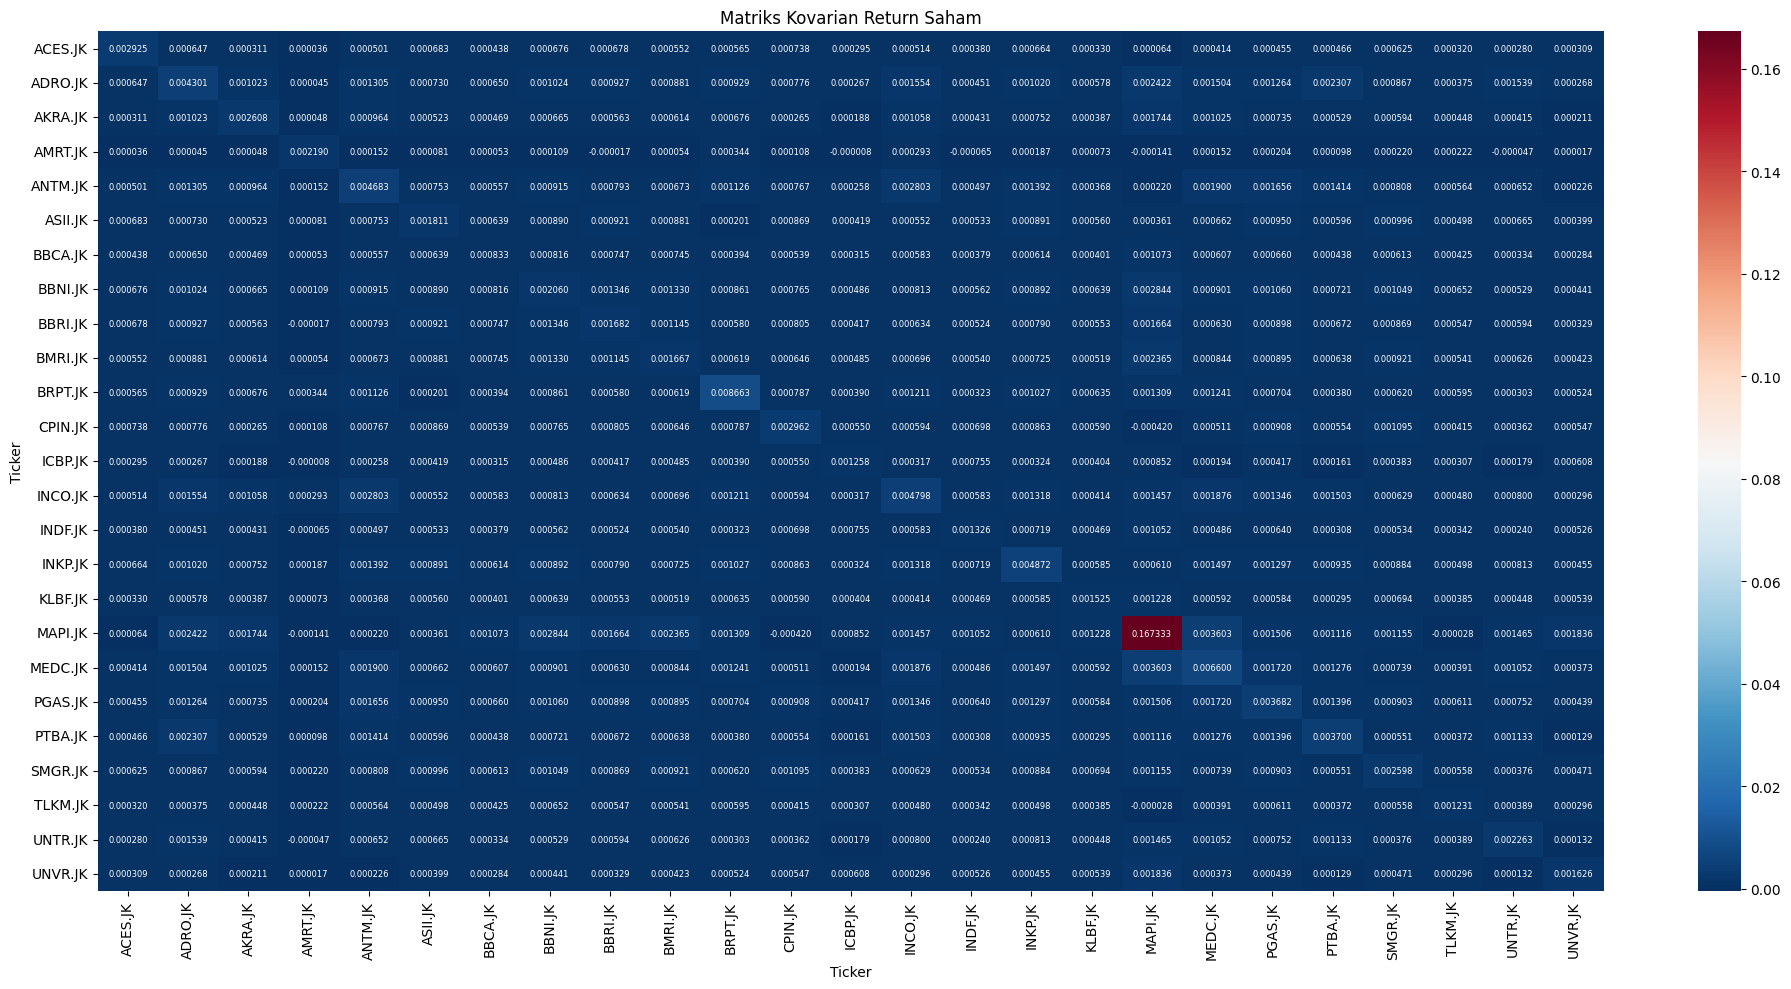

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(cov_stock,
            annot=True,  # Menampilkan nilai
            fmt=".6f",   # Format nilai dengan 6 desimal
            cmap="RdBu_r",annot_kws={"size": 6}
            )  # Colormap merah-putih-biru

plt.title("Matriks Kovarian Return Saham")
plt.tight_layout()
plt.show()

##PORTOFOLIO

### 📊 Return Portofolio

Rumus Return Portofolio:

$$
R_p = \sum_{i=1}^{n} w_i \cdot R_i
$$

di mana:
- $R_p $ = **Return portofolio**
- $w_i $ = **Bobot** atau proporsi investasi dalam aset $i$
- $R_i $ = **Return** aset $i$
- $ n $  = **Jumlah aset** dalam portofolio


In [25]:
weights = np.array([1/25] * 25)  # bobot sama rata
weights
portfolio_weekly_return = return_stock.dropna().dot(weights)
portfolio_weekly_return.name = "Portofolio Return"
portfolio_weekly_return = portfolio_weekly_return.to_frame()
portfolio_weekly_return

Portofolio Return
2014-11-10           0.016691
2014-11-17           0.014703
2014-11-24           0.010849
2014-12-01           0.003076
2014-12-08          -0.015700
...                       ...
2024-09-30          -0.009934
2024-10-07           0.002260
2024-10-14           0.019772
2024-10-21          -0.016688
2024-10-28          -0.036565

[521 rows x 1 columns]

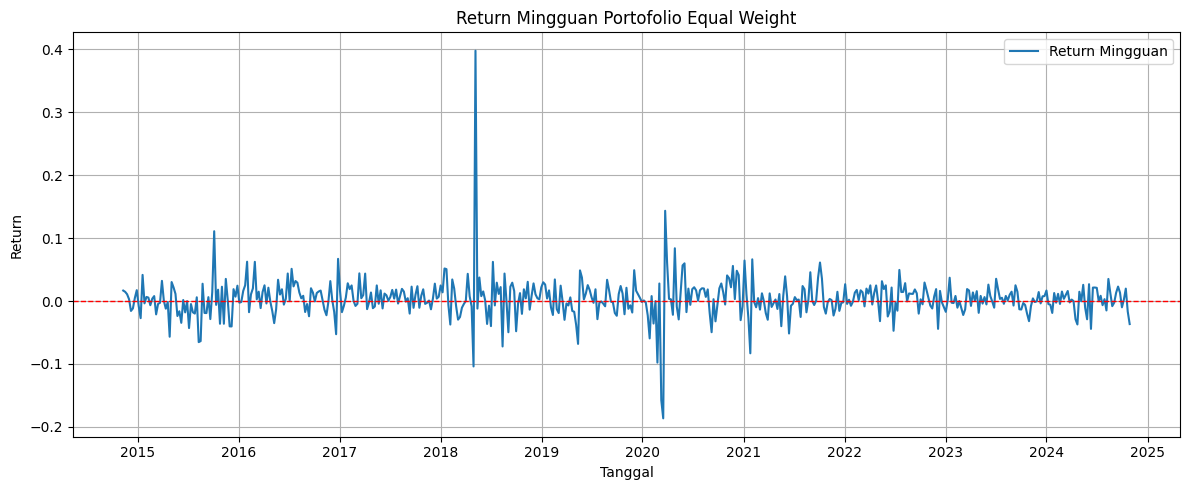

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(portfolio_weekly_return.index, portfolio_weekly_return['Portofolio Return'], label='Return Mingguan')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Return Mingguan Portofolio Equal Weight')
plt.xlabel('Tanggal')
plt.ylabel('Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


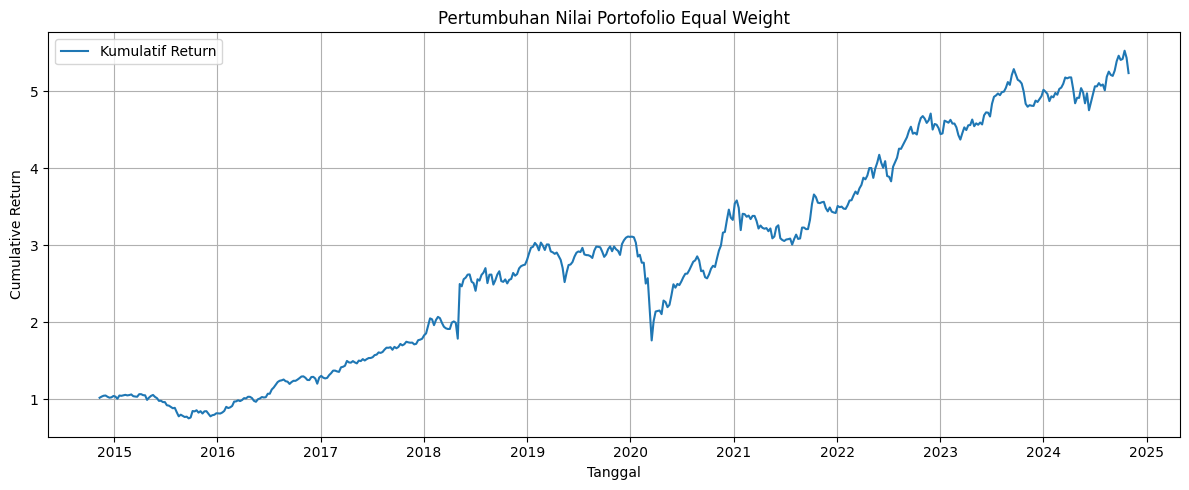

In [27]:
cumulative_return = (1 + portfolio_weekly_return['Portofolio Return']).cumprod()

plt.figure(figsize=(12, 5))
plt.plot(cumulative_return, label='Kumulatif Return')
plt.title('Pertumbuhan Nilai Portofolio Equal Weight')
plt.xlabel('Tanggal')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
portofolio_weekly_return_percent = portfolio_weekly_return * 100
portofolio_weekly_return_percent
portofolio_weekly_return_percent_formatted = portofolio_weekly_return_percent.map("{:.2f}%".format)
portofolio_weekly_return_percent_formatted

Portofolio Return
2014-11-10             1.67%
2014-11-17             1.47%
2014-11-24             1.08%
2014-12-01             0.31%
2014-12-08            -1.57%
...                      ...
2024-09-30            -0.99%
2024-10-07             0.23%
2024-10-14             1.98%
2024-10-21            -1.67%
2024-10-28            -3.66%

[521 rows x 1 columns]

In [29]:
expected_return_portfolio = portfolio_weekly_return.mean().values[0]
print("Expected Return Portofolio (Mingguan):", round(expected_return_portfolio, 4))
expected_annual_return = portfolio_weekly_return.mean().values[0] * 52
print("Expected Return Portoflio (Tahunan):", round(expected_annual_return, 4))


Expected Return Portofolio (Mingguan): 0.0037
Expected Return Portoflio (Tahunan): 0.1911


### 📊 Resiko Portofolio

Rumus Return Portofolio:

$$
\sigma_p = \sqrt{w^T.V.w}
$$

di mana:
- $\sigma_p $ = **Resiko Portofolio**
- $V$ = Matriks Covarian
- $w$ = Bobot


In [30]:
portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(cov_stock, weights)))
portfolio_std_dev = np.sqrt(portfolio_variance)
print("Portfolio Variance:", round(portfolio_variance, 4))
print("Portfolio Standard Deviation:", round(portfolio_std_dev, 4))

Portfolio Variance: 0.0322
Portfolio Standard Deviation: 0.1794


In [31]:
risk_portfolio = portfolio_weekly_return.std().values[0]
print("Risk Portofolio (Mingguan):", round(risk_portfolio, 4))
risk_annual = portfolio_weekly_return.std().values[0] * np.sqrt(52)
print("Risk Portfolio (Tahunan):", round(risk_annual, 4))


Risk Portofolio (Mingguan): 0.0322
Risk Portfolio (Tahunan): 0.2321


In [32]:
risk_free_rate = 0.0625
sharpe_ratio = (expected_annual_return - risk_free_rate) / risk_annual
print("Sharpe Ratio:", round(sharpe_ratio, 4))


Sharpe Ratio: 0.5542


#Implementasi Model

Masalah Optimasi -> Meminimunkan Resiko  
$$\min_{w} \frac{1}{2} w^T V w $$
Constraint ->   
$$w^T 1 = 1$$
$$w^T 𝜇 \geq 𝜇_p^*$$
$$w^T \theta \leq θ_p^*$$

$$
v_i^{t+1} = \omega v_i^t + c_1 r_1 \left( p_{best_i}^t - x_i^t \right) + c_2 r_2 \left( g_{best} - x_i^t \right)
$$

**Keterangan:**

- $p_{best_i}^t$ = posisi terbaik pribadi partikel *i*  
- $g_{best}$ = posisi terbaik global  
- $x_i^t$ = posisi terbaik partikel *i* pada iterasi ke-*t*  
- $\omega$ = faktor inersia  
- $c$ = koefisien akselerasi  
- $r$ = bilangan acak dengan distribusi *uniform* antara 0 dan 1

##TANPA ESG

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

class PortfolioOptimizationPSO:
    """
    Optimisasi Portofolio Tanpa Mempertimbangkan ESG
    Single Objective: Minimasi Risiko dengan return sebagai constraints
    """

    def __init__(self, mu, cov, theta=None, stock_names=None,
                 mu_p_star=0.002, theta_p_star=None,
                 max_iter=1000, num_particles=None, objective='risk'):


        self.mu = mu
        self.cov = cov
        self.theta = theta if theta is not None else None
        self.stock_names = stock_names if stock_names is not None else [f'Asset_{i+1}' for i in range(len(self.mu))]

        # Portfolio parameters
        self.mu_p_star = mu_p_star  # Target Return
        self.theta_p_star = theta_p_star  # Target nilai ESG
        self.objective = "risk"

        self.dim = len(self.mu)

        # PSO parameters
        if num_particles is None:
            num_particles = max(30, self.dim * 15)

        self.num_particles = num_particles
        self.max_iter = max_iter
        self.c1 = 2.0         # Cognitive coefficient
        self.c2 = 2.0         # Social coefficient

        # Inisialisasi partikel
        self._initialize_particles()

        self.history = []
        self.best_position_history = []
        self.return_history = []
        self.risk_history = []
        self.esg_history = [] if self.theta is not None else None

    def _initialize_particles(self):
        print(f"Initializing PSO with {self.num_particles} particles for {self.dim} assets")

        # Inisialisasi posisi partikel
        self.positions = np.random.uniform(0, 1, (self.num_particles, self.dim))
        # Inisialisasi kecepatan partikel
        self.velocities = np.random.uniform(-0.1, 0.1, (self.num_particles, self.dim))

        for i in range(self.num_particles):
            self.positions[i] = self._repair_solution(self.positions[i])

        # Inisialisasi personal bests
        self.personal_best_positions = self.positions.copy()
        self.personal_best_scores = np.array([self.fitness(p) for p in self.positions])

        # Inisialisasi global best
        best_idx = np.argmin(self.personal_best_scores)
        self.global_best_position = self.personal_best_positions[best_idx].copy()
        self.global_best_score = self.personal_best_scores[best_idx]

    def _repair_solution(self, position):
        position = np.maximum(position, 0)

        sum_pos = np.sum(position)
        if sum_pos > 0:
            position = position / sum_pos
        else:
            position = np.ones(self.dim) / self.dim

        position = np.clip(position, 0, 1)

        sum_pos = np.sum(position)
        if sum_pos > 0:
            position = position / sum_pos

        return position

    def fitness(self, weights):
        """Enhanced fitness function with multiple objectives"""
        weights = self._repair_solution(weights)

        port_return = np.dot(weights.T, self.mu)
        port_variance = 0.5*np.dot(weights.T, np.dot(self.cov, weights))
        port_esg = np.dot(weights.T, self.theta)

        objective = port_variance  # Minimasi Resiko
        # Penalty untuk constraints
        penalty = 0

        # Return constraint
        if port_return < self.mu_p_star:
            penalty += (self.mu_p_star - port_return)

        return objective + penalty

    def optimize(self):
        """Main optimization loop"""
        print(f"Starting Enhanced Portfolio PSO optimization")
        print(f"Objective: {self.objective.capitalize()}")
        print(f"Assets: {self.dim}, Particles: {self.num_particles}, Iterations: {self.max_iter}")
        print(f"Target Return: {self.mu_p_star*100:.2f}%")
        print(f"Target ESG: ≤ {self.theta_p_star}")
        print("-" * 60)

        for iteration in range(self.max_iter):
            current_w = 0.5

            # perbarui nilai fitness dan personal bests
            for i in range(self.num_particles):
                self.positions[i] = self._repair_solution(self.positions[i])

                current_fitness = self.fitness(self.positions[i])

                if current_fitness < self.personal_best_scores[i]:
                    self.personal_best_scores[i] = current_fitness
                    self.personal_best_positions[i] = self.positions[i].copy()
                    if current_fitness < self.global_best_score:
                        self.global_best_score = current_fitness
                        self.global_best_position = self.positions[i].copy()

            # Perbarui kecepatan dan posisi
            for i in range(self.num_particles):
                r1 = np.random.rand(self.dim)
                r2 = np.random.rand(self.dim)

                cognitive = self.c1 * r1 * (self.personal_best_positions[i] - self.positions[i])
                social = self.c2 * r2 * (self.global_best_position - self.positions[i])

                self.velocities[i] = current_w * self.velocities[i] + cognitive + social

                v_max = 0.2
                self.velocities[i] = np.clip(self.velocities[i], -v_max, v_max)

                self.positions[i] += self.velocities[i]

            self._update_history()

            if (iteration + 1) % max(50, self.max_iter // 20) == 0:
                self._print_progress(iteration + 1, current_w)

        self._calculate_final_metrics()
        print("\nOptimization completed!")

        return {
          "weights": self.optimal_weights,
          "expected_return": self.optimal_return,
          "volatility": self.optimal_volatility,
          "sharpe_ratio": self.optimal_sharpe,
          "esg_score": getattr(self, "optimal_esg", None),
          "objective_value": self.global_best_score
        }

    def _update_history(self):
        self.history.append(self.global_best_score)
        self.best_position_history.append(self.global_best_position.copy())

        # Portfolio metrics
        port_return = np.dot(self.global_best_position, self.mu)
        port_risk = np.sqrt(np.dot(self.global_best_position, np.dot(self.cov, self.global_best_position)))

        self.return_history.append(port_return)
        self.risk_history.append(port_risk)

        if self.theta is not None:
            port_esg = np.dot(self.global_best_position, self.theta)
            self.esg_history.append(port_esg)

    def _print_progress(self, iteration, inertia_weight):
        port_return = np.dot(self.global_best_position, self.mu)
        port_risk = np.sqrt(np.dot(self.global_best_position, np.dot(self.cov, self.global_best_position)))

        progress_str = f"Iter {iteration:4d}/{self.max_iter} | "
        progress_str += f"Fitness: {self.global_best_score:.6f} | "
        progress_str += f"Return: {port_return*100:5.2f}% | "
        progress_str += f"Risk: {port_risk*100:5.2f}% | "


        if self.theta is not None:
            port_esg = np.dot(self.global_best_position, self.theta)
            progress_str += f" | ESG: {port_esg:.2f}"

        print(progress_str)

    def _calculate_final_metrics(self):
        self.optimal_weights = self.global_best_position
        self.optimal_return = np.dot(self.optimal_weights, self.mu)
        self.optimal_variance = np.dot(self.optimal_weights, np.dot(self.cov, self.optimal_weights))
        self.optimal_volatility = np.sqrt(self.optimal_variance)
        self.optimal_sharpe = ((self.optimal_return*52) - 0.0665 ) / (self.optimal_volatility*np.sqrt(52))

        if self.theta is not None:
            self.optimal_esg = np.dot(self.optimal_weights, self.theta)

    def print_results(self):
        print("\n" + "="*70)
        print("ENHANCED PORTFOLIO OPTIMIZATION RESULTS")
        print("="*70)
        print(f"Optimization Objective: {self.objective.capitalize()}")
        print(f"Number of Assets: {self.dim}")
        print(f"PSO Parameters: {self.num_particles} particles, {self.max_iter} iterations")
        print("\nOptimal Portfolio Metrics:")
        print("-"*70)
        print(f"Expected Return (Weekly):           {self.optimal_return*100:6.2f}% (Target: ≥{self.mu_p_star*100:6.2f}%)")
        print(f"Expected Return (Annual):           {self.optimal_return*52*100:6.2f}%")
        print(f"Optimal Portfolio Risk (Weekly):    {self.optimal_volatility*100:6.2f}% (Portfolio Risk: {risk_portfolio*100:6.2f}%)")
        print(f"Optimal Portfolio Risk (Annual):    {self.optimal_volatility*np.sqrt(52)*100:6.2f}%")
        print(f"Sharpe Ratio:               {self.optimal_sharpe:.4f}")

        if hasattr(self, 'optimal_esg'):
            target_str = f"≤{self.theta_p_star}" if self.theta_p_star else "N/A"
            print(f"ESG Score:                  {self.optimal_esg:6.2f} (Target: {target_str})")

        print("\nOptimal Asset Allocation:")
        print("-"*70)

        # Sort by weight for better display
        sorted_indices = np.argsort(self.optimal_weights)[::-1]

        for idx in sorted_indices:
            weight = self.optimal_weights[idx] * 100
            if weight > 0.01:  # Only show weights > 0.01%
                asset_info = f"{self.stock_names[idx]:<12}: {weight:6.2f}%"
                if self.theta is not None:
                    asset_info += f"   (ESG: {self.theta[idx]:5.2f})"
                print(asset_info)

        # Constraint satisfaction
        print("\Constraint Status:")
        print("-"*70)
        return_satisfied = "✅" if self.optimal_return >= self.mu_p_star else "❌"
        print(f"Return Constraint: {return_satisfied}")

        if hasattr(self, 'optimal_esg') and self.theta_p_star is not None:
            esg_satisfied = "✅" if int(self.optimal_esg) <= self.theta_p_star else "❌"
            print(f"ESG Constraint:    {esg_satisfied}")

        print(f"Budget Constraint: ✅ (Sum = {np.sum(self.optimal_weights):.6f})")
        print("="*70)

    def plot_convergence(self):
        """Plot convergence curves"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # Fitness convergence
        axes[0,0].semilogy(self.history)
        axes[0,0].set_title('Fitness Convergence (Log Scale)')
        axes[0,0].set_xlabel('Iteration')
        axes[0,0].set_ylabel('Fitness Value (Log)')
        axes[0,0].grid(True, alpha=0.3)

        # Return convergence
        axes[0,1].plot(np.array(self.return_history) * 100)
        axes[0,1].axhline(y=self.mu_p_star*100, color='red', linestyle='--',
                         label=f'Target Return ({self.mu_p_star*100:.2f}%)')
        axes[0,1].set_title('Portfolio Return Convergence')
        axes[0,1].set_xlabel('Iteration')
        axes[0,1].set_ylabel('Return (%)')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)

        # Risk convergence
        axes[1,0].plot(np.array(self.risk_history) * 100)
        axes[1,0].axhline(y=risk_portfolio*100, color='red', linestyle='--',
                         label=f'Target Return ({risk_portfolio*100:.2f}%)')
        axes[1,0].set_title('Portfolio Risk Convergence')
        axes[1,0].set_xlabel('Iteration')
        axes[1,0].set_ylabel('Risk (%)')
        axes[1,0].grid(True, alpha=0.3)

        # ESG convergence (if available)
        if self.esg_history:
            axes[1,1].plot(self.esg_history)
            if self.theta_p_star:
                axes[1,1].axhline(y=self.theta_p_star, color='red', linestyle='--',
                                 label=f'Target ESG (≤{self.theta_p_star})')
                axes[1,1].legend()
            axes[1,1].set_title('ESG Score Convergence')
            axes[1,1].set_xlabel('Iteration')
            axes[1,1].set_ylabel('ESG Score')
            axes[1,1].grid(True, alpha=0.3)
        else:
            # Plot Sharpe ratio instead
            sharpe_history = np.array(self.return_history) / np.array(self.risk_history)
            axes[1,1].plot(sharpe_history)
            axes[1,1].set_title('Sharpe Ratio Convergence')
            axes[1,1].set_xlabel('Iteration')
            axes[1,1].set_ylabel('Sharpe Ratio')
            axes[1,1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_weights(self):
        """Plot optimal weights distribution"""
        plt.figure(figsize=(12, 8))

      # Tampilkan semua saham
        weights_to_plot = self.optimal_weights * 100
        names_to_plot = self.stock_names

        bars = plt.bar(names_to_plot, weights_to_plot, alpha=0.7, color='steelblue')

        plt.title(f'Optimal Portfolio Weight Without ESG', fontsize=14, fontweight='bold')
        plt.xlabel('Assets', fontsize=12)
        plt.ylabel('Weight (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        for bar, weight in zip(bars, weights_to_plot):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'{weight:.1f}%', ha='center', va='bottom', fontweight='bold')

        plt.grid(True, axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# if __name__ == "__main__":


#     print("🚀 Testing Enhanced Portfolio PSO - Theta Comparison")
#     print("=" * 60)



#     # Create optimizer with current theta value
#     optimizer = PortfolioOptimizationPSO(
#         mu=expected_returns.values,
#         cov=cov_stock,
#         theta=esg_df['ESG_Score'].values,
#         stock_names=esg_df['Ticker'].values,
#         mu_p_star=0.0012,
#         max_iter=1000,
#         objective='risk'
#     )


#     # Optimize
#     dataOptimalWESG = optimizer.optimize()
#     optimizer.print_results()
#     optimizer.plot_convergence()
#     optimizer.plot_weights()



Optimasi Portfolio PSO tanpa ESG
--------------------------------------------------

Run 1/20
Initializing PSO with 375 particles for 25 assets
Starting Enhanced Portfolio PSO optimization
Objective: Risk
Assets: 25, Particles: 375, Iterations: 1000
Target Return: 0.12%
Target ESG: ≤ None
------------------------------------------------------------
Iter   50/1000 | Fitness: 0.000212 | Return:  0.27% | Risk:  2.06% |  | ESG: 28.32
Iter  100/1000 | Fitness: 0.000212 | Return:  0.27% | Risk:  2.06% |  | ESG: 28.32
Iter  150/1000 | Fitness: 0.000212 | Return:  0.27% | Risk:  2.06% |  | ESG: 28.32
Iter  200/1000 | Fitness: 0.000212 | Return:  0.27% | Risk:  2.06% |  | ESG: 28.32
Iter  250/1000 | Fitness: 0.000212 | Return:  0.27% | Risk:  2.06% |  | ESG: 28.32
Iter  300/1000 | Fitness: 0.000212 | Return:  0.27% | Risk:  2.06% |  | ESG: 28.32
Iter  350/1000 | Fitness: 0.000212 | Return:  0.27% | Risk:  2.06% |  | ESG: 28.32
Iter  400/1000 | Fitness: 0.000212 | Return:  0.27% | Risk:  2.06% |

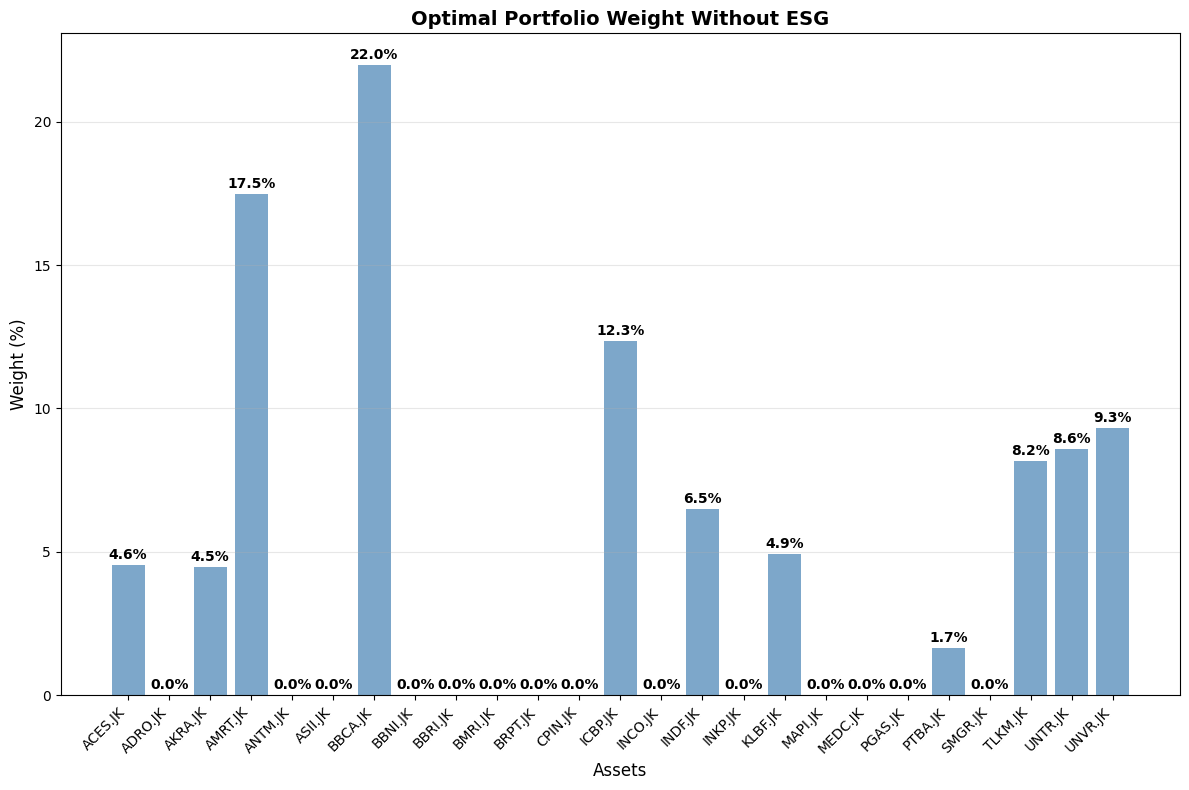

In [58]:
import time

if __name__ == "__main__":
    print("Optimasi Portfolio PSO tanpa ESG")
    print("-" * 50)

    best_fitness = float('inf')
    best_weights = None
    best_result = None

    fitness_list = []
    waktu_list = []

    for run in range(1, 21):
        print(f"\nRun {run}/20")

        start_time = time.time()


        optimizer = PortfolioOptimizationPSO(
          mu=expected_returns.values,
          cov=cov_stock,
          theta=esg_df['ESG_Score'].values,
          stock_names=esg_df['Ticker'].values,
          mu_p_star=0.0012,   # Target expected return
          max_iter=1000,      # Target ESG
          objective='risk'
      )

        result = optimizer.optimize()
        elapsed = time.time() - start_time
        waktu_list.append(elapsed)
        fitness_list.append(result['objective_value'])

        print(f"Run {run} - Fitness: {result['objective_value']:.8f} | Time: {elapsed:.2f} sec")

        if result['objective_value'] < best_fitness:
            best_fitness = result['objective_value']
            best_weights = result['weights']
            best_result = result
            best_optimizer = optimizer

    # Statistik fitness
    fitness_array = np.array(fitness_list)
    print("\n" + "_"*70)
    print("STATISTIK FITNESS:")
    print(f"Rata-rata (Mean)   : {np.mean(fitness_array):.8f}")
    print(f"Nilai terendah (Min): {np.min(fitness_array):.8f}")
    print(f"Nilai tertinggi (Max): {np.max(fitness_array):.8f}")
    print(f"Median             : {np.median(fitness_array):.8f}")
    print(f"Variansi           : {np.var(fitness_array):.8f}")

    # Statistik waktu
    waktu_array = np.array(waktu_list)
    print("\n" + "_"*70)
    print("STATISTIK WAKTU KOMPUTASI:")
    print(f"Rata-rata waktu    : {np.mean(waktu_array):.2f} detik")
    print(f"Waktu tercepat     : {np.min(waktu_array):.2f} detik")
    print(f"Waktu terlama      : {np.max(waktu_array):.2f} detik")
    print(f"Total waktu        : {np.sum(waktu_array):.2f} detik")

    # Hasil terbaik
    print("\n\n Best Result ")
    print(f"Best Fitness: {best_fitness:.8f}")
    print("Best Weights Allocation:")
    for name, weight in zip(best_optimizer.stock_names, best_weights):
        if weight > 0.001:
            print(f"{name:<12}: {weight*100:.2f}%")

    # visualisasi dari run terbaik
    best_optimizer.print_results()
    # best_optimizer.plot_convergence()
    best_optimizer.plot_weights()


##Dengan ESG


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

dataOptimal = pd.DataFrame()

class PortfolioOptimizationPSOESG:
    """
    Optimasi Portofolio Mempertimbangkan ESG
    Single Objective: Minimasi Risiko dengan Return and ESG sebagai constraints
    """

    def __init__(self, mu, cov, theta=None, stock_names=None,
                 mu_p_star=0.002, theta_p_star=None,
                 max_iter=1000, num_particles=None, objective='risk'):
        self.mu = mu
        self.cov = cov
        self.theta = theta if theta is not None else None
        self.stock_names = stock_names if stock_names is not None else [f'Asset_{i+1}' for i in range(len(self.mu))]

        # Portfolio parameters
        self.mu_p_star = mu_p_star
        self.theta_p_star = theta_p_star
        self.objective = "risk"

        #Dimensionalitas masalah
        self.dim = len(self.mu)

        # PSO parameters
        if num_particles is None:
            num_particles = max(30, self.dim * 15)

        self.num_particles = num_particles * 2
        self.max_iter = max_iter

        self.c1 = 2.0         # Cognitive coefficient
        self.c2 = 2.0         # Social coefficient

        # Inisialisasi partikel
        self._initialize_particles()

        # History tracking
        self.history = []
        self.best_position_history = []
        self.return_history = []
        self.risk_history = []
        self.esg_history = [] if self.theta is not None else None

    def _initialize_particles(self):
        print(f"Initializing PSO with {self.num_particles} particles for {self.dim} assets")

        # Inisialisasi posisi partikel
        self.positions = np.random.uniform(0, 1, (self.num_particles, self.dim))
        # Inisialisasi kecepatan partikel
        self.velocities = np.random.uniform(0, 1, (self.num_particles, self.dim))

        for i in range(self.num_particles):
            self.positions[i] = self._repair_solution(self.positions[i])

        # Inisialisasi personal bests
        self.personal_best_positions = self.positions.copy()
        self.personal_best_scores = np.array([self.fitness(p) for p in self.positions])

        # Inisialisasi global best
        best_idx = np.argmin(self.personal_best_scores)
        self.global_best_position = self.personal_best_positions[best_idx].copy()
        self.global_best_score = self.personal_best_scores[best_idx]

    def _repair_solution(self, position):
        position = np.maximum(position, 0)

        sum_pos = np.sum(position)
        if sum_pos > 0:
            position = position / sum_pos
        else:

            position = np.ones(self.dim) / self.dim

        position = np.clip(position, 0, 1)

        sum_pos = np.sum(position)
        if sum_pos > 0:
            position = position / sum_pos

        return position

    def fitness(self, weights):
        weights = self._repair_solution(weights)

        port_return = np.dot(weights.T, self.mu)
        port_variance = 0.5*np.dot(weights.T, np.dot(self.cov, weights))
        port_esg = np.dot(weights.T, self.theta)

        objective = port_variance  # Minimasi Resiko


        # Penalty untuk constraints
        penalty = 0

        # Return constraint
        if port_return < self.mu_p_star:
            penalty += (self.mu_p_star - port_return)

        # ESG constraint
        if self.theta is not None:
          if port_esg > self.theta_p_star:
            penalty += (port_esg - self.theta_p_star)

        return objective + penalty


    def optimize(self):
        """Main optimization loop"""
        print(f"Starting Enhanced Portfolio PSO optimization")
        print(f"Objective: {self.objective.capitalize()}")
        print(f"Assets: {self.dim}, Particles: {self.num_particles}, Iterations: {self.max_iter}")
        print(f"Target Return: {self.mu_p_star*100:.2f}%")
        print(f"Target ESG: ≤ {self.theta_p_star}")
        print("-" * 60)

        for iteration in range(self.max_iter):
            current_w = 0.5

            # perbarui fitness dan personal best
            for i in range(self.num_particles):
                self.positions[i] = self._repair_solution(self.positions[i])

                current_fitness = self.fitness(self.positions[i])

                if current_fitness < self.personal_best_scores[i]:
                    self.personal_best_scores[i] = current_fitness
                    self.personal_best_positions[i] = self.positions[i].copy()

                    # Check for global best
                    if current_fitness < self.global_best_score:
                        self.global_best_score = current_fitness
                        self.global_best_position = self.positions[i].copy()

            # Perbarui kecepatan and posisi
            for i in range(self.num_particles):
                r1 = np.random.rand(self.dim)
                r2 = np.random.rand(self.dim)

                cognitive = self.c1 * r1 * (self.personal_best_positions[i] - self.positions[i])
                social = self.c2 * r2 * (self.global_best_position - self.positions[i])

                self.velocities[i] = current_w * self.velocities[i] + cognitive + social

                v_max = 0.2
                self.velocities[i] = np.clip(self.velocities[i], -v_max, v_max)

                self.positions[i] += self.velocities[i]

            self._update_history()

            if (iteration + 1) % max(50, self.max_iter // 20) == 0:
                self._print_progress(iteration + 1, current_w)

        self._calculate_final_metrics()
        print("\nOptimization completed!")

        return {
          "weights": self.optimal_weights,
          "expected_return": self.optimal_return,
          "volatility": self.optimal_volatility,
          "sharpe_ratio": self.optimal_sharpe,
          "esg_score": getattr(self, "optimal_esg", None),
          "objective_value": self.global_best_score
        }

    def _update_history(self):
        """Update optimization history"""
        self.history.append(self.global_best_score)
        self.best_position_history.append(self.global_best_position.copy())

        port_return = np.dot(self.global_best_position, self.mu)
        port_risk = np.sqrt(np.dot(self.global_best_position, np.dot(self.cov, self.global_best_position)))

        self.return_history.append(port_return)
        self.risk_history.append(port_risk)

        if self.theta is not None:
            port_esg = np.dot(self.global_best_position, self.theta)
            self.esg_history.append(port_esg)

    def _print_progress(self, iteration, inertia_weight):
        """Print optimization progress"""
        port_return = np.dot(self.global_best_position, self.mu)
        port_risk = np.sqrt(np.dot(self.global_best_position, np.dot(self.cov, self.global_best_position)))

        progress_str = f"Iter {iteration:4d}/{self.max_iter} | "
        progress_str += f"Fitness: {self.global_best_score:.6f} | "
        progress_str += f"Return: {port_return*100:5.2f}% | "
        progress_str += f"Risk: {port_risk*100:5.2f}% | "

        if self.theta is not None:
            port_esg = np.dot(self.global_best_position, self.theta)
            progress_str += f" | ESG: {port_esg:.2f}"

        print(progress_str)

    def _calculate_final_metrics(self):
        """Calculate final portfolio metrics"""
        self.optimal_weights = self.global_best_position
        self.optimal_return = np.dot(self.optimal_weights, self.mu)
        self.optimal_variance = np.dot(self.optimal_weights, np.dot(self.cov, self.optimal_weights))
        self.optimal_volatility = np.sqrt(self.optimal_variance)
        self.optimal_sharpe = ((self.optimal_return*52) - 0.0665 ) / (self.optimal_volatility*np.sqrt(52))


        if self.theta is not None:
            self.optimal_esg = np.dot(self.optimal_weights, self.theta)

    def print_results(self):
        """Print detailed optimization results"""
        print("\n" + "="*70)
        print("PORTFOLIO OPTIMIZATION RESULTS")
        print("="*70)

        print(f"Optimization Objective: {self.objective.capitalize()}")
        print(f"Number of Assets: {self.dim}")
        print(f"PSO Parameters: {self.num_particles} particles, {self.max_iter} iterations")

        print("\n Optimal Portfolio Metrics:")
        print("-"*70)
        print(f"Expected Return (Weekly):   {self.optimal_return*100:6.2f}% (Target: ≥{self.mu_p_star*100:6.2f}%)")
        print(f"Expected Return (Annual):   {self.optimal_return*52*100:6.2f}% (Target: ≥{self.mu_p_star*52*100:6.2f}%)")
        print(f"Optimal Portfolio Risk (Weekly):    {self.optimal_volatility*100:6.2f}% (Portfolio Risk: {risk_portfolio*100:6.2f}%)")
        print(f"Optimal Portfolio Risk (Annual):    {self.optimal_volatility*np.sqrt(52)*100:6.2f}% (Portfolio Risk: {risk_portfolio*np.sqrt(52)*100:6.2f}%)")
        print(f"Sharpe Ratio:               {self.optimal_sharpe:.4f}")

        if hasattr(self, 'optimal_esg'):
            target_str = f"≤{self.theta_p_star}" if self.theta_p_star else "N/A"
            print(f"ESG Score:                  {self.optimal_esg:6.2f} (Target: {target_str})")

        print("\nOptimal Asset Allocation:")
        print("-"*70)

        sorted_indices = np.argsort(self.optimal_weights)[::-1]

        for idx in sorted_indices:
            weight = self.optimal_weights[idx] * 100
            if weight > 0.01:
                asset_info = f"{self.stock_names[idx]:<12}: {weight:6.2f}%"
                if self.theta is not None:
                    asset_info += f"   (ESG: {self.theta[idx]:5.2f})"
                print(asset_info)

        print("\nConstraint Status:")
        print("-"*70)
        return_satisfied = "✅" if self.optimal_return >= self.mu_p_star else "❌"
        print(f"Return Constraint: {return_satisfied}")

        if hasattr(self, 'optimal_esg') and self.theta_p_star is not None:
            esg_satisfied = "✅" if int(self.optimal_esg) <= self.theta_p_star else "❌"
            print(f"ESG Constraint:    {esg_satisfied}")

        print(f"Budget Constraint: ✅ (Sum = {np.sum(self.optimal_weights):.6f})")
        print("="*70)

    def plot_convergence(self):
        """Plot convergence curves"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))


        axes[0,0].semilogy(self.history)
        axes[0,0].set_title('Fitness Convergence (Log Scale)')
        axes[0,0].set_xlabel('Iteration')
        axes[0,0].set_ylabel('Fitness Value (Log)')
        axes[0,0].grid(True, alpha=0.3)

        axes[0,1].plot(np.array(self.return_history) * 100)
        axes[0,1].axhline(y=self.mu_p_star*100, color='red', linestyle='--',
                         label=f'Target Return ({self.mu_p_star*100:.2f}%)')
        axes[0,1].set_title('Portfolio Return Convergence')
        axes[0,1].set_xlabel('Iteration')
        axes[0,1].set_ylabel('Return (%)')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)

        axes[1,0].plot(np.array(self.risk_history) * 100)
        axes[1,0].axhline(y=risk_portfolio*100, color='red', linestyle='--',
                         label=f'Target Return ({risk_portfolio*100:.2f}%)')
        axes[1,0].set_title('Portfolio Risk Convergence')
        axes[1,0].set_xlabel('Iteration')
        axes[1,0].set_ylabel('Risk (%)')
        axes[1,0].grid(True, alpha=0.3)
        if self.esg_history:
            axes[1,1].plot(self.esg_history)
            if self.theta_p_star:
                axes[1,1].axhline(y=self.theta_p_star, color='red', linestyle='--',
                                 label=f'Target ESG (≤{self.theta_p_star})')
                axes[1,1].legend()
            axes[1,1].set_title('ESG Score Convergence')
            axes[1,1].set_xlabel('Iteration')
            axes[1,1].set_ylabel('ESG Score')
            axes[1,1].grid(True, alpha=0.3)
        else:
            # Plot Sharpe ratio instead
            sharpe_history = np.array(self.return_history) / np.array(self.risk_history)
            axes[1,1].plot(sharpe_history)
            axes[1,1].set_title('Sharpe Ratio Convergence')
            axes[1,1].set_xlabel('Iteration')
            axes[1,1].set_ylabel('Sharpe Ratio')
            axes[1,1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_weights(self):
        """Plot optimal weights distribution"""
        plt.figure(figsize=(12, 8))

      # Tampilkan semua saham
        weights_to_plot = self.optimal_weights * 100
        names_to_plot = self.stock_names

        bars = plt.bar(names_to_plot, weights_to_plot, alpha=0.7, color='steelblue')

        plt.title(f'Optimal Portfolio Weight ESG = {self.theta_p_star}', fontsize=14, fontweight='bold')
        plt.xlabel('Assets', fontsize=12)
        plt.ylabel('Weight (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right')

        for bar, weight in zip(bars, weights_to_plot):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'{weight:.1f}%', ha='center', va='bottom', fontweight='bold')

        plt.grid(True, axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# if __name__ == "__main__":


#     print("Testing Portfolio PSO W")
#     print("-" * 50)

#     # Test risk minimization
#     optimizer = PortfolioOptimizationPSOESG(
#         mu=expected_returns.values,
#         cov=cov_stock,
#         theta=esg_df['ESG_Score'].values,
#         stock_names=esg_df['Ticker'].values,
#         mu_p_star=0.0012,    # Target weekly return
#         theta_p_star=20,      # ESG target
#         max_iter=1000,
#         objective='risk'
#     )
#     dataOptimal = optimizer.optimize()
#     optimizer.print_results()
#     optimizer.plot_convergence()
#     optimizer.plot_weights()

Optimasi Portfolio PSO dengan ESG 
--------------------------------------------------

Run 1/20
Initializing PSO with 750 particles for 25 assets
Starting Enhanced Portfolio PSO optimization
Objective: Risk
Assets: 25, Particles: 750, Iterations: 1000
Target Return: 0.12%
Target ESG: ≤ 20
------------------------------------------------------------
Iter   50/1000 | Fitness: 0.000319 | Return:  0.19% | Risk:  2.53% |  | ESG: 20.00
Iter  100/1000 | Fitness: 0.000319 | Return:  0.19% | Risk:  2.52% |  | ESG: 20.00
Iter  150/1000 | Fitness: 0.000319 | Return:  0.19% | Risk:  2.52% |  | ESG: 20.00
Iter  200/1000 | Fitness: 0.000319 | Return:  0.19% | Risk:  2.52% |  | ESG: 20.00
Iter  250/1000 | Fitness: 0.000319 | Return:  0.19% | Risk:  2.52% |  | ESG: 20.00
Iter  300/1000 | Fitness: 0.000319 | Return:  0.19% | Risk:  2.52% |  | ESG: 20.00
Iter  350/1000 | Fitness: 0.000319 | Return:  0.19% | Risk:  2.52% |  | ESG: 20.00
Iter  400/1000 | Fitness: 0.000319 | Return:  0.19% | Risk:  2.52% |

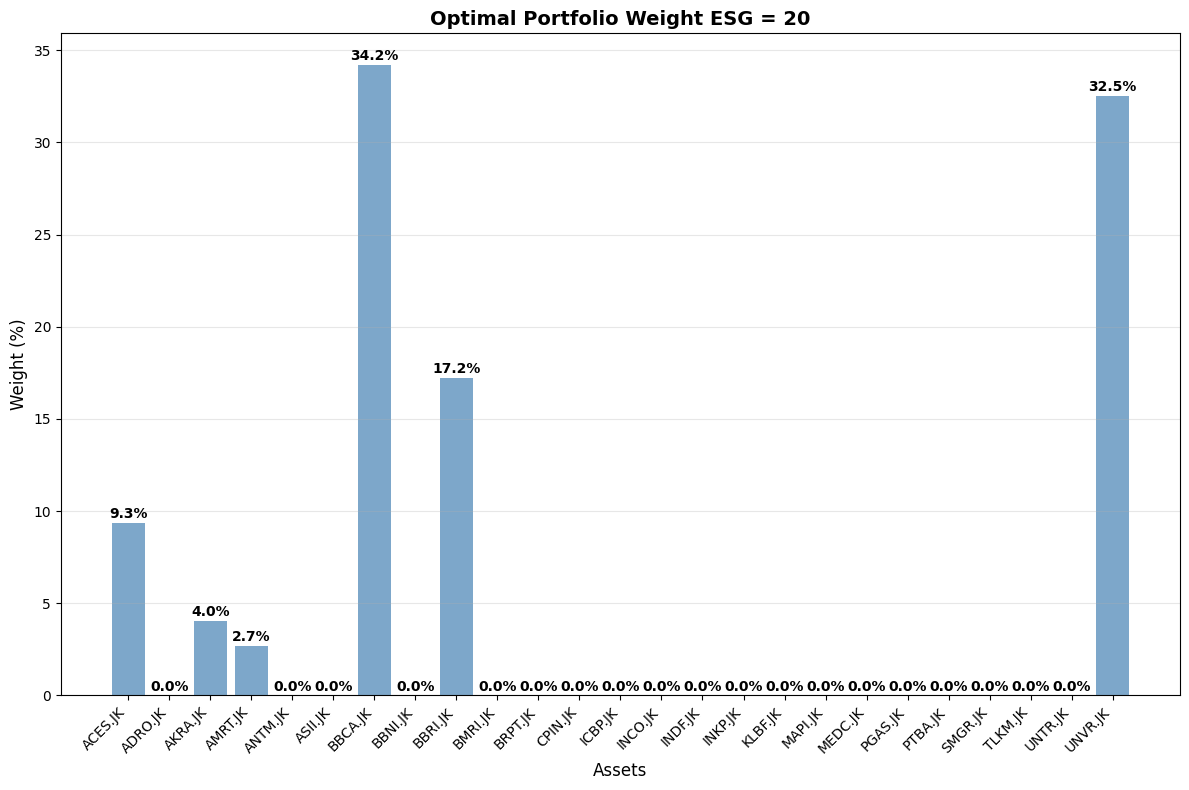

In [60]:
import time

if __name__ == "__main__":
    print("Optimasi Portfolio PSO dengan ESG ")
    print("-" * 50)

    best_fitnessESG = float('inf')
    best_weightsESG = None
    best_resultESG = None

    fitness_list = []
    waktu_list = []

    for run in range(1, 21):
        print(f"\nRun {run}/20")

        start_time = time.time()

        optimizer = PortfolioOptimizationPSOESG(
            mu=expected_returns.values,
            cov=cov_stock,
            theta=esg_df['ESG_Score'].values,
            stock_names=esg_df['Ticker'].values,
            mu_p_star=0.0012,    # Target expected return
            theta_p_star=20,     # Target ESG
            max_iter=1000,
            objective='risk'
        )

        resultESG = optimizer.optimize()
        elapsed = time.time() - start_time
        waktu_list.append(elapsed)
        fitness_list.append(resultESG['objective_value'])

        print(f"Run {run} - Fitness: {resultESG['objective_value']:.8f} | Time: {elapsed:.2f} sec")

        if resultESG['objective_value'] < best_fitnessESG:
            best_fitnessESG = resultESG['objective_value']
            best_weightsESG = resultESG['weights']
            best_resultESG = resultESG
            best_optimizerESG = optimizer

    # Statistik fitness
    fitness_array = np.array(fitness_list)
    print("\n" + "_"*70)
    print("STATISTIK FITNESS:")
    print(f"Rata-rata (Mean)   : {np.mean(fitness_array):.8f}")
    print(f"Nilai terendah (Min): {np.min(fitness_array):.8f}")
    print(f"Nilai tertinggi (Max): {np.max(fitness_array):.8f}")
    print(f"Median             : {np.median(fitness_array):.8f}")
    print(f"Variansi           : {np.var(fitness_array):.8f}")

    # Statistik waktu
    waktu_array = np.array(waktu_list)
    print("\n" + "_"*70)
    print("STATISTIK WAKTU KOMPUTASI:")
    print(f"Rata-rata waktu    : {np.mean(waktu_array):.2f} detik")
    print(f"Waktu tercepat     : {np.min(waktu_array):.2f} detik")
    print(f"Waktu terlama      : {np.max(waktu_array):.2f} detik")
    print(f"Total waktu        : {np.sum(waktu_array):.2f} detik")

    # Hasil terbaik
    print("\n\n Best Result ")
    print(f"Best Fitness: {best_fitnessESG:.8f}")
    print("Best Weights Allocation:")
    for name, weight in zip(best_optimizerESG.stock_names, best_weightsESG):
        if weight > 0.001:
            print(f"{name:<12}: {weight*100:.2f}%")

    # visualisasi dari run terbaik
    best_optimizerESG.print_results()
    # best_optimizer.plot_convergence()
    best_optimizerESG.plot_weights()


#Pengujian


In [61]:
dataOptimalWESG = result
dataOptimalWESG

{'weights': array([0.04675678, 0.        , 0.04611867, 0.17578898, 0.        ,
        0.        , 0.22470769, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12267319, 0.        , 0.06671038,
        0.        , 0.04840886, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.08233855, 0.09353363, 0.09296327]),
 'expected_return': np.float64(0.0026255048341337034),
 'volatility': np.float64(0.0203620718364259),
 'sharpe_ratio': np.float64(0.47691089210671317),
 'esg_score': np.float64(28.390706250467254),
 'objective_value': np.float64(0.00020730698473588424)}

In [62]:
dataOptimal = resultESG
dataOptimal

{'weights': array([0.0962263 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.45591779, 0.        , 0.11928975, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0192814 , 0.        , 0.30928477]),
 'expected_return': np.float64(0.0019369223317778587),
 'volatility': np.float64(0.02555418414965088),
 'sharpe_ratio': np.float64(0.18570167521677985),
 'esg_score': np.float64(19.999999999959577),
 'objective_value': np.float64(0.0003265081637771341)}

In [63]:

dataTicker = [
    'ACES.JK', 'ADRO.JK', 'AKRA.JK', "AMRT.JK", "ANTM.JK",
    "ASII.JK", 'BBCA.JK', 'BBNI.JK', 'BBRI.JK', "BMRI.JK",
    'BRPT.JK', 'CPIN.JK', 'ICBP.JK', 'INCO.JK', 'INDF.JK',
    'INKP.JK', 'KLBF.JK', 'MAPI.JK', 'MEDC.JK', 'PGAS.JK',
    'PTBA.JK', 'SMGR.JK', 'TLKM.JK', 'UNTR.JK', 'UNVR.JK'

]


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Bobot Portofolio Dengan Mempertimbangkan ESG
dataOptimal_float = list(map(float, dataOptimal['weights']))
weights = dict(zip(dataTicker, dataOptimal_float))
weights
tickers = list(weights.keys())

# Unduh Data Saham
start_date = '2022-01-01'
end_date = '2024-01-01'
# Mengubah string menjadi objek datetime
start_date_obj = datetime.strptime(start_date, '%Y-%m-%d')
end_date_obj = datetime.strptime(end_date, '%Y-%m-%d')

# Mengambil tahun dari objek datetime
tahun_start = start_date_obj.year
tahun_end = end_date_obj.year

data = yf.download(tickers , start=start_date, end=end_date, interval='1wk')['Close']
data = data.dropna()
returns = data.pct_change().dropna()

# Hitung Return Portofolio
portfolio_weights = np.array([weights[t] for t in tickers])
returns_portfolio = returns[tickers] @ portfolio_weights


dataIDX30 = pd.read_csv("Data Historis IDX 30 Weekly.csv", index_col=0, parse_dates=True)
dataIDX30 = dataIDX30['Terakhir'] \
    .astype(str) \
    .str.replace(',', '.', regex=False) \
    .astype(float) \

returnsIDX30 = dataIDX30.pct_change().dropna()

portfolio_cum = (1 + returns_portfolio).cumprod()
idx30_cum = (1 + returnsIDX30).cumprod()



/tmp/ipython-input-64-2640147043.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers , start=start_date, end=end_date, interval='1wk')['Close']
[*********************100%***********************]  25 of 25 completed
/tmp/ipython-input-64-2640147043.py:33: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataIDX30 = pd.read_csv("Data Historis IDX 30 Weekly.csv", index_col=0, parse_dates=True)


/tmp/ipython-input-66-4282145377.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dataWESG = yf.download(tickers, start=start_date, end=end_date, interval='1wk')['Close']
[*********************100%***********************]  25 of 25 completed



📊 Rangkuman Kinerja Portofolio vs ETF IDX30
---------------------------------------------------
                            Expected Return (%)  Risk (%)  Sharpe Ratio  \
Portofolio PSO Without ESG                17.92     10.98          1.03   
Portfolio PSO With ESG                     7.08     13.44          0.03   
IDX 30                                     1.49     13.56         -0.38   

                            ESG Score  
Portofolio PSO Without ESG      28.39  
Portfolio PSO With ESG          20.00  
IDX 30                          29.30  


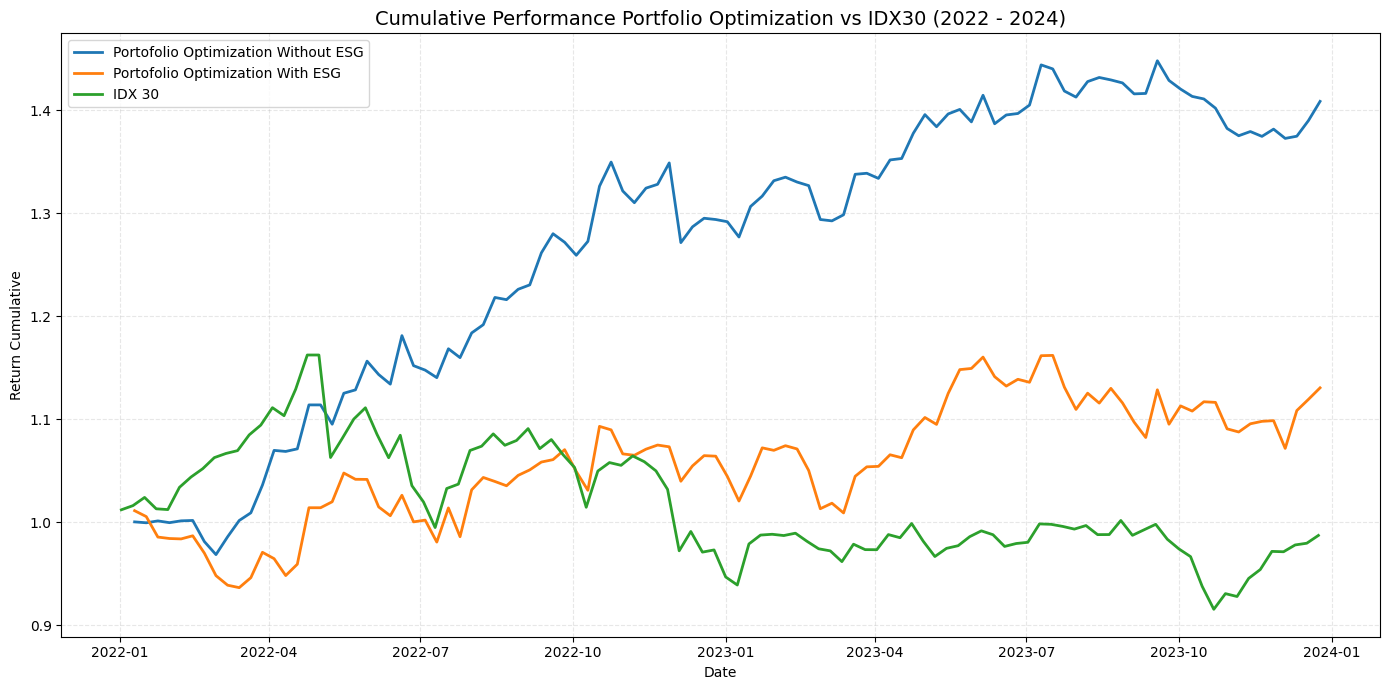

In [66]:
# Bobot Portofolio Tanpa ESG
dataOptimal_float = list(map(float, dataOptimalWESG['weights']))
weightsWESG = dict(zip(dataTicker, dataOptimal_float))
tickersWESG = list(weightsWESG.keys())


start_date = '2022-01-01'
end_date = '2024-01-01'
# Mengubah string menjadi objek datetime
start_date_obj = datetime.strptime(start_date, '%Y-%m-%d')
end_date_obj = datetime.strptime(end_date, '%Y-%m-%d')

# Mengambil tahun dari objek datetime
tahun_start = start_date_obj.year
tahun_end = end_date_obj.year
# Unduh Data Saham
dataWESG = yf.download(tickers, start=start_date, end=end_date, interval='1wk')['Close']
dataWESG = dataWESG.dropna()
returnsWESG = dataWESG.pct_change().dropna()

# Hitung Return Portofolio
portfolio_weightsWESG = np.array([weightsWESG[t] for t in tickers])
returns_portfolioWESG = returnsWESG.dot(portfolio_weightsWESG)

portfolio_cumWESG = (1 + returns_portfolioWESG).cumprod()


summary = {
    'Expected Return (%)': [
        (returns_portfolioWESG.mean()*52) * 100,
        (returns_portfolio.mean()*52) * 100,
        (returnsIDX30.mean()*52) * 100,
    ],
    'Risk (%)': [
        returns_portfolioWESG.std() * np.sqrt(52) * 100,
        returns_portfolio.std() * np.sqrt(52) * 100,
        returnsIDX30.std() * np.sqrt(52) * 100,
    ],
    'Sharpe Ratio': [
        ((returns_portfolioWESG.mean() * 52) - 0.0665) / (returns_portfolioWESG.std() * np.sqrt(52)),
        ((returns_portfolio.mean() * 52) - 0.0665) / (returns_portfolio.std() * np.sqrt(52)),
        ((returnsIDX30.mean() * 52) - 0.0665) / (returnsIDX30.std() * np.sqrt(52)),
    ],
    'ESG Score': [
        np.dot(portfolio_weightsWESG, esg_df['ESG_Score'] ),
        np.dot(portfolio_weights, esg_df['ESG_Score'] ),
        np.mean(esg_df['ESG_Score']),
    ]
}

summary_dfWESG = pd.DataFrame(summary, index=[
    'Portofolio PSO Without ESG',
    'Portfolio PSO With ESG',
    'IDX 30'
])

# 6. Cetak Rangkuman
print("\n📊 Rangkuman Kinerja Portofolio vs ETF IDX30")
print("---------------------------------------------------")
print(summary_dfWESG.round(2))

# 7. Visualisasi
plt.figure(figsize=(14, 7))
plt.plot(portfolio_cumWESG, label='Portofolio Optimization Without ESG', linewidth=2)
plt.plot(portfolio_cum, label='Portofolio Optimization With ESG', linewidth=2)
plt.plot(idx30_cum, label='IDX 30', linewidth=2)

plt.title(f'Cumulative Performance Portfolio Optimization vs IDX30 ({tahun_start} - {tahun_end})', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Return Cumulative')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


#Testing Kode

**Min ($X_1 ^2 + X_2 ^2 + X_3 ^3$)**

**Dengan Constraint** $X_1 + X_2 + X_3 \geq 1 $

Masukkan jumlah variabel: 25
Running PSO with fixed inertia weight w = 0.5
Iter  200 | Best Fitness: 0.04000000 | ∑x = 1.000000
Iter  400 | Best Fitness: 0.04000000 | ∑x = 1.000000
Iter  600 | Best Fitness: 0.04000000 | ∑x = 1.000000
Iter  800 | Best Fitness: 0.04000000 | ∑x = 1.000000
Iter 1000 | Best Fitness: 0.04000000 | ∑x = 1.000000
Iter 1200 | Best Fitness: 0.04000000 | ∑x = 1.000000
Iter 1400 | Best Fitness: 0.04000000 | ∑x = 1.000000
Iter 1600 | Best Fitness: 0.04000000 | ∑x = 1.000000
Iter 1800 | Best Fitness: 0.04000000 | ∑x = 1.000000
Iter 2000 | Best Fitness: 0.04000000 | ∑x = 1.000000

=== HASIL ANALISIS ===
Fitness terbaik: 0.04000000
Sum constraint (∑x): 1.000000
Max error vs 1/dim: 0.000000
Standard deviasi: 0.000000


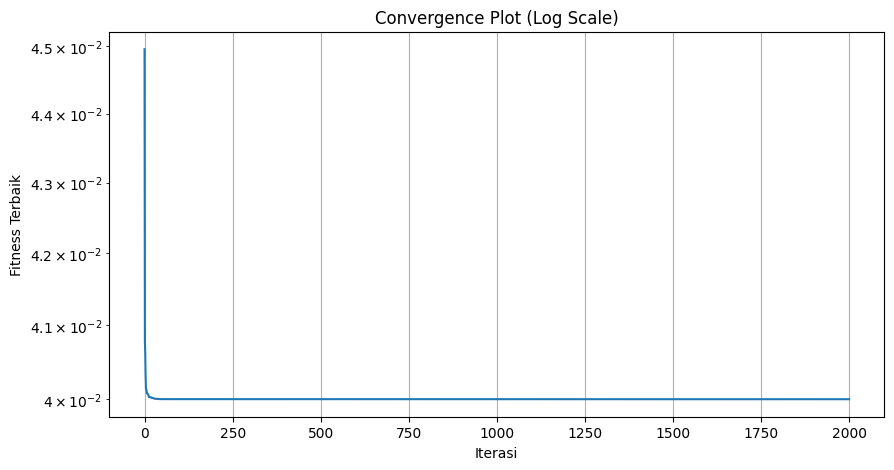

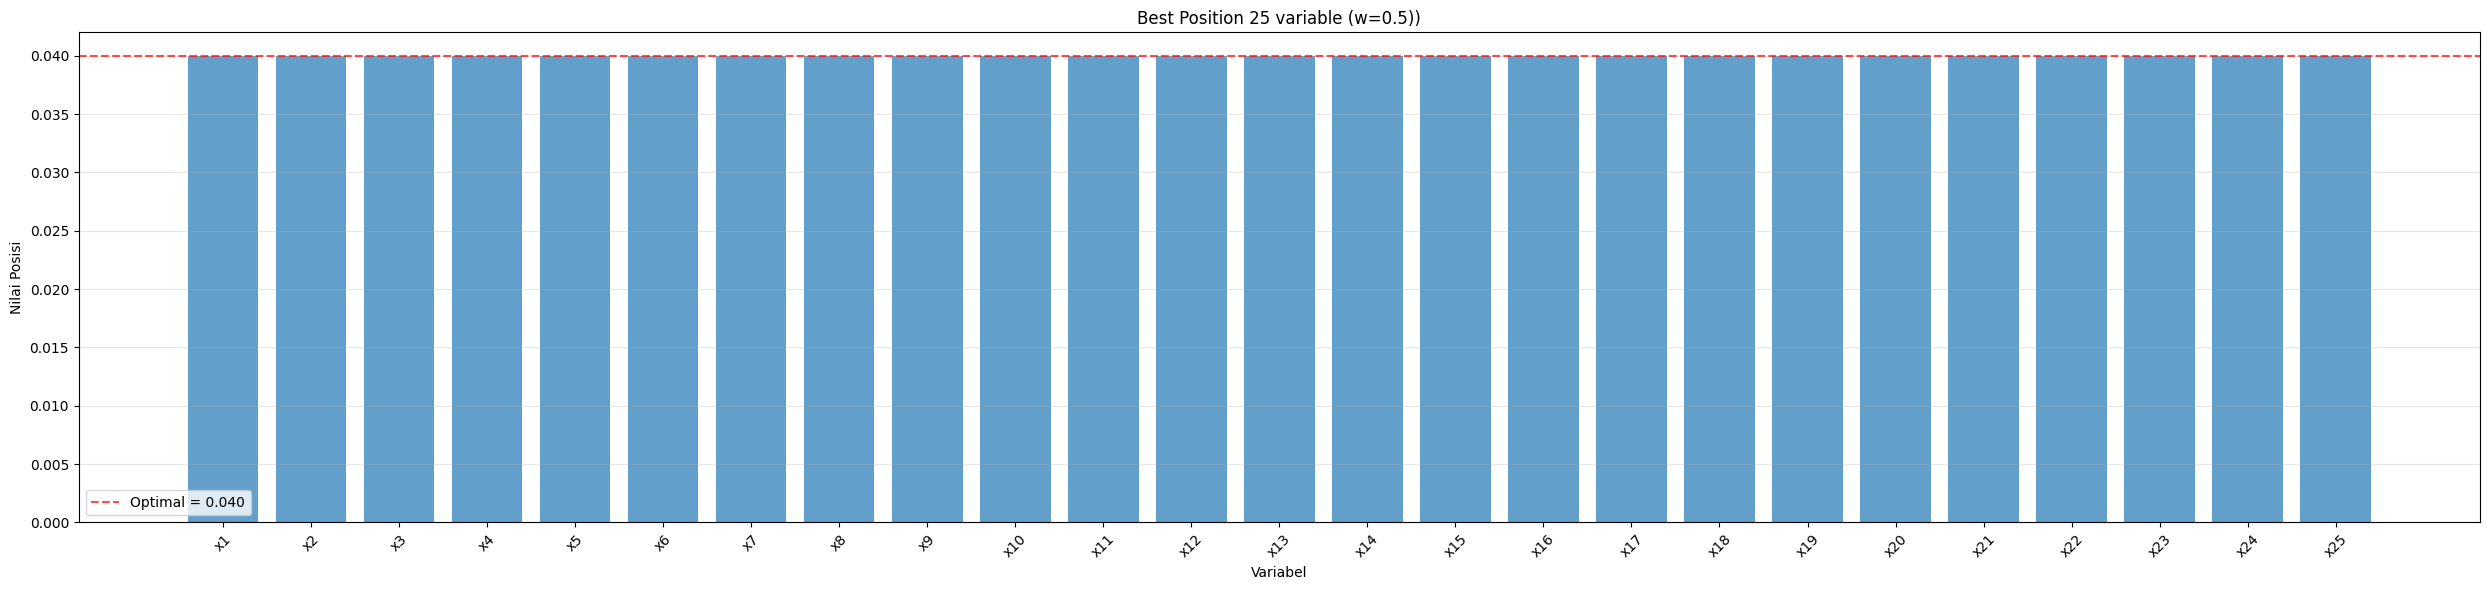

In [48]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleOptimizationPSO:
    def __init__(self, num_particles=None, max_iter=1000, dim=5, w=0.7):
        if num_particles is None:
            num_particles = max(30, dim * 15)

        self.num_particles = num_particles
        self.max_iter = max_iter
        self.dim = dim
        self.w = w  # Inertia weight tetap

        self.c1 = 2.0
        self.c2 = 2.0

        self.positions = np.random.uniform(0, 1, (num_particles, dim))
        self.velocities = np.random.uniform(0, 1, (num_particles, dim))

        for i in range(num_particles):
            s = np.sum(self.positions[i])
            self.positions[i] = self.positions[i] / s if s > 0 else np.ones(dim)/dim

        self.personal_best_positions = self.positions.copy()
        self.personal_best_scores = np.array([self.fitness(p) for p in self.positions])

        best_idx = np.argmin(self.personal_best_scores)
        self.global_best_position = self.personal_best_positions[best_idx].copy()
        self.global_best_score = self.personal_best_scores[best_idx]

        self.history = []
        self.best_position_history = []

    def fitness(self, x):
        objective = np.sum(x**2)
        const = np.sum(x)
        penalty = 0
        if const < 1:
            penalty += 1 - const
        return objective + penalty

    def repair_solution(self, x):
        x = np.maximum(x, 0)
        s = np.sum(x)
        x = x / s if s > 0 else np.ones(self.dim)/self.dim
        x = np.clip(x, 0, 1)
        s = np.sum(x)
        return x / s if s > 0 else np.ones(self.dim)/self.dim

    def optimize(self):
        print(f"Running PSO with fixed inertia weight w = {self.w}")

        for iter in range(self.max_iter):
            for i in range(self.num_particles):
                self.positions[i] = self.repair_solution(self.positions[i])
                fit = self.fitness(self.positions[i])

                if fit < self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fit
                    self.personal_best_positions[i] = self.positions[i].copy()

                    if fit < self.global_best_score:
                        self.global_best_score = fit
                        self.global_best_position = self.positions[i].copy()

            for i in range(self.num_particles):
                r1 = np.random.rand(self.dim)
                r2 = np.random.rand(self.dim)

                cognitive = self.c1 * r1 * (self.personal_best_positions[i] - self.positions[i])
                social = self.c2 * r2 * (self.global_best_position - self.positions[i])
                self.velocities[i] = self.w * self.velocities[i] + cognitive + social

                v_max = 0.2
                self.velocities[i] = np.clip(self.velocities[i], -v_max, v_max)
                self.positions[i] += self.velocities[i]

            self.history.append(self.global_best_score)
            self.best_position_history.append(self.global_best_position.copy())

            if (iter + 1) % max(100, self.max_iter // 10) == 0:
                print(f"Iter {iter+1:4d} | Best Fitness: {self.global_best_score:.8f} | ∑x = {np.sum(self.global_best_position):.6f}")

        return self.global_best_position, self.global_best_score

    def plot_convergence(self):
        plt.figure(figsize=(10, 5))
        plt.semilogy(self.history)
        plt.title("Convergence Plot (Log Scale)")
        plt.xlabel("Iterasi")
        plt.ylabel("Fitness Terbaik")
        plt.grid(True)
        plt.show()
    def plot_dimension_convergence(self):
        position_array = np.array(self.best_position_history)
        plt.figure(figsize=(12, 6))
        for d in range(min(self.dim, 10)):  # Only plot first 10 dimensions
            plt.plot(position_array[:, d], label=f'x{d+1}', alpha=0.8)

        # Add horizontal line at 1/dim (optimal value)
        plt.axhline(y=1/self.dim, color='red', linestyle='--', alpha=0.7,
                   label=f'Optimal (1/{self.dim} = {1/self.dim:.3f})')

        plt.title('Konvergensi per Dimensi')
        plt.xlabel('Iterasi')
        plt.ylabel('Nilai Posisi')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def plot_best_position_bar(self):
        plt.figure(figsize=(max(8, self.dim), 6))
        dim_labels = [f'x{i+1}' for i in range(self.dim)]
        bars = plt.bar(dim_labels, self.global_best_position, alpha=0.7)

        # Add horizontal line at optimal value
        optimal_val = 1/self.dim
        plt.axhline(y=optimal_val, color='red', linestyle='--', alpha=0.7,
                   label=f'Optimal = {optimal_val:.3f}')

        plt.title(f'Best Position 25 variable (w={self.w}))')
        plt.xlabel('Variabel')
        plt.ylabel('Nilai Posisi')
        plt.legend()

        # Add value labels on bars if not too many
        if self.dim <= 20:
            for bar, val in zip(bars, self.global_best_position):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                        f'{val:.3f}', ha='center', va='bottom', fontsize=8)

        plt.xticks(rotation=45 if self.dim > 10 else 0)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    def print_analysis(self):
        print("\n=== HASIL ANALISIS ===")
        print(f"Fitness terbaik: {self.global_best_score:.8f}")
        print(f"Sum constraint (∑x): {np.sum(self.global_best_position):.6f}")
        print(f"Max error vs 1/dim: {np.max(np.abs(self.global_best_position - 1/self.dim)):.6f}")
        print(f"Standard deviasi: {np.std(self.global_best_position):.6f}")

# Jalankan
if __name__ == "__main__":
    try:
        dim = int(input("Masukkan jumlah variabel: "))
        if dim <= 0:
            dim = 10
    except:
        dim = 10

    pso = SimpleOptimizationPSO(max_iter=2000, dim=dim, w=0.5)
    best_pos, best_score = pso.optimize()

    pso.print_analysis()
    pso.plot_convergence()
    pso.plot_best_position_bar()

    if dim <= 10:
        pso.plot_dimension_convergence()


In [49]:

import numpy as np
import matplotlib.pyplot as plt
import time

class ImprovedPSOFixedW:
    def __init__(self, num_particles=None, max_iter=1000, dim=5, w=0.7):
        if num_particles is None:
            num_particles = max(30, dim * 15)

        self.num_particles = num_particles
        self.max_iter = max_iter
        self.dim = dim
        self.w = w  # Inertia weight tetap

        self.c1 = 2.0
        self.c2 = 2.0

        self.positions = np.random.uniform(0, 1, (num_particles, dim))
        self.velocities = np.random.uniform(-0.1, 0.1, (num_particles, dim))

        for i in range(num_particles):
            s = np.sum(self.positions[i])
            self.positions[i] = self.positions[i] / s if s > 0 else np.ones(dim)/dim

        self.personal_best_positions = self.positions.copy()
        self.personal_best_scores = np.array([self.fitness(p) for p in self.positions])

        best_idx = np.argmin(self.personal_best_scores)
        self.global_best_position = self.personal_best_positions[best_idx].copy()
        self.global_best_score = self.personal_best_scores[best_idx]

        self.history = []
        self.best_position_history = []

    def fitness(self, x):
        objective = np.sum(x**2)
        const = np.sum(x)
        penalty = 0
        if const < 1:
            penalty += 1 - const
        return objective + penalty

    def repair_solution(self, x):
        x = np.maximum(x, 0)
        s = np.sum(x)
        x = x / s if s > 0 else np.ones(self.dim)/self.dim
        x = np.clip(x, 0, 1)
        s = np.sum(x)
        return x / s if s > 0 else np.ones(self.dim)/self.dim

    def optimize(self, verbose=True):
        if verbose:
            print(f"Running PSO with fixed inertia weight w = {self.w}")

        for iter in range(self.max_iter):
            for i in range(self.num_particles):
                self.positions[i] = self.repair_solution(self.positions[i])
                fit = self.fitness(self.positions[i])

                if fit < self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fit
                    self.personal_best_positions[i] = self.positions[i].copy()

                    if fit < self.global_best_score:
                        self.global_best_score = fit
                        self.global_best_position = self.positions[i].copy()

            for i in range(self.num_particles):
                r1 = np.random.rand(self.dim)
                r2 = np.random.rand(self.dim)

                cognitive = self.c1 * r1 * (self.personal_best_positions[i] - self.positions[i])
                social = self.c2 * r2 * (self.global_best_position - self.positions[i])
                self.velocities[i] = self.w * self.velocities[i] + cognitive + social

                v_max = 0.2
                self.velocities[i] = np.clip(self.velocities[i], -v_max, v_max)
                self.positions[i] += self.velocities[i]

            self.history.append(self.global_best_score)
            self.best_position_history.append(self.global_best_position.copy())

            if verbose and (iter + 1) % max(100, self.max_iter // 10) == 0:
                print(f"Iter {iter+1:4d} | Best Fitness: {self.global_best_score:.8f} | ∑x = {np.sum(self.global_best_position):.6f}")

        return self.global_best_position, self.global_best_score

    def plot_convergence(self):
        plt.figure(figsize=(10, 5))
        plt.semilogy(self.history)
        plt.title("Convergence Plot (Log Scale)")
        plt.xlabel("Iterasi")
        plt.ylabel("Fitness Terbaik")
        plt.grid(True)
        plt.show()

    def plot_dimension_convergence(self):
        position_array = np.array(self.best_position_history)
        plt.figure(figsize=(12, 6))
        for d in range(min(self.dim, 10)):  # Only plot first 10 dimensions
            plt.plot(position_array[:, d], label=f'x{d+1}', alpha=0.8)

        # Add horizontal line at 1/dim (optimal value)
        plt.axhline(y=1/self.dim, color='red', linestyle='--', alpha=0.7,
                   label=f'Optimal (1/{self.dim} = {1/self.dim:.3f})')

        plt.title('Konvergensi per Dimensi')
        plt.xlabel('Iterasi')
        plt.ylabel('Nilai Posisi')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def plot_best_position_bar(self):
        plt.figure(figsize=(max(8, self.dim), 6))
        dim_labels = [f'x{i+1}' for i in range(self.dim)]
        bars = plt.bar(dim_labels, self.global_best_position, alpha=0.7)

        # Add horizontal line at optimal value
        optimal_val = 1/self.dim
        plt.axhline(y=optimal_val, color='red', linestyle='--', alpha=0.7,
                   label=f'Optimal = {optimal_val:.3f}')

        plt.title(f'Posisi Terbaik per Variabel (dim={self.dim})')
        plt.xlabel('Variabel')
        plt.ylabel('Nilai Posisi')
        plt.legend()

        # Add value labels on bars if not too many
        if self.dim <= 20:
            for bar, val in zip(bars, self.global_best_position):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                        f'{val:.3f}', ha='center', va='bottom', fontsize=8)

        plt.xticks(rotation=45 if self.dim > 10 else 0)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    def print_analysis(self):
        """Print detailed analysis of results"""
        print("\n" + "="*50)
        print("ANALISIS HASIL PSO")
        print("="*50)
        print(f"Dimensi problem: {self.dim}")
        print(f"Jumlah partikel: {self.num_particles}")
        print(f"Maksimum iterasi: {self.max_iter}")
        print("-"*50)
        print(f"Fitness terbaik: {self.global_best_score:.8f}")
        print(f"Sum constraint: {np.sum(self.global_best_position):.6f}")
        print(f"Target sum: 1.000000")
        print(f"Error sum: {abs(np.sum(self.global_best_position) - 1.0):.6f}")
        print("-"*50)
        print("Posisi terbaik per variabel:")
        optimal_val = 1/self.dim
        for i, val in enumerate(self.global_best_position):
            error = abs(val - optimal_val)
            print(f"  x{i+1:2d} = {val:.6f} (optimal: {optimal_val:.6f}, error: {error:.6f})")
        print("-"*50)
        max_error = max(abs(val - optimal_val) for val in self.global_best_position)
        print(f"Maximum error dari nilai optimal: {max_error:.6f}")
        print(f"Standard deviation: {np.std(self.global_best_position):.6f}")


def run_multiple_experiments(dim=10, num_runs=50, max_iter=2000, w=0.7, verbose=True):
    """
    Menjalankan PSO sebanyak num_runs kali dan menganalisis statistik hasilnya
    """
    print(f"\n{'='*60}")
    print(f"MENJALANKAN {num_runs} EKSPERIMEN PSO")
    print(f"Dimensi: {dim}, Max Iterasi: {max_iter}, Inertia Weight: {w}")
    print(f"{'='*60}")

    results = []
    best_positions = []
    computation_times = []

    for run in range(num_runs):
        if verbose:
            print(f"\nRun {run+1}/{num_runs}")

        start_time = time.time()

        # Buat instance PSO baru untuk setiap run
        pso = ImprovedPSOFixedW(max_iter=max_iter, dim=dim, w=w)
        best_pos, best_score = pso.optimize(verbose=False)

        end_time = time.time()

        results.append(best_score)
        best_positions.append(best_pos)
        computation_times.append(end_time - start_time)

        if verbose:
            print(f"  Fitness: {best_score:.8f}, Time: {end_time - start_time:.2f}s")

    # Konversi ke numpy arrays untuk analisis
    results = np.array(results)
    best_positions = np.array(best_positions)
    computation_times = np.array(computation_times)

    # Hitung statistik
    mean_fitness = np.mean(results)
    min_fitness = np.min(results)
    max_fitness = np.max(results)
    std_fitness = np.std(results)
    variance_fitness = np.var(results)
    median_fitness = np.median(results)

    # Temukan run terbaik dan terburuk
    best_run_idx = np.argmin(results)
    worst_run_idx = np.argmax(results)

    # Print hasil analisis statistik
    print(f"\n{'='*60}")
    print("ANALISIS STATISTIK HASIL")
    print(f"{'='*60}")
    print(f"Jumlah eksperimen: {num_runs}")
    print(f"Dimensi problem: {dim}")
    print(f"{'─'*60}")
    print("STATISTIK FITNESS:")
    print(f"  Rata-rata (Mean)    : {mean_fitness:.8f}")
    print(f"  Nilai terendah (Min): {min_fitness:.8f}")
    print(f"  Nilai tertinggi (Max): {max_fitness:.8f}")
    print(f"  Median              : {median_fitness:.8f}")
    print(f"  Standard Deviasi    : {std_fitness:.8f}")
    print(f"  Variansi            : {variance_fitness:.8f}")
    print(f"{'─'*60}")
    print("STATISTIK WAKTU KOMPUTASI:")
    print(f"  Rata-rata waktu     : {np.mean(computation_times):.2f} detik")
    print(f"  Waktu tercepat      : {np.min(computation_times):.2f} detik")
    print(f"  Waktu terlama       : {np.max(computation_times):.2f} detik")
    print(f"  Total waktu         : {np.sum(computation_times):.2f} detik")

    # Plot

    return {
        'results': results,
        'best_positions': best_positions,
        'statistics': {
            'mean': mean_fitness,
            'min': min_fitness,
            'max': max_fitness,
            'std': std_fitness,
            'variance': variance_fitness,
            'median': median_fitness
        },
        'computation_times': computation_times,
        'best_run_idx': best_run_idx,
        'worst_run_idx': worst_run_idx
    }





# Jalankan eksperimen
if __name__ == "__main__":


    # Jalankan eksperimen
    experiment_results = run_multiple_experiments(
        dim=25,
        num_runs=50,
        max_iter=1000,
        w=0.7,
        verbose=True
    )

    print(f"\n{'='*60}")
    print("EKSPERIMEN SELESAI")
    print(f"{'='*60}")


MENJALANKAN 50 EKSPERIMEN PSO
Dimensi: 25, Max Iterasi: 1000, Inertia Weight: 0.7

Run 1/50
  Fitness: 0.04000713, Time: 25.12s

Run 2/50
  Fitness: 0.04000321, Time: 22.54s

Run 3/50
  Fitness: 0.04000121, Time: 20.51s

Run 4/50
  Fitness: 0.04000229, Time: 17.94s

Run 5/50
  Fitness: 0.04000211, Time: 20.29s

Run 6/50
  Fitness: 0.04000123, Time: 18.54s

Run 7/50
  Fitness: 0.04000327, Time: 17.61s

Run 8/50
  Fitness: 0.04000211, Time: 18.69s

Run 9/50
  Fitness: 0.04000587, Time: 17.09s

Run 10/50
  Fitness: 0.04000119, Time: 18.24s

Run 11/50
  Fitness: 0.04000461, Time: 16.83s

Run 12/50
  Fitness: 0.04000629, Time: 16.86s

Run 13/50
  Fitness: 0.04000110, Time: 18.30s

Run 14/50
  Fitness: 0.04001019, Time: 17.38s

Run 15/50
  Fitness: 0.04000243, Time: 17.10s

Run 16/50
  Fitness: 0.04000280, Time: 18.87s

Run 17/50
  Fitness: 0.04000301, Time: 17.27s

Run 18/50
  Fitness: 0.04000427, Time: 17.54s

Run 19/50
  Fitness: 0.04000374, Time: 18.60s

Run 20/50
  Fitness: 0.04000106,

In [50]:

import numpy as np
import matplotlib.pyplot as plt
import time

class ImprovedPSOFixedW:
    def __init__(self, num_particles=None, max_iter=1000, dim=5, w=0.7):
        if num_particles is None:
            num_particles = max(30, dim * 15)

        self.num_particles = num_particles
        self.max_iter = max_iter
        self.dim = dim
        self.w = w  # Inertia weight tetap

        self.c1 = 2.0
        self.c2 = 2.0

        self.positions = np.random.uniform(0, 1, (num_particles, dim))
        self.velocities = np.random.uniform(-0.1, 0.1, (num_particles, dim))

        for i in range(num_particles):
            s = np.sum(self.positions[i])
            self.positions[i] = self.positions[i] / s if s > 0 else np.ones(dim)/dim

        self.personal_best_positions = self.positions.copy()
        self.personal_best_scores = np.array([self.fitness(p) for p in self.positions])

        best_idx = np.argmin(self.personal_best_scores)
        self.global_best_position = self.personal_best_positions[best_idx].copy()
        self.global_best_score = self.personal_best_scores[best_idx]

        self.history = []
        self.best_position_history = []

    def fitness(self, x):
        objective = np.sum(x**2)
        const = np.sum(x)
        penalty = 0
        if const < 1:
            penalty += 1 - const
        return objective + penalty

    def repair_solution(self, x):
        x = np.maximum(x, 0)
        s = np.sum(x)
        x = x / s if s > 0 else np.ones(self.dim)/self.dim
        x = np.clip(x, 0, 1)
        s = np.sum(x)
        return x / s if s > 0 else np.ones(self.dim)/self.dim

    def optimize(self, verbose=True):
        if verbose:
            print(f"Running PSO with fixed inertia weight w = {self.w}")

        for iter in range(self.max_iter):
            for i in range(self.num_particles):
                self.positions[i] = self.repair_solution(self.positions[i])
                fit = self.fitness(self.positions[i])

                if fit < self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fit
                    self.personal_best_positions[i] = self.positions[i].copy()

                    if fit < self.global_best_score:
                        self.global_best_score = fit
                        self.global_best_position = self.positions[i].copy()

            for i in range(self.num_particles):
                r1 = np.random.rand(self.dim)
                r2 = np.random.rand(self.dim)

                cognitive = self.c1 * r1 * (self.personal_best_positions[i] - self.positions[i])
                social = self.c2 * r2 * (self.global_best_position - self.positions[i])
                self.velocities[i] = self.w * self.velocities[i] + cognitive + social

                v_max = 0.2
                self.velocities[i] = np.clip(self.velocities[i], -v_max, v_max)
                self.positions[i] += self.velocities[i]

            self.history.append(self.global_best_score)
            self.best_position_history.append(self.global_best_position.copy())

            if verbose and (iter + 1) % max(100, self.max_iter // 10) == 0:
                print(f"Iter {iter+1:4d} | Best Fitness: {self.global_best_score:.8f} | ∑x = {np.sum(self.global_best_position):.6f}")

        return self.global_best_position, self.global_best_score

    def plot_convergence(self):
        plt.figure(figsize=(10, 5))
        plt.semilogy(self.history)
        plt.title("Convergence Plot (Log Scale)")
        plt.xlabel("Iterasi")
        plt.ylabel("Fitness Terbaik")
        plt.grid(True)
        plt.show()

    def plot_dimension_convergence(self):
        position_array = np.array(self.best_position_history)
        plt.figure(figsize=(12, 6))
        for d in range(min(self.dim, 10)):  # Only plot first 10 dimensions
            plt.plot(position_array[:, d], label=f'x{d+1}', alpha=0.8)

        # Add horizontal line at 1/dim (optimal value)
        plt.axhline(y=1/self.dim, color='red', linestyle='--', alpha=0.7,
                   label=f'Optimal (1/{self.dim} = {1/self.dim:.3f})')

        plt.title('Konvergensi per Dimensi')
        plt.xlabel('Iterasi')
        plt.ylabel('Nilai Posisi')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def plot_best_position_bar(self):
        plt.figure(figsize=(max(8, self.dim), 6))
        dim_labels = [f'x{i+1}' for i in range(self.dim)]
        bars = plt.bar(dim_labels, self.global_best_position, alpha=0.7)

        # Add horizontal line at optimal value
        optimal_val = 1/self.dim
        plt.axhline(y=optimal_val, color='red', linestyle='--', alpha=0.7,
                   label=f'Optimal = {optimal_val:.3f}')

        plt.title(f'Posisi Terbaik per Variabel (dim={self.dim})')
        plt.xlabel('Variabel')
        plt.ylabel('Nilai Posisi')
        plt.legend()

        # Add value labels on bars if not too many
        if self.dim <= 20:
            for bar, val in zip(bars, self.global_best_position):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                        f'{val:.3f}', ha='center', va='bottom', fontsize=8)

        plt.xticks(rotation=45 if self.dim > 10 else 0)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    def print_analysis(self):
        """Print detailed analysis of results"""
        print("\n" + "="*50)
        print("ANALISIS HASIL PSO")
        print("="*50)
        print(f"Dimensi problem: {self.dim}")
        print(f"Jumlah partikel: {self.num_particles}")
        print(f"Maksimum iterasi: {self.max_iter}")
        print("-"*50)
        print(f"Fitness terbaik: {self.global_best_score:.8f}")
        print(f"Sum constraint: {np.sum(self.global_best_position):.6f}")
        print(f"Target sum: 1.000000")
        print(f"Error sum: {abs(np.sum(self.global_best_position) - 1.0):.6f}")
        print("-"*50)
        print("Posisi terbaik per variabel:")
        optimal_val = 1/self.dim
        for i, val in enumerate(self.global_best_position):
            error = abs(val - optimal_val)
            print(f"  x{i+1:2d} = {val:.6f} (optimal: {optimal_val:.6f}, error: {error:.6f})")
        print("-"*50)
        max_error = max(abs(val - optimal_val) for val in self.global_best_position)
        print(f"Maximum error dari nilai optimal: {max_error:.6f}")
        print(f"Standard deviation: {np.std(self.global_best_position):.6f}")


def run_multiple_experiments(dim=10, num_runs=50, max_iter=2000, w=0.7, verbose=True):
    """
    Menjalankan PSO sebanyak num_runs kali dan menganalisis statistik hasilnya
    """
    print(f"\n{'='*60}")
    print(f"MENJALANKAN {num_runs} EKSPERIMEN PSO")
    print(f"Dimensi: {dim}, Max Iterasi: {max_iter}, Inertia Weight: {w}")
    print(f"{'='*60}")

    results = []
    best_positions = []
    computation_times = []

    for run in range(num_runs):
        if verbose:
            print(f"\nRun {run+1}/{num_runs}")

        start_time = time.time()

        # Buat instance PSO baru untuk setiap run
        pso = ImprovedPSOFixedW(max_iter=max_iter, dim=dim, w=w)
        best_pos, best_score = pso.optimize(verbose=False)

        end_time = time.time()

        results.append(best_score)
        best_positions.append(best_pos)
        computation_times.append(end_time - start_time)

        if verbose:
            print(f"  Fitness: {best_score:.8f}, Time: {end_time - start_time:.2f}s")

    # Konversi ke numpy arrays untuk analisis
    results = np.array(results)
    best_positions = np.array(best_positions)
    computation_times = np.array(computation_times)

    # Hitung statistik
    mean_fitness = np.mean(results)
    min_fitness = np.min(results)
    max_fitness = np.max(results)
    std_fitness = np.std(results)
    variance_fitness = np.var(results)
    median_fitness = np.median(results)

    # Temukan run terbaik dan terburuk
    best_run_idx = np.argmin(results)
    worst_run_idx = np.argmax(results)

    # Print hasil analisis statistik
    print(f"\n{'='*60}")
    print("ANALISIS STATISTIK HASIL")
    print(f"{'='*60}")
    print(f"Jumlah eksperimen: {num_runs}")
    print(f"Dimensi problem: {dim}")
    print(f"{'─'*60}")
    print("STATISTIK FITNESS:")
    print(f"  Rata-rata (Mean)    : {mean_fitness:.8f}")
    print(f"  Nilai terendah (Min): {min_fitness:.8f}")
    print(f"  Nilai tertinggi (Max): {max_fitness:.8f}")
    print(f"  Median              : {median_fitness:.8f}")
    print(f"  Standard Deviasi    : {std_fitness:.8f}")
    print(f"  Variansi            : {variance_fitness:.8f}")
    print(f"{'─'*60}")
    print("STATISTIK WAKTU KOMPUTASI:")
    print(f"  Rata-rata waktu     : {np.mean(computation_times):.2f} detik")
    print(f"  Waktu tercepat      : {np.min(computation_times):.2f} detik")
    print(f"  Waktu terlama       : {np.max(computation_times):.2f} detik")
    print(f"  Total waktu         : {np.sum(computation_times):.2f} detik")

    # Plot hasil
    # plot_statistical_results(results, best_positions, dim)

    return {
        'results': results,
        'best_positions': best_positions,
        'statistics': {
            'mean': mean_fitness,
            'min': min_fitness,
            'max': max_fitness,
            'std': std_fitness,
            'variance': variance_fitness,
            'median': median_fitness
        },
        'computation_times': computation_times,
        'best_run_idx': best_run_idx,
        'worst_run_idx': worst_run_idx
    }


# def plot_statistical_results(results, best_positions, dim):
#     """Plot hasil analisis statistik"""

#     # 1. Histogram distribusi fitness
#     plt.figure(figsize=(15, 10))

#     plt.subplot(2, 3, 1)
#     plt.hist(results, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
#     plt.axvline(np.mean(results), color='red', linestyle='--', label=f'Mean: {np.mean(results):.6f}')
#     plt.axvline(np.median(results), color='green', linestyle='--', label=f'Median: {np.median(results):.6f}')
#     plt.title('Distribusi Fitness')
#     plt.xlabel('Fitness Value')
#     plt.ylabel('Frekuensi')
#     plt.legend()
#     plt.grid(True, alpha=0.3)

#     # 2. Box plot fitness
#     plt.subplot(2, 3, 2)
#     plt.boxplot(results, patch_artist=True, boxprops=dict(facecolor='lightblue'))
#     plt.title('Box Plot Fitness')
#     plt.ylabel('Fitness Value')
#     plt.grid(True, alpha=0.3)

#     # 3. Konvergensi fitness per run (sample beberapa run)
#     plt.subplot(2, 3, 3)
#     plt.plot(results, 'o-', alpha=0.7, markersize=4)
#     plt.axhline(np.mean(results), color='red', linestyle='--', alpha=0.7, label='Mean')
#     plt.title('Fitness per Run')
#     plt.xlabel('Run Number')
#     plt.ylabel('Fitness Value')
#     plt.legend()
#     plt.grid(True, alpha=0.3)

#     # 4. Analisis variance per dimensi
#     plt.subplot(2, 3, 4)
#     if dim <= 20:  # Hanya untuk dimensi yang tidak terlalu besar
#         dim_variances = [np.var(best_positions[:, i]) for i in range(dim)]
#         plt.bar(range(1, dim+1), dim_variances, alpha=0.7)
#         plt.title('Variansi per Dimensi')
#         plt.xlabel('Dimensi')
#         plt.ylabel('Variansi')
#         plt.xticks(range(1, dim+1))
#     else:
#         plt.text(0.5, 0.5, f'Terlalu banyak dimensi\n({dim}) untuk ditampilkan',
#                 horizontalalignment='center', verticalalignment='center',
#                 transform=plt.gca().transAxes)
#         plt.title('Variansi per Dimensi')
#     plt.grid(True, alpha=0.3)

#     # 5. Rata-rata posisi per dimensi
#     plt.subplot(2, 3, 5)
#     if dim <= 20:
#         mean_positions = np.mean(best_positions, axis=0)
#         optimal_val = 1/dim
#         plt.bar(range(1, dim+1), mean_positions, alpha=0.7, label='Mean Position')
#         plt.axhline(optimal_val, color='red', linestyle='--', alpha=0.7,
#                    label=f'Optimal ({optimal_val:.3f})')
#         plt.title('Rata-rata Posisi per Dimensi')
#         plt.xlabel('Dimensi')
#         plt.ylabel('Nilai Posisi')
#         plt.xticks(range(1, dim+1))
#         plt.legend()
#     else:
#         plt.text(0.5, 0.5, f'Terlalu banyak dimensi\n({dim}) untuk ditampilkan',
#                 horizontalalignment='center', verticalalignment='center',
#                 transform=plt.gca().transAxes)
#         plt.title('Rata-rata Posisi per Dimensi')
#     plt.grid(True, alpha=0.3)

#     # 6. Q-Q plot untuk normalitas
#     plt.subplot(2, 3, 6)
#     from scipy import stats
#     stats.probplot(results, dist="norm", plot=plt)
#     plt.title('Q-Q Plot (Normalitas)')
#     plt.grid(True, alpha=0.3)

#     plt.tight_layout()
#     plt.show()


# Jalankan eksperimen
if __name__ == "__main__":


    # Jalankan eksperimen
    experiment_results = run_multiple_experiments(
        dim=25,
        num_runs=50,
        max_iter=1000,
        w=0.5,
        verbose=True
    )

    print(f"\n{'='*60}")
    print("EKSPERIMEN SELESAI")
    print(f"{'='*60}")


MENJALANKAN 50 EKSPERIMEN PSO
Dimensi: 25, Max Iterasi: 1000, Inertia Weight: 0.5

Run 1/50
  Fitness: 0.04000000, Time: 17.75s

Run 2/50
  Fitness: 0.04000000, Time: 17.03s

Run 3/50
  Fitness: 0.04000000, Time: 18.43s

Run 4/50
  Fitness: 0.04000000, Time: 17.26s

Run 5/50
  Fitness: 0.04000000, Time: 17.13s

Run 6/50
  Fitness: 0.04000000, Time: 18.93s

Run 7/50
  Fitness: 0.04000000, Time: 17.48s

Run 8/50
  Fitness: 0.04000000, Time: 17.33s

Run 9/50
  Fitness: 0.04000000, Time: 18.80s

Run 10/50
  Fitness: 0.04000000, Time: 19.11s

Run 11/50
  Fitness: 0.04000000, Time: 19.78s

Run 12/50
  Fitness: 0.04000000, Time: 17.71s

Run 13/50
  Fitness: 0.04000000, Time: 18.66s

Run 14/50
  Fitness: 0.04000000, Time: 17.91s

Run 15/50
  Fitness: 0.04000000, Time: 17.55s

Run 16/50
  Fitness: 0.04000000, Time: 18.61s

Run 17/50
  Fitness: 0.04000000, Time: 17.07s

Run 18/50
  Fitness: 0.04000000, Time: 16.97s

Run 19/50
  Fitness: 0.04000000, Time: 18.30s

Run 20/50
  Fitness: 0.04000000,